# Data Access

In [10]:
import sys


import tushare as ts
import pandas as pd

print(sys.executable)
pro = ts.pro_api('6c5b57f5eea18931cf6cbd010a4f91acd9eaa2deeaf177948bf7523a')
data = ts.get_hist_data('600519') 
data_path = 'maotai_test.csv'
data.to_csv(data_path)


D:\APPS\Conda\envs\Last\python.exe
本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


In [74]:
import pandas as pd

# Load spreadsheet
xl = pd.ExcelFile('csi.xlsx')

# Load a sheet into a DataFrame by name
df = xl.parse('Sheet1')  # 请替换为你的工作表名

# Write DataFrame to a CSV file
df.to_csv('csi11.csv', index=False)

In [1]:
# import tushare as ts
# import pandas as pd
# pro = ts.pro_api(token='daef40d6e83f8213d53f4b67efbf65ad2b0d7a4f3af4b2d35ccfd3c2')
# data = ts.get_hist_data('600519') 

#data_path = '600519.csv'
#data_path = 'tesla.csv'
data_path = 'maotai_new.csv'
#data_path = 'csi11.csv'

# data.to_csv(data_path)
# data

# Data Processing

In [9]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
plt.style.use('seaborn')
#tensorflow==2.4.0 keras==2.4.3 python==3.7.10

#data parameters
test_num = 60
time_step = 3
target_id = 0 

#model parameters
head_size=1
num_heads = 8
ff_dim = 16
gru_dim = 16
num_transformer_blocks=1

#training parameters
training_state = False
learning_rate=1e-4
dropout = 0.1
batch_size = 64
epochs = 100
patience = 10

#visualization para
train_show_num = test_num*9
test_show_num = test_num

#model path
best_model_TF = 'best_model_TF_iteration_31.h5'
best_model_GRU = 'model_GRU.h5'
best_model_LSTM = 'best_model_LSTM_iteration_24.h5'
best_model_TLSM = 'best_model_TLSM_97.8%.h5'

In [10]:
#read data
df = pd.read_csv(data_path,header=0, index_col=0)
df = df.dropna().iloc[:,:]
#注意数据是否需要反转
df = df[::-1]
df


open     high    close      low    volume  price_change  \
date                                                                     
2021-02-09  2368.80  2456.43  2456.43  2350.00  33296.55         87.63   
2021-02-10  2485.00  2601.20  2601.00  2485.00  61370.57        144.57   
2021-02-18  2587.98  2627.88  2471.00  2465.00  65912.32       -130.00   
2021-02-19  2451.16  2496.66  2460.00  2381.60  59385.46        -11.00   
2021-02-22  2455.00  2455.00  2288.02  2278.22  78935.47       -171.98   
...             ...      ...      ...      ...       ...           ...   
2023-08-04  1887.82  1906.52  1893.47  1882.00  24573.64         15.00   
2023-08-07  1880.95  1898.00  1887.93  1871.03  23892.45         -5.54   
2023-08-08  1880.03  1893.71  1890.00  1864.08  17736.18          2.07   
2023-08-09  1890.00  1905.00  1890.28  1882.96  18523.46          0.28   
2023-08-10  1882.00  1889.00  1875.00  1862.30  18436.19        -15.28   

            p_change       ma5      ma10      ma20     v_ma5    v_ma10  \
date                                                                     
2021-02-09      3.70  2456.430  2456.430  2456.430  33296.55  33296.55   
2021-02-10      5.88  2528.715  2528.715  2528.715  47333.56  47333.56   
2021-02-18     -5.00  2509.477  2509.477  2509.477  53526.48  53526.48   
2021-02-19     -0.45  2497.108  2497.108  2497.108  54991.23  54991.23   
2021-02-22     -6.99  2455.290  2455.290  2455.290  59780.07  59780.07   
...              ...       ...       ...       ...       ...       ...   
2023-08-04      0.80  1884.304  1858.480  1793.599  25847.01  27100.47   
2023-08-07     -0.29  1885.774  1870.158  1802.950  21549.78  27518.38   
2023-08-08      0.11  1885.974  1876.303  1811.950  21250.89  24983.35   
2023-08-09      0.01  1888.030  1882.476  1820.774  21253.84  24874.55   
2023-08-10     -0.81  1887.336  1886.173  1827.604  20632.38  24684.13   

              v_ma20  turnover  
date                            
2021-02-09  33296.55      0.27  
2021-02-10  47333.56      0.49  
2021-02-18  53526.48      0.52  
2021-02-19  54991.23      0.47  
2021-02-22  59780.07      0.63  
...              ...       ...  
2023-08-04  22616.69      0.20  
2023-08-07  23137.44      0.19  
2023-08-08  23395.11      0.14  
2023-08-09  23657.05      0.15  
2023-08-10  23288.53      0.15  

[606 rows x 14 columns]

In [11]:
data = df.dropna(axis=0, how='any')
data.describe()

open         high        close          low         volume  \
count   606.000000   606.000000   606.000000   606.000000     606.000000   
mean   1846.899356  1870.533003  1846.585677  1823.933449   34066.295792   
std     171.577744   173.480337   170.015139   166.743469   17443.041512   
min    1350.000000  1382.010000  1350.000000  1333.000000   12472.380000   
25%    1734.295000  1756.135000  1733.707500  1717.215000   22044.895000   
50%    1825.000000  1849.400000  1827.505000  1803.805000   29584.690000   
75%    1955.000000  1974.350000  1951.495000  1934.877500   40118.185000   
max    2587.980000  2627.880000  2601.000000  2485.000000  132098.050000   

       price_change    p_change          ma5         ma10         ma20  \
count    606.000000  606.000000   606.000000   606.000000   606.000000   
mean      -0.668350   -0.011502  1848.595300  1850.926908  1854.952856   
std       36.602418    1.962665   171.105347   172.491020   172.120644   
min     -171.980000   -7.560000  1407.418000  1444.615000  1487.079000   
25%      -18.215000   -0.980000  1736.004000  1736.744250  1740.572500   
50%       -1.060000   -0.050000  1827.446000  1828.978500  1826.109000   
75%       19.410000    1.037500  1951.764000  1959.451000  1971.461500   
max      161.000000    9.500000  2528.715000  2528.715000  2528.715000   

              v_ma5        v_ma10        v_ma20    turnover  
count    606.000000    606.000000    606.000000  606.000000  
mean   34148.325957  34291.481667  34572.990693    0.271221  
std    13930.510674  12785.096246  11773.573889    0.138977  
min    13930.560000  15069.950000  16438.380000    0.100000  
25%    24895.255000  24979.517500  24547.505000    0.180000  
50%    30595.445000  31939.445000  32479.755000    0.240000  
75%    39161.242500  38411.610000  40073.980000    0.320000  
max    99097.820000  89104.700000  68816.070000    1.050000

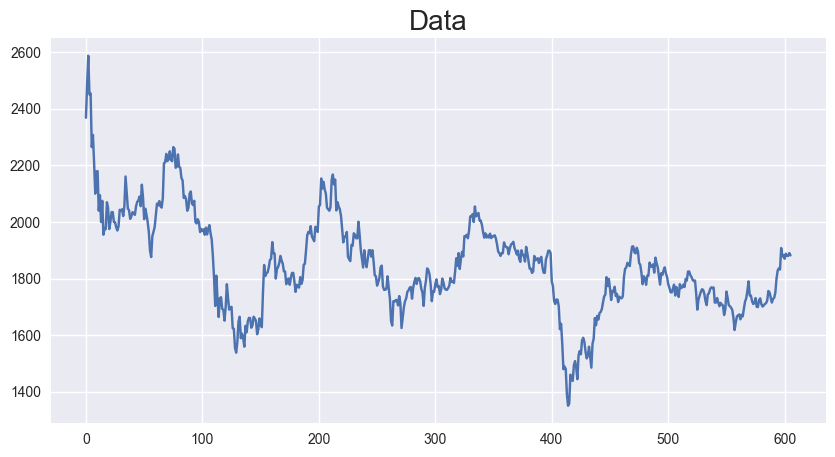

In [12]:
target = data.iloc[:,target_id].values
#plot
plt.figure(figsize=(10,5))
plt.plot(target)
plt.title("Data",fontsize='20') #添加标题
plt.show()
print('\n')


In [13]:
#minmaxscaler
mm_x= MinMaxScaler()
mm_y= MinMaxScaler()
data = mm_x.fit_transform(data)
label = mm_y.fit_transform(np.reshape(target, (-1, 1)))
pd.DataFrame(data).describe()

0           1           2           3           4           5   \
count  606.000000  606.000000  606.000000  606.000000  606.000000  606.000000   
mean     0.401379    0.392114    0.396951    0.426158    0.180512    0.514480   
std      0.138595    0.139244    0.135903    0.144743    0.145814    0.109924   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.310421    0.300292    0.306721    0.333520    0.080021    0.461784   
50%      0.383690    0.375152    0.381699    0.408685    0.143049    0.513304   
75%      0.488699    0.475443    0.480811    0.522463    0.231103    0.574779   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

               6           7           8           9           10          11  \
count  606.000000  606.000000  606.000000  606.000000  606.000000  606.000000   
mean     0.442468    0.393453    0.374792    0.353169    0.237389    0.259629   
std      0.115045    0.152596    0.159110    0.165241    0.163567    0.172690   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.385698    0.293041    0.269467    0.243361    0.128743    0.133850   
50%      0.440211    0.374591    0.354546    0.325478    0.195672    0.227859   
75%      0.503957    0.485461    0.474897    0.465021    0.296249    0.315280   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

               12          13  
count  606.000000  606.000000  
mean     0.346228    0.180233  
std      0.224782    0.146291  
min      0.000000    0.000000  
25%      0.154820    0.084211  
50%      0.306264    0.147368  
75%      0.451253    0.231579  
max      1.000000    1.000000

In [14]:
def convert_data(data):
    #把数据处理成lstm接受的输入形式
    data = np.array(data)
    cut = test_num#round(test_ratio* data.shape[0])
    amount_of_features = data.shape[1]
    lstm_input = []
    lstm_output = []
    for i in range(len(data)-time_step):
        lstm_input.append(data[i:i+time_step,:])
        lstm_output.append(data[i+time_step,target_id])
    lstm_input=np.array(lstm_input)
    lstm_output=np.array(lstm_output)  
    x_train,y_train,x_test,y_test=\
    lstm_input[:-cut,:,:],lstm_output[:-cut:],lstm_input[-cut:,:,:],lstm_output[-cut:]
    print('x_train.shape',x_train.shape)
    print('x_test.shape',x_test.shape)
    print('y_train.shape',y_train.shape)
    print('y_test.shape',y_test.shape)
    return x_train, x_test, y_train, y_test, amount_of_features

x_train, x_test, y_train, y_test, amount_of_features = convert_data(data)


x_train.shape (543, 3, 14)
x_test.shape (60, 3, 14)
y_train.shape (543,)
y_test.shape (60,)


# Evaluate Function

In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from math import sqrt
import matplotlib.ticker as ticker

def mape(y_true, y_pred):    
    n = len(y_true)
    mape = sum(np.abs((y_true - y_pred)/y_true))/n
    return mape

def easy_result(y_train, y_train_predict, train_index, model_index, show_num):
    #画图进行展示
    y_train_predict=np.reshape(y_train_predict, (-1,1))  
    y_train_predict= mm_y.inverse_transform(y_train_predict)
    y_train_predict=y_train_predict[:,0]
    y_train=np.reshape(y_train, (-1,1))  
    y_train=mm_y.inverse_transform(y_train)
    y_train=y_train[:,0]

    plt.figure(figsize=(20,10))
    plt.plot(y_train[-show_num:])
    plt.plot(y_train_predict[-show_num:])
    plt.legend(('real', 'predict'),fontsize='15')
    plt.title("%s Data"%train_index,fontsize='20') #添加标题  
    # 获取当前的坐标轴
    ax = plt.gca()

    # 设置y轴的主要刻度间隔为500
    ax.yaxis.set_major_locator(ticker.MultipleLocator(500))
    plt.show()
    print('\n')

    plot_begin,plot_end=min(min(y_train),min(y_train_predict)),max(max(y_train),max(y_train_predict))
    plot_x=np.linspace(plot_begin,plot_end,10)
    plt.figure(figsize=(5,5))
    plt.plot(plot_x,plot_x)
    plt.plot(y_train,y_train_predict,'o')
    plt.title("%s Data"%train_index,fontsize='20') #添加标题
    

    
    plt.show()

    #输出结果
    print('%s上的MAE/RMSE/MAPE/R^2'%train_index)
    print(mean_absolute_error(y_train, y_train_predict))
    print(np.sqrt(mean_squared_error(y_train, y_train_predict) ))
    print(mape(y_train, y_train_predict) )
    print(r2_score(y_train, y_train_predict))

    pred_data = np.vstack([y_train, y_train_predict])
    pred_data = pd.DataFrame(pred_data).T
    pred_data.to_csv('Result_%s_%s.csv'%(model_index ,train_index))
    
def history2plot(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(loss))
    plt.plot(epochs_range, loss, label='Train Loss')
    plt.plot(epochs_range, val_loss, label='Val Loss')
    plt.legend(loc='upper right')
    plt.title('Train and Val Loss')
    plt.show()

# TF

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 3, 14)]      0                                            
__________________________________________________________________________________________________
multi_head_attention_6 (MultiHe (None, 3, 14)        486         input_8[0][0]                    
                                                                 input_8[0][0]                    
__________________________________________________________________________________________________
global_average_pooling1d_6 (Glo (None, 3)            0           multi_head_attention_6[0][0]     
__________________________________________________________________________________________________
dense_18 (Dense)                (None, 16)           64          global_average_pooling1d_6[

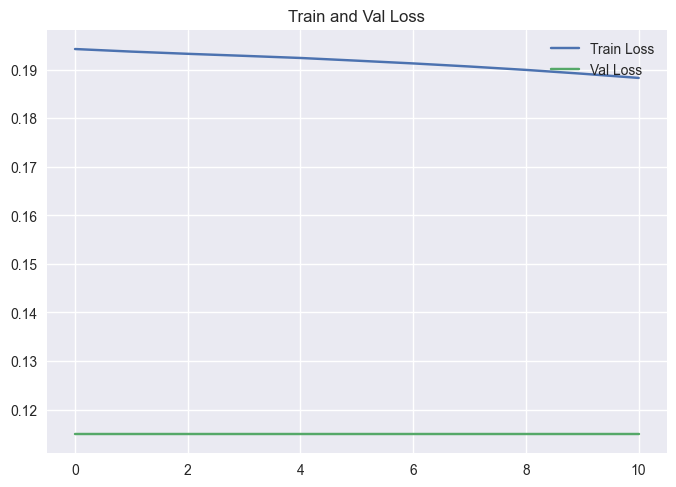

In [108]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Input,LSTM,Dropout,Dense,GRU, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = inputs
    #x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    #x = layers.Dropout(dropout)(x)
    #res = x + inputs

    # Feed Forward Part
    #x = layers.LayerNormalization(epsilon=1e-6)(res)
    #x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    #x = layers.Dropout(dropout)(x)
    #x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    #return x + res
    return x

def model_2(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    channel2 = Flatten()(x)
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)
    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        #x = layers.Dropout(mlp_dropout)(x)
    x = layers.Concatenate()([x, channel2])
    outputs = layers.Dense(1, activation="relu")(x)
    model = keras.Model(inputs, outputs)
    print(model.summary())
    model.compile(optimizer=Adam(learning_rate=1e-4), loss='mse',metrics=['accuracy'])
    return model

myModel = model_2(
    input_shape = x_train.shape[1:],
    head_size=head_size,
    num_heads=num_heads,
    ff_dim=ff_dim,
    num_transformer_blocks=num_transformer_blocks,
    mlp_units=[16],
    mlp_dropout=0.1,
    dropout=dropout,
)
callbacks = [keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
            keras.callbacks.ModelCheckpoint(filepath = best_model_TF , monitor='val_loss', save_best_only=True)]

if training_state==True:
    history = myModel.fit(
        x_train,
        y_train,
        validation_split=0.1,
        epochs=1000,
        batch_size=batch_size,
        callbacks=callbacks,
    )
    history2plot(history)
    
#latest_model_weights = callbacks[1].filepath
#myModel.load_weights(latest_model_weights)

##原本的：最佳模型
myModel.load_weights(best_model_TF)

Training iteration: 1/50
Epoch 1/1000
8/8 [==============================] - 1s 46ms/step - loss: 0.1933 - accuracy: 7.0339e-04 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 11ms/step - loss: 0.1995 - accuracy: 0.0024 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.1916 - accuracy: 0.0032 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 4/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.1887 - accuracy: 7.0339e-04 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.1807 - accuracy: 4.5537e-04 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 13ms/step - loss: 0.1932 - accuracy: 0.0050 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 7/1000
8/8 [==============================] - 0s 11ms/step - loss: 0.1808 - accuracy: 4.

Epoch 57/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0157 - accuracy: 7.0339e-04 - val_loss: 0.0044 - val_accuracy: 0.0000e+00
Epoch 58/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0172 - accuracy: 7.0339e-04 - val_loss: 0.0043 - val_accuracy: 0.0000e+00
Epoch 59/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0138 - accuracy: 4.5537e-04 - val_loss: 0.0041 - val_accuracy: 0.0000e+00
Epoch 60/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0160 - accuracy: 0.0024 - val_loss: 0.0041 - val_accuracy: 0.0000e+00
Epoch 61/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0152 - accuracy: 0.0013 - val_loss: 0.0040 - val_accuracy: 0.0000e+00
Epoch 62/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0139 - accuracy: 7.0339e-04 - val_loss: 0.0039 - val_accuracy: 0.0000e+00
Epoch 63/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0155 - accuracy: 7.0339e-04 - val_loss:

Epoch 113/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0054 - accuracy: 0.0018 - val_loss: 0.0012 - val_accuracy: 0.0000e+00
Epoch 114/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0064 - accuracy: 9.9274e-04 - val_loss: 0.0012 - val_accuracy: 0.0000e+00
Epoch 115/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0056 - accuracy: 0.0024 - val_loss: 0.0012 - val_accuracy: 0.0000e+00
Epoch 116/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0060 - accuracy: 0.0013 - val_loss: 0.0012 - val_accuracy: 0.0000e+00
Epoch 117/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0057 - accuracy: 0.0024 - val_loss: 0.0012 - val_accuracy: 0.0000e+00
Epoch 118/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0054 - accuracy: 0.0032 - val_loss: 0.0011 - val_accuracy: 0.0000e+00
Epoch 119/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0045 - accuracy: 0.0013 - val_loss: 0.0011 -

Epoch 168/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0046 - accuracy: 0.0024 - val_loss: 8.6440e-04 - val_accuracy: 0.0000e+00
Epoch 169/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0041 - accuracy: 0.0013 - val_loss: 8.6301e-04 - val_accuracy: 0.0000e+00
Epoch 170/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0040 - accuracy: 0.0024 - val_loss: 8.6135e-04 - val_accuracy: 0.0000e+00
Epoch 171/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0042 - accuracy: 0.0050 - val_loss: 8.5998e-04 - val_accuracy: 0.0000e+00
Epoch 172/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0041 - accuracy: 0.0032 - val_loss: 8.5842e-04 - val_accuracy: 0.0000e+00
Epoch 173/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0040 - accuracy: 4.5537e-04 - val_loss: 8.5693e-04 - val_accuracy: 0.0000e+00
Epoch 174/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0044 - accuracy: 0.0

8/8 [==============================] - 0s 8ms/step - loss: 0.0034 - accuracy: 0.0024 - val_loss: 7.9658e-04 - val_accuracy: 0.0000e+00
Epoch 223/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0035 - accuracy: 0.0032 - val_loss: 8.0004e-04 - val_accuracy: 0.0000e+00
Epoch 224/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0036 - accuracy: 0.0050 - val_loss: 8.0032e-04 - val_accuracy: 0.0000e+00
Epoch 225/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0034 - accuracy: 0.0032 - val_loss: 7.9813e-04 - val_accuracy: 0.0000e+00
Epoch 226/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0034 - accuracy: 0.0018 - val_loss: 7.9236e-04 - val_accuracy: 0.0000e+00
Epoch 227/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.0035 - accuracy: 0.0024 - val_loss: 7.9190e-04 - val_accuracy: 0.0000e+00
Epoch 228/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0038 - accuracy: 0.0018 - val_loss: 7.

8/8 [==============================] - 0s 9ms/step - loss: 0.0029 - accuracy: 7.0339e-04 - val_loss: 6.6612e-04 - val_accuracy: 0.0000e+00
Epoch 331/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0028 - accuracy: 0.0024 - val_loss: 6.6494e-04 - val_accuracy: 0.0000e+00
Epoch 332/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0027 - accuracy: 0.0032 - val_loss: 6.5110e-04 - val_accuracy: 0.0000e+00
Epoch 333/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.0027 - accuracy: 0.0032 - val_loss: 6.5081e-04 - val_accuracy: 0.0000e+00
Epoch 334/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0031 - accuracy: 0.0018 - val_loss: 6.5117e-04 - val_accuracy: 0.0000e+00
Epoch 335/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0028 - accuracy: 0.0013 - val_loss: 6.4467e-04 - val_accuracy: 0.0000e+00
Epoch 336/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0028 - accuracy: 4.5537e-04 - val_

8/8 [==============================] - 0s 7ms/step - loss: 0.0018 - accuracy: 0.0024 - val_loss: 4.6180e-04 - val_accuracy: 0.0000e+00
Epoch 439/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0017 - accuracy: 9.9274e-04 - val_loss: 4.6182e-04 - val_accuracy: 0.0000e+00
Epoch 440/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0020 - accuracy: 4.5537e-04 - val_loss: 4.5090e-04 - val_accuracy: 0.0000e+00
Epoch 441/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0019 - accuracy: 0.0050 - val_loss: 4.4361e-04 - val_accuracy: 0.0000e+00
Epoch 442/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0019 - accuracy: 0.0013 - val_loss: 4.4578e-04 - val_accuracy: 0.0000e+00
Epoch 443/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0017 - accuracy: 9.9274e-04 - val_loss: 4.4768e-04 - val_accuracy: 0.0000e+00
Epoch 444/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0020 - accuracy: 4.5537e-04

8/8 [==============================] - 0s 9ms/step - loss: 0.0017 - accuracy: 0.0018 - val_loss: 3.5691e-04 - val_accuracy: 0.0000e+00
Epoch 493/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0015 - accuracy: 4.5537e-04 - val_loss: 3.5699e-04 - val_accuracy: 0.0000e+00
Epoch 494/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0017 - accuracy: 0.0024 - val_loss: 3.5539e-04 - val_accuracy: 0.0000e+00
Epoch 495/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0016 - accuracy: 0.0024 - val_loss: 3.6256e-04 - val_accuracy: 0.0000e+00
Epoch 496/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.0016 - accuracy: 4.5537e-04 - val_loss: 3.4957e-04 - val_accuracy: 0.0000e+00
Epoch 497/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0014 - accuracy: 7.0339e-04 - val_loss: 3.4955e-04 - val_accuracy: 0.0000e+00
Epoch 498/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0014 - accuracy: 0.0032 - 

Epoch 600/1000
8/8 [==============================] - 0s 8ms/step - loss: 9.9827e-04 - accuracy: 9.9274e-04 - val_loss: 2.3063e-04 - val_accuracy: 0.0000e+00
Epoch 601/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0010 - accuracy: 7.0339e-04 - val_loss: 2.2863e-04 - val_accuracy: 0.0000e+00
Epoch 602/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0010 - accuracy: 9.9274e-04 - val_loss: 2.2716e-04 - val_accuracy: 0.0000e+00
Epoch 603/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0011 - accuracy: 0.0013 - val_loss: 2.3387e-04 - val_accuracy: 0.0000e+00
Epoch 604/1000
8/8 [==============================] - 0s 8ms/step - loss: 9.8478e-04 - accuracy: 7.0339e-04 - val_loss: 2.2345e-04 - val_accuracy: 0.0000e+00
Epoch 605/1000
8/8 [==============================] - 0s 7ms/step - loss: 8.1777e-04 - accuracy: 0.0018 - val_loss: 2.2290e-04 - val_accuracy: 0.0000e+00
Epoch 606/1000
8/8 [==============================] - 0s 7ms/step - loss

Epoch 653/1000
8/8 [==============================] - 0s 8ms/step - loss: 7.8690e-04 - accuracy: 0.0018 - val_loss: 1.8819e-04 - val_accuracy: 0.0000e+00
Epoch 654/1000
8/8 [==============================] - 0s 8ms/step - loss: 7.6107e-04 - accuracy: 0.0024 - val_loss: 1.8918e-04 - val_accuracy: 0.0000e+00
Epoch 655/1000
8/8 [==============================] - 0s 7ms/step - loss: 7.1612e-04 - accuracy: 4.5537e-04 - val_loss: 1.8448e-04 - val_accuracy: 0.0000e+00
Epoch 656/1000
8/8 [==============================] - 0s 7ms/step - loss: 7.6499e-04 - accuracy: 9.9274e-04 - val_loss: 1.8534e-04 - val_accuracy: 0.0000e+00
Epoch 657/1000
8/8 [==============================] - 0s 7ms/step - loss: 7.3130e-04 - accuracy: 9.9274e-04 - val_loss: 1.8663e-04 - val_accuracy: 0.0000e+00
Epoch 658/1000
8/8 [==============================] - 0s 7ms/step - loss: 7.1372e-04 - accuracy: 7.0339e-04 - val_loss: 1.8370e-04 - val_accuracy: 0.0000e+00
Epoch 659/1000
8/8 [==============================] - 0s 7ms

Epoch 706/1000
8/8 [==============================] - 0s 7ms/step - loss: 6.5819e-04 - accuracy: 7.0339e-04 - val_loss: 1.5480e-04 - val_accuracy: 0.0000e+00
Epoch 707/1000
8/8 [==============================] - 0s 7ms/step - loss: 6.3612e-04 - accuracy: 0.0050 - val_loss: 1.5653e-04 - val_accuracy: 0.0000e+00
Epoch 708/1000
8/8 [==============================] - 0s 8ms/step - loss: 5.2605e-04 - accuracy: 7.0339e-04 - val_loss: 1.5382e-04 - val_accuracy: 0.0000e+00
Epoch 709/1000
8/8 [==============================] - 0s 7ms/step - loss: 6.8811e-04 - accuracy: 7.0339e-04 - val_loss: 1.5359e-04 - val_accuracy: 0.0000e+00
Epoch 710/1000
8/8 [==============================] - 0s 9ms/step - loss: 5.7847e-04 - accuracy: 9.9274e-04 - val_loss: 1.5296e-04 - val_accuracy: 0.0000e+00
Epoch 711/1000
8/8 [==============================] - 0s 12ms/step - loss: 5.7081e-04 - accuracy: 0.0024 - val_loss: 1.5243e-04 - val_accuracy: 0.0000e+00
Epoch 712/1000
8/8 [==============================] - 0s 7m

Epoch 811/1000
8/8 [==============================] - 0s 8ms/step - loss: 4.8189e-04 - accuracy: 0.0024 - val_loss: 1.1961e-04 - val_accuracy: 0.0000e+00
Epoch 812/1000
8/8 [==============================] - 0s 7ms/step - loss: 4.3999e-04 - accuracy: 0.0024 - val_loss: 1.1954e-04 - val_accuracy: 0.0000e+00
Epoch 813/1000
8/8 [==============================] - 0s 7ms/step - loss: 4.1952e-04 - accuracy: 0.0024 - val_loss: 1.1911e-04 - val_accuracy: 0.0000e+00
Epoch 814/1000
8/8 [==============================] - 0s 8ms/step - loss: 4.9531e-04 - accuracy: 4.5537e-04 - val_loss: 1.1922e-04 - val_accuracy: 0.0000e+00
Epoch 815/1000
8/8 [==============================] - 0s 7ms/step - loss: 4.3088e-04 - accuracy: 7.0339e-04 - val_loss: 1.1937e-04 - val_accuracy: 0.0000e+00
Epoch 816/1000
8/8 [==============================] - 0s 7ms/step - loss: 4.4553e-04 - accuracy: 0.0050 - val_loss: 1.1835e-04 - val_accuracy: 0.0000e+00
Epoch 817/1000
8/8 [==============================] - 0s 8ms/step - 

Epoch 864/1000
8/8 [==============================] - 0s 7ms/step - loss: 4.3725e-04 - accuracy: 7.0339e-04 - val_loss: 1.0984e-04 - val_accuracy: 0.0000e+00
Epoch 865/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.8157e-04 - accuracy: 0.0050 - val_loss: 1.1124e-04 - val_accuracy: 0.0000e+00
Epoch 866/1000
8/8 [==============================] - 0s 7ms/step - loss: 3.9602e-04 - accuracy: 4.5537e-04 - val_loss: 1.1167e-04 - val_accuracy: 0.0000e+00
Epoch 867/1000
8/8 [==============================] - 0s 7ms/step - loss: 3.6290e-04 - accuracy: 0.0050 - val_loss: 1.0984e-04 - val_accuracy: 0.0000e+00
Epoch 868/1000
8/8 [==============================] - 0s 7ms/step - loss: 3.8716e-04 - accuracy: 0.0018 - val_loss: 1.0952e-04 - val_accuracy: 0.0000e+00
Epoch 869/1000
8/8 [==============================] - 0s 7ms/step - loss: 3.7722e-04 - accuracy: 0.0013 - val_loss: 1.0887e-04 - val_accuracy: 0.0000e+00
Epoch 870/1000
8/8 [==============================] - 0s 6ms/step - 

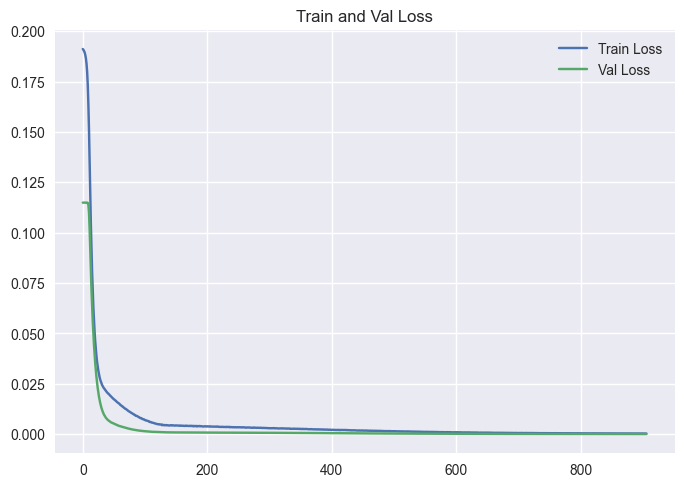

Training iteration: 2/50
Epoch 1/1000
8/8 [==============================] - 1s 30ms/step - loss: 0.1891 - accuracy: 0.0013 - val_loss: 0.1148 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.1877 - accuracy: 4.5537e-04 - val_loss: 0.1147 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1879 - accuracy: 0.0024 - val_loss: 0.1143 - val_accuracy: 0.0000e+00
Epoch 4/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.1778 - accuracy: 0.0013 - val_loss: 0.1136 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.1785 - accuracy: 7.0339e-04 - val_loss: 0.1127 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1849 - accuracy: 7.0339e-04 - val_loss: 0.1110 - val_accuracy: 0.0000e+00
Epoch 7/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.1783 - accuracy: 7.0339e

Epoch 57/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0240 - accuracy: 7.0339e-04 - val_loss: 0.0023 - val_accuracy: 0.0000e+00
Epoch 58/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0264 - accuracy: 9.9274e-04 - val_loss: 0.0023 - val_accuracy: 0.0000e+00
Epoch 59/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0270 - accuracy: 0.0032 - val_loss: 0.0023 - val_accuracy: 0.0000e+00
Epoch 60/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0226 - accuracy: 9.9274e-04 - val_loss: 0.0023 - val_accuracy: 0.0000e+00
Epoch 61/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0266 - accuracy: 0.0050 - val_loss: 0.0023 - val_accuracy: 0.0000e+00
Epoch 62/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0228 - accuracy: 4.5537e-04 - val_loss: 0.0023 - val_accuracy: 0.0000e+00
Epoch 63/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0205 - accuracy: 0.0013 - val_loss: 0.0

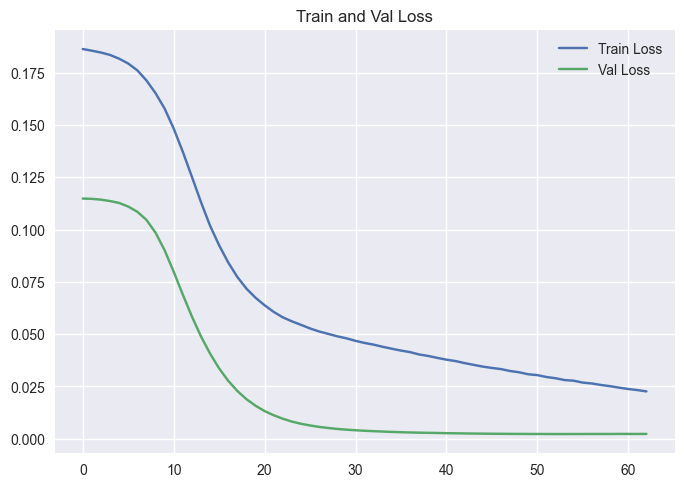

Training iteration: 3/50
Epoch 1/1000
8/8 [==============================] - 1s 33ms/step - loss: 0.1116 - accuracy: 4.5537e-04 - val_loss: 0.0999 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.1086 - accuracy: 0.0024 - val_loss: 0.0962 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.1016 - accuracy: 0.0032 - val_loss: 0.0918 - val_accuracy: 0.0000e+00
Epoch 4/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0940 - accuracy: 0.0050 - val_loss: 0.0871 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0909 - accuracy: 9.9274e-04 - val_loss: 0.0823 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0807 - accuracy: 7.0339e-04 - val_loss: 0.0772 - val_accuracy: 0.0000e+00
Epoch 7/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0763 - accuracy: 9.9274e

Epoch 57/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0182 - accuracy: 0.0013 - val_loss: 0.0055 - val_accuracy: 0.0000e+00
Epoch 58/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0194 - accuracy: 4.5537e-04 - val_loss: 0.0055 - val_accuracy: 0.0000e+00
Epoch 59/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.0175 - accuracy: 0.0050 - val_loss: 0.0054 - val_accuracy: 0.0000e+00
Epoch 60/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0187 - accuracy: 4.5537e-04 - val_loss: 0.0054 - val_accuracy: 0.0000e+00
Epoch 61/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0171 - accuracy: 0.0032 - val_loss: 0.0054 - val_accuracy: 0.0000e+00
Epoch 62/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0180 - accuracy: 0.0013 - val_loss: 0.0053 - val_accuracy: 0.0000e+00
Epoch 63/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0168 - accuracy: 7.0339e-04 - val_loss: 0.0053 

Epoch 113/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0125 - accuracy: 0.0050 - val_loss: 0.0027 - val_accuracy: 0.0000e+00
Epoch 114/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0132 - accuracy: 0.0018 - val_loss: 0.0027 - val_accuracy: 0.0000e+00
Epoch 115/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0105 - accuracy: 0.0018 - val_loss: 0.0026 - val_accuracy: 0.0000e+00
Epoch 116/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0119 - accuracy: 7.0339e-04 - val_loss: 0.0026 - val_accuracy: 0.0000e+00
Epoch 117/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0121 - accuracy: 0.0050 - val_loss: 0.0026 - val_accuracy: 0.0000e+00
Epoch 118/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0115 - accuracy: 7.0339e-04 - val_loss: 0.0025 - val_accuracy: 0.0000e+00
Epoch 119/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0112 - accuracy: 0.0013 - val_loss: 0.00

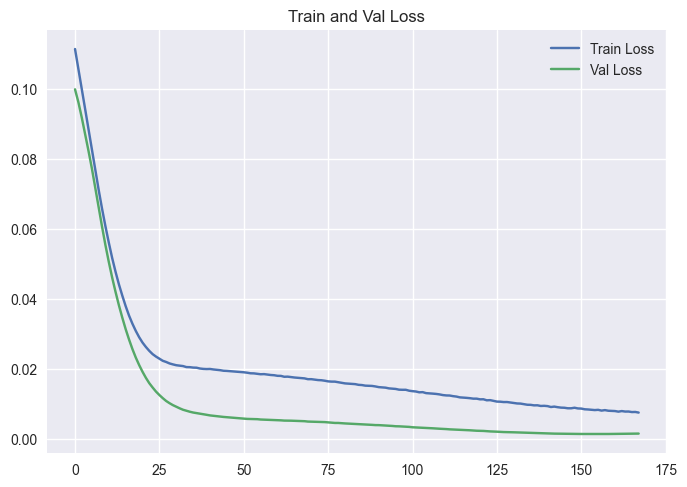

Training iteration: 4/50
Epoch 1/1000
8/8 [==============================] - 1s 29ms/step - loss: 0.1981 - accuracy: 0.0013 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.1955 - accuracy: 0.0013 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.1969 - accuracy: 0.0013 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 4/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.1910 - accuracy: 0.0018 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1899 - accuracy: 0.0032 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.1950 - accuracy: 0.0050 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 7/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1939 - accuracy: 4.5537e-04 - val_lo

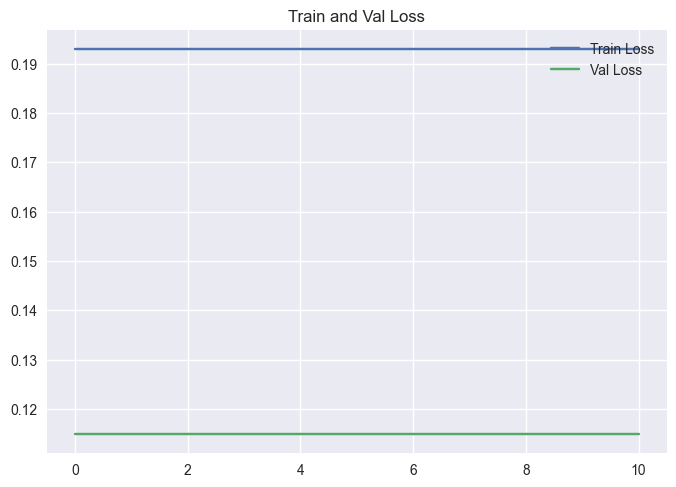

Training iteration: 5/50
Epoch 1/1000
8/8 [==============================] - 1s 34ms/step - loss: 0.1228 - accuracy: 0.0000e+00 - val_loss: 0.0902 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1200 - accuracy: 0.0000e+00 - val_loss: 0.0852 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.1109 - accuracy: 0.0000e+00 - val_loss: 0.0801 - val_accuracy: 0.0000e+00
Epoch 4/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1019 - accuracy: 0.0000e+00 - val_loss: 0.0750 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1020 - accuracy: 0.0000e+00 - val_loss: 0.0699 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0951 - accuracy: 0.0000e+00 - val_loss: 0.0646 - val_accuracy: 0.0000e+00
Epoch 7/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0860 - accur

Epoch 56/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0286 - accuracy: 9.9274e-04 - val_loss: 0.0057 - val_accuracy: 0.0000e+00
Epoch 57/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0249 - accuracy: 0.0024 - val_loss: 0.0056 - val_accuracy: 0.0000e+00
Epoch 58/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0240 - accuracy: 0.0024 - val_loss: 0.0054 - val_accuracy: 0.0000e+00
Epoch 59/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0263 - accuracy: 0.0050 - val_loss: 0.0053 - val_accuracy: 0.0000e+00
Epoch 60/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0246 - accuracy: 7.0339e-04 - val_loss: 0.0051 - val_accuracy: 0.0000e+00
Epoch 61/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0228 - accuracy: 7.0339e-04 - val_loss: 0.0050 - val_accuracy: 0.0000e+00
Epoch 62/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0258 - accuracy: 9.9274e-04 - val_loss: 0.0

Epoch 112/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0095 - accuracy: 0.0013 - val_loss: 0.0021 - val_accuracy: 0.0000e+00
Epoch 113/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0086 - accuracy: 0.0032 - val_loss: 0.0021 - val_accuracy: 0.0000e+00
Epoch 114/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0091 - accuracy: 9.9274e-04 - val_loss: 0.0021 - val_accuracy: 0.0000e+00
Epoch 115/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0077 - accuracy: 0.0024 - val_loss: 0.0021 - val_accuracy: 0.0000e+00
Epoch 116/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0091 - accuracy: 0.0032 - val_loss: 0.0020 - val_accuracy: 0.0000e+00
Epoch 117/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0076 - accuracy: 0.0018 - val_loss: 0.0020 - val_accuracy: 0.0000e+00
Epoch 118/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0094 - accuracy: 0.0032 - val_loss: 0.0020 -

8/8 [==============================] - 0s 7ms/step - loss: 0.0063 - accuracy: 0.0024 - val_loss: 0.0016 - val_accuracy: 0.0000e+00
Epoch 223/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0060 - accuracy: 0.0024 - val_loss: 0.0016 - val_accuracy: 0.0000e+00
Epoch 224/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0054 - accuracy: 0.0013 - val_loss: 0.0016 - val_accuracy: 0.0000e+00
Epoch 225/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0067 - accuracy: 0.0050 - val_loss: 0.0016 - val_accuracy: 0.0000e+00
Epoch 226/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0053 - accuracy: 0.0032 - val_loss: 0.0015 - val_accuracy: 0.0000e+00
Epoch 227/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0057 - accuracy: 4.5537e-04 - val_loss: 0.0015 - val_accuracy: 0.0000e+00
Epoch 228/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0063 - accuracy: 0.0013 - val_loss: 0.0015 - val_accuracy: 

Epoch 278/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0044 - accuracy: 0.0032 - val_loss: 0.0013 - val_accuracy: 0.0000e+00
Epoch 279/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0047 - accuracy: 9.9274e-04 - val_loss: 0.0013 - val_accuracy: 0.0000e+00
Epoch 280/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0046 - accuracy: 9.9274e-04 - val_loss: 0.0013 - val_accuracy: 0.0000e+00
Epoch 281/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0047 - accuracy: 9.9274e-04 - val_loss: 0.0013 - val_accuracy: 0.0000e+00
Epoch 282/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0050 - accuracy: 0.0050 - val_loss: 0.0013 - val_accuracy: 0.0000e+00
Epoch 283/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0045 - accuracy: 0.0050 - val_loss: 0.0013 - val_accuracy: 0.0000e+00
Epoch 284/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0049 - accuracy: 0.0024 - val_loss: 

8/8 [==============================] - 0s 11ms/step - loss: 0.0030 - accuracy: 0.0018 - val_loss: 7.7802e-04 - val_accuracy: 0.0000e+00
Epoch 388/1000
8/8 [==============================] - 0s 12ms/step - loss: 0.0028 - accuracy: 0.0024 - val_loss: 7.8407e-04 - val_accuracy: 0.0000e+00
Epoch 389/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0028 - accuracy: 0.0024 - val_loss: 7.8045e-04 - val_accuracy: 0.0000e+00
Epoch 390/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0028 - accuracy: 9.9274e-04 - val_loss: 7.7539e-04 - val_accuracy: 0.0000e+00
Epoch 391/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0027 - accuracy: 0.0032 - val_loss: 7.6730e-04 - val_accuracy: 0.0000e+00
Epoch 392/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0028 - accuracy: 0.0024 - val_loss: 7.5518e-04 - val_accuracy: 0.0000e+00
Epoch 393/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0029 - accuracy: 7.0339e-04 - val

8/8 [==============================] - 0s 8ms/step - loss: 0.0021 - accuracy: 9.9274e-04 - val_loss: 5.9085e-04 - val_accuracy: 0.0000e+00
Epoch 442/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0021 - accuracy: 7.0339e-04 - val_loss: 5.7999e-04 - val_accuracy: 0.0000e+00
Epoch 443/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0022 - accuracy: 9.9274e-04 - val_loss: 5.7916e-04 - val_accuracy: 0.0000e+00
Epoch 444/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0021 - accuracy: 0.0032 - val_loss: 5.6425e-04 - val_accuracy: 0.0000e+00
Epoch 445/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0022 - accuracy: 4.5537e-04 - val_loss: 5.7408e-04 - val_accuracy: 0.0000e+00
Epoch 446/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0020 - accuracy: 0.0018 - val_loss: 5.6948e-04 - val_accuracy: 0.0000e+00
Epoch 447/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0019 - accuracy: 0.0032

8/8 [==============================] - 0s 8ms/step - loss: 0.0012 - accuracy: 9.9274e-04 - val_loss: 3.0984e-04 - val_accuracy: 0.0000e+00
Epoch 550/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0013 - accuracy: 0.0018 - val_loss: 3.0384e-04 - val_accuracy: 0.0000e+00
Epoch 551/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0012 - accuracy: 9.9274e-04 - val_loss: 3.0604e-04 - val_accuracy: 0.0000e+00
Epoch 552/1000
8/8 [==============================] - 0s 7ms/step - loss: 9.6945e-04 - accuracy: 7.0339e-04 - val_loss: 3.0447e-04 - val_accuracy: 0.0000e+00
Epoch 553/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0011 - accuracy: 4.5537e-04 - val_loss: 2.9999e-04 - val_accuracy: 0.0000e+00
Epoch 554/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0012 - accuracy: 0.0024 - val_loss: 2.9678e-04 - val_accuracy: 0.0000e+00
Epoch 555/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0011 - accuracy: 0.

Epoch 655/1000
8/8 [==============================] - 0s 10ms/step - loss: 6.8645e-04 - accuracy: 7.0339e-04 - val_loss: 1.8376e-04 - val_accuracy: 0.0000e+00
Epoch 656/1000
8/8 [==============================] - 0s 8ms/step - loss: 7.6122e-04 - accuracy: 0.0032 - val_loss: 1.8268e-04 - val_accuracy: 0.0000e+00
Epoch 657/1000
8/8 [==============================] - 0s 8ms/step - loss: 7.2809e-04 - accuracy: 0.0050 - val_loss: 1.8324e-04 - val_accuracy: 0.0000e+00
Epoch 658/1000
8/8 [==============================] - 0s 9ms/step - loss: 7.2702e-04 - accuracy: 7.0339e-04 - val_loss: 1.8111e-04 - val_accuracy: 0.0000e+00
Epoch 659/1000
8/8 [==============================] - 0s 8ms/step - loss: 6.8180e-04 - accuracy: 0.0013 - val_loss: 1.8354e-04 - val_accuracy: 0.0000e+00
Epoch 660/1000
8/8 [==============================] - 0s 8ms/step - loss: 6.5688e-04 - accuracy: 0.0018 - val_loss: 1.7993e-04 - val_accuracy: 0.0000e+00
Epoch 661/1000
8/8 [==============================] - 0s 8ms/step -

Epoch 760/1000
8/8 [==============================] - 0s 9ms/step - loss: 4.4654e-04 - accuracy: 0.0018 - val_loss: 1.3199e-04 - val_accuracy: 0.0000e+00
Epoch 761/1000
8/8 [==============================] - 0s 11ms/step - loss: 4.5197e-04 - accuracy: 4.5537e-04 - val_loss: 1.3251e-04 - val_accuracy: 0.0000e+00
Epoch 762/1000
8/8 [==============================] - 0s 12ms/step - loss: 4.3157e-04 - accuracy: 0.0024 - val_loss: 1.3530e-04 - val_accuracy: 0.0000e+00
Epoch 763/1000
8/8 [==============================] - 0s 10ms/step - loss: 4.4986e-04 - accuracy: 4.5537e-04 - val_loss: 1.2975e-04 - val_accuracy: 0.0000e+00
Epoch 764/1000
8/8 [==============================] - 0s 11ms/step - loss: 4.4697e-04 - accuracy: 0.0013 - val_loss: 1.2964e-04 - val_accuracy: 0.0000e+00
Epoch 765/1000
8/8 [==============================] - 0s 8ms/step - loss: 4.6028e-04 - accuracy: 7.0339e-04 - val_loss: 1.3036e-04 - val_accuracy: 0.0000e+00
Epoch 766/1000
8/8 [==============================] - 0s 10m

Epoch 865/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.5803e-04 - accuracy: 0.0050 - val_loss: 1.1394e-04 - val_accuracy: 0.0000e+00
Epoch 866/1000
8/8 [==============================] - 0s 11ms/step - loss: 3.9381e-04 - accuracy: 0.0032 - val_loss: 1.1286e-04 - val_accuracy: 0.0000e+00
Epoch 867/1000
8/8 [==============================] - 0s 10ms/step - loss: 4.2042e-04 - accuracy: 0.0018 - val_loss: 1.1233e-04 - val_accuracy: 0.0000e+00
Epoch 868/1000
8/8 [==============================] - 0s 9ms/step - loss: 4.3099e-04 - accuracy: 0.0050 - val_loss: 1.1248e-04 - val_accuracy: 0.0000e+00
Epoch 869/1000
8/8 [==============================] - 0s 11ms/step - loss: 3.4611e-04 - accuracy: 0.0024 - val_loss: 1.1208e-04 - val_accuracy: 0.0000e+00
Epoch 870/1000
8/8 [==============================] - 0s 9ms/step - loss: 3.9910e-04 - accuracy: 0.0050 - val_loss: 1.1332e-04 - val_accuracy: 0.0000e+00
Epoch 871/1000
8/8 [==============================] - 0s 8ms/step - loss:

Epoch 918/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.5445e-04 - accuracy: 0.0032 - val_loss: 1.0795e-04 - val_accuracy: 0.0000e+00
Epoch 919/1000
8/8 [==============================] - 0s 9ms/step - loss: 4.4415e-04 - accuracy: 9.9274e-04 - val_loss: 1.0880e-04 - val_accuracy: 0.0000e+00
Epoch 920/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.8083e-04 - accuracy: 0.0018 - val_loss: 1.0756e-04 - val_accuracy: 0.0000e+00
Epoch 921/1000
8/8 [==============================] - 0s 9ms/step - loss: 4.6357e-04 - accuracy: 0.0018 - val_loss: 1.0873e-04 - val_accuracy: 0.0000e+00
Epoch 922/1000
8/8 [==============================] - 0s 7ms/step - loss: 4.0946e-04 - accuracy: 0.0013 - val_loss: 1.0848e-04 - val_accuracy: 0.0000e+00
Epoch 923/1000
8/8 [==============================] - 0s 7ms/step - loss: 3.9659e-04 - accuracy: 0.0032 - val_loss: 1.0741e-04 - val_accuracy: 0.0000e+00
Epoch 924/1000
8/8 [==============================] - 0s 9ms/step - loss

Epoch 971/1000
8/8 [==============================] - 0s 9ms/step - loss: 3.5709e-04 - accuracy: 0.0013 - val_loss: 1.0840e-04 - val_accuracy: 0.0000e+00
Epoch 972/1000
8/8 [==============================] - 0s 7ms/step - loss: 3.1889e-04 - accuracy: 0.0024 - val_loss: 1.0430e-04 - val_accuracy: 0.0000e+00
Epoch 973/1000
8/8 [==============================] - 0s 7ms/step - loss: 3.9153e-04 - accuracy: 0.0018 - val_loss: 1.0526e-04 - val_accuracy: 0.0000e+00
Epoch 974/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.9663e-04 - accuracy: 0.0024 - val_loss: 1.0999e-04 - val_accuracy: 0.0000e+00
Epoch 975/1000
8/8 [==============================] - 0s 7ms/step - loss: 3.5310e-04 - accuracy: 0.0032 - val_loss: 1.0398e-04 - val_accuracy: 0.0000e+00
Epoch 976/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.4438e-04 - accuracy: 0.0032 - val_loss: 1.0493e-04 - val_accuracy: 0.0000e+00
Epoch 977/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.

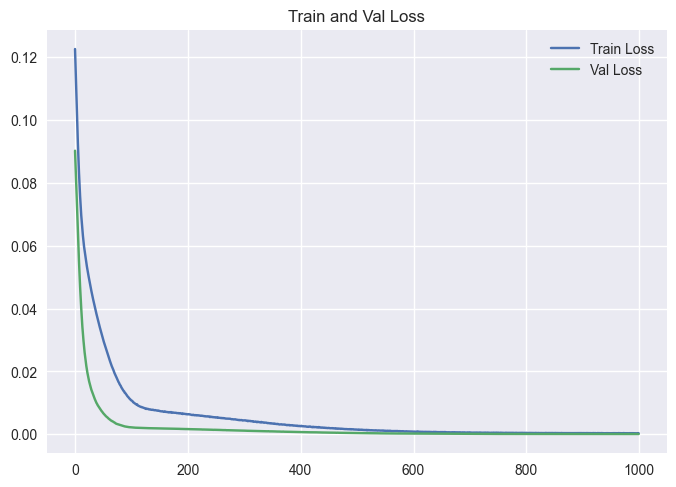

Training iteration: 6/50
Epoch 1/1000
8/8 [==============================] - 1s 32ms/step - loss: 0.0324 - accuracy: 7.0339e-04 - val_loss: 0.0141 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0294 - accuracy: 0.0018 - val_loss: 0.0120 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0255 - accuracy: 0.0050 - val_loss: 0.0101 - val_accuracy: 0.0000e+00
Epoch 4/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0252 - accuracy: 0.0032 - val_loss: 0.0085 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0232 - accuracy: 0.0018 - val_loss: 0.0072 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0202 - accuracy: 0.0050 - val_loss: 0.0061 - val_accuracy: 0.0000e+00
Epoch 7/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0177 - accuracy: 4.5537e-04 - va

Epoch 57/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0092 - accuracy: 7.0339e-04 - val_loss: 0.0019 - val_accuracy: 0.0000e+00
Epoch 58/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0090 - accuracy: 9.9274e-04 - val_loss: 0.0019 - val_accuracy: 0.0000e+00
Epoch 59/1000
8/8 [==============================] - 0s 11ms/step - loss: 0.0090 - accuracy: 0.0013 - val_loss: 0.0019 - val_accuracy: 0.0000e+00
Epoch 60/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0094 - accuracy: 0.0013 - val_loss: 0.0020 - val_accuracy: 0.0000e+00
Epoch 61/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.0082 - accuracy: 4.5537e-04 - val_loss: 0.0020 - val_accuracy: 0.0000e+00
Epoch 62/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0090 - accuracy: 9.9274e-04 - val_loss: 0.0019 - val_accuracy: 0.0000e+00
Epoch 63/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0090 - accuracy: 0.0013 - val_loss: 0

Epoch 113/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0032 - accuracy: 0.0018 - val_loss: 0.0011 - val_accuracy: 0.0000e+00
Epoch 114/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0032 - accuracy: 0.0024 - val_loss: 0.0011 - val_accuracy: 0.0000e+00
Epoch 115/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0033 - accuracy: 0.0050 - val_loss: 0.0010 - val_accuracy: 0.0000e+00
Epoch 116/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0035 - accuracy: 7.0339e-04 - val_loss: 0.0010 - val_accuracy: 0.0000e+00
Epoch 117/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0036 - accuracy: 0.0013 - val_loss: 0.0010 - val_accuracy: 0.0000e+00
Epoch 118/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0035 - accuracy: 0.0018 - val_loss: 0.0010 - val_accuracy: 0.0000e+00
Epoch 119/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0035 - accuracy: 0.0018 - val_loss: 0.0010 -

8/8 [==============================] - 0s 8ms/step - loss: 0.0017 - accuracy: 0.0018 - val_loss: 4.2321e-04 - val_accuracy: 0.0000e+00
Epoch 222/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0017 - accuracy: 0.0024 - val_loss: 4.1835e-04 - val_accuracy: 0.0000e+00
Epoch 223/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0016 - accuracy: 0.0024 - val_loss: 4.1313e-04 - val_accuracy: 0.0000e+00
Epoch 224/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0016 - accuracy: 0.0013 - val_loss: 4.1093e-04 - val_accuracy: 0.0000e+00
Epoch 225/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0015 - accuracy: 0.0018 - val_loss: 4.0701e-04 - val_accuracy: 0.0000e+00
Epoch 226/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0016 - accuracy: 7.0339e-04 - val_loss: 4.0208e-04 - val_accuracy: 0.0000e+00
Epoch 227/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0016 - accuracy: 0.0050 - val_loss:

Epoch 275/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0010 - accuracy: 0.0032 - val_loss: 2.3887e-04 - val_accuracy: 0.0000e+00
Epoch 276/1000
8/8 [==============================] - 0s 9ms/step - loss: 8.8603e-04 - accuracy: 7.0339e-04 - val_loss: 2.3643e-04 - val_accuracy: 0.0000e+00
Epoch 277/1000
8/8 [==============================] - 0s 8ms/step - loss: 9.0244e-04 - accuracy: 9.9274e-04 - val_loss: 2.3615e-04 - val_accuracy: 0.0000e+00
Epoch 278/1000
8/8 [==============================] - 0s 9ms/step - loss: 9.2257e-04 - accuracy: 0.0032 - val_loss: 2.3136e-04 - val_accuracy: 0.0000e+00
Epoch 279/1000
8/8 [==============================] - 0s 8ms/step - loss: 8.2711e-04 - accuracy: 7.0339e-04 - val_loss: 2.2915e-04 - val_accuracy: 0.0000e+00
Epoch 280/1000
8/8 [==============================] - 0s 9ms/step - loss: 8.5314e-04 - accuracy: 0.0024 - val_loss: 2.2698e-04 - val_accuracy: 0.0000e+00
Epoch 281/1000
8/8 [==============================] - 0s 8ms/step - 

Epoch 380/1000
8/8 [==============================] - 0s 11ms/step - loss: 4.0416e-04 - accuracy: 9.9274e-04 - val_loss: 1.0178e-04 - val_accuracy: 0.0000e+00
Epoch 381/1000
8/8 [==============================] - 0s 13ms/step - loss: 4.3809e-04 - accuracy: 9.9274e-04 - val_loss: 1.0205e-04 - val_accuracy: 0.0000e+00
Epoch 382/1000
8/8 [==============================] - 0s 13ms/step - loss: 4.3485e-04 - accuracy: 0.0024 - val_loss: 1.0398e-04 - val_accuracy: 0.0000e+00
Epoch 383/1000
8/8 [==============================] - 0s 11ms/step - loss: 4.4820e-04 - accuracy: 0.0024 - val_loss: 1.0740e-04 - val_accuracy: 0.0000e+00
Epoch 384/1000
8/8 [==============================] - 0s 12ms/step - loss: 4.2551e-04 - accuracy: 0.0013 - val_loss: 1.0113e-04 - val_accuracy: 0.0000e+00
Epoch 385/1000
8/8 [==============================] - 0s 12ms/step - loss: 4.5501e-04 - accuracy: 0.0050 - val_loss: 1.0149e-04 - val_accuracy: 0.0000e+00
Epoch 386/1000
8/8 [==============================] - 0s 15ms/

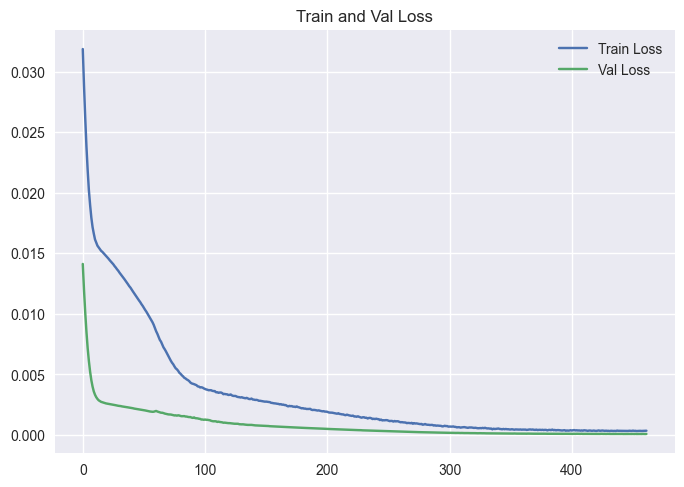

Training iteration: 7/50
Epoch 1/1000
8/8 [==============================] - 1s 32ms/step - loss: 0.0264 - accuracy: 0.0000e+00 - val_loss: 0.0033 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0221 - accuracy: 7.0339e-04 - val_loss: 0.0029 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0179 - accuracy: 0.0018 - val_loss: 0.0028 - val_accuracy: 0.0000e+00
Epoch 4/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0171 - accuracy: 0.0013 - val_loss: 0.0029 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0184 - accuracy: 0.0024 - val_loss: 0.0031 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0162 - accuracy: 7.0339e-04 - val_loss: 0.0034 - val_accuracy: 0.0000e+00
Epoch 7/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0187 - accuracy: 0.0050 

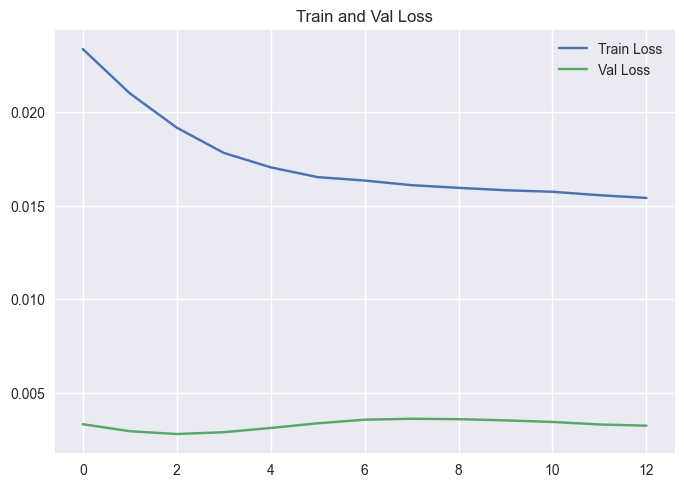

Training iteration: 8/50
Epoch 1/1000
8/8 [==============================] - 1s 31ms/step - loss: 0.1554 - accuracy: 0.0024 - val_loss: 0.1125 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.1461 - accuracy: 0.0050 - val_loss: 0.1116 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1398 - accuracy: 0.0032 - val_loss: 0.1102 - val_accuracy: 0.0000e+00
Epoch 4/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1347 - accuracy: 0.0013 - val_loss: 0.1082 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1283 - accuracy: 0.0032 - val_loss: 0.1057 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.1229 - accuracy: 0.0032 - val_loss: 0.1027 - val_accuracy: 0.0000e+00
Epoch 7/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.1081 - accuracy: 0.0032 - val_loss: 

Epoch 57/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0180 - accuracy: 4.5537e-04 - val_loss: 0.0127 - val_accuracy: 0.0000e+00
Epoch 58/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0179 - accuracy: 4.5537e-04 - val_loss: 0.0125 - val_accuracy: 0.0000e+00
Epoch 59/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0168 - accuracy: 9.9274e-04 - val_loss: 0.0123 - val_accuracy: 0.0000e+00
Epoch 60/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0168 - accuracy: 0.0013 - val_loss: 0.0122 - val_accuracy: 0.0000e+00
Epoch 61/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0160 - accuracy: 9.9274e-04 - val_loss: 0.0119 - val_accuracy: 0.0000e+00
Epoch 62/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0148 - accuracy: 0.0018 - val_loss: 0.0117 - val_accuracy: 0.0000e+00
Epoch 63/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0165 - accuracy: 0.0018 - val_loss: 0.0

Epoch 113/1000
8/8 [==============================] - 0s 11ms/step - loss: 0.0094 - accuracy: 0.0018 - val_loss: 0.0048 - val_accuracy: 0.0000e+00
Epoch 114/1000
8/8 [==============================] - 0s 14ms/step - loss: 0.0094 - accuracy: 9.9274e-04 - val_loss: 0.0048 - val_accuracy: 0.0000e+00
Epoch 115/1000
8/8 [==============================] - 0s 11ms/step - loss: 0.0104 - accuracy: 0.0018 - val_loss: 0.0047 - val_accuracy: 0.0000e+00
Epoch 116/1000
8/8 [==============================] - 0s 11ms/step - loss: 0.0099 - accuracy: 9.9274e-04 - val_loss: 0.0046 - val_accuracy: 0.0000e+00
Epoch 117/1000
8/8 [==============================] - 0s 13ms/step - loss: 0.0081 - accuracy: 7.0339e-04 - val_loss: 0.0045 - val_accuracy: 0.0000e+00
Epoch 118/1000
8/8 [==============================] - 0s 13ms/step - loss: 0.0081 - accuracy: 7.0339e-04 - val_loss: 0.0045 - val_accuracy: 0.0000e+00
Epoch 119/1000
8/8 [==============================] - 0s 11ms/step - loss: 0.0092 - accuracy: 0.0032 -

Epoch 224/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.0060 - accuracy: 7.0339e-04 - val_loss: 0.0022 - val_accuracy: 0.0000e+00
Epoch 225/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.0056 - accuracy: 0.0032 - val_loss: 0.0022 - val_accuracy: 0.0000e+00
Epoch 226/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0059 - accuracy: 0.0032 - val_loss: 0.0022 - val_accuracy: 0.0000e+00
Epoch 227/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0061 - accuracy: 0.0018 - val_loss: 0.0021 - val_accuracy: 0.0000e+00
Epoch 228/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0063 - accuracy: 0.0032 - val_loss: 0.0021 - val_accuracy: 0.0000e+00
Epoch 229/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0054 - accuracy: 0.0018 - val_loss: 0.0021 - val_accuracy: 0.0000e+00
Epoch 230/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0060 - accuracy: 9.9274e-04 - val_loss: 0.

8/8 [==============================] - 0s 8ms/step - loss: 0.0036 - accuracy: 0.0032 - val_loss: 0.0012 - val_accuracy: 0.0000e+00
Epoch 335/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0033 - accuracy: 9.9274e-04 - val_loss: 0.0012 - val_accuracy: 0.0000e+00
Epoch 336/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0034 - accuracy: 0.0050 - val_loss: 0.0012 - val_accuracy: 0.0000e+00
Epoch 337/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0035 - accuracy: 0.0050 - val_loss: 0.0012 - val_accuracy: 0.0000e+00
Epoch 338/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0035 - accuracy: 7.0339e-04 - val_loss: 0.0012 - val_accuracy: 0.0000e+00
Epoch 339/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0036 - accuracy: 0.0024 - val_loss: 0.0012 - val_accuracy: 0.0000e+00
Epoch 340/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0034 - accuracy: 0.0032 - val_loss: 0.0012 - val_accura

8/8 [==============================] - 0s 7ms/step - loss: 0.0025 - accuracy: 0.0013 - val_loss: 8.4588e-04 - val_accuracy: 0.0000e+00
Epoch 390/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0027 - accuracy: 9.9274e-04 - val_loss: 8.4059e-04 - val_accuracy: 0.0000e+00
Epoch 391/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0024 - accuracy: 4.5537e-04 - val_loss: 8.3648e-04 - val_accuracy: 0.0000e+00
Epoch 392/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0025 - accuracy: 7.0339e-04 - val_loss: 8.2957e-04 - val_accuracy: 0.0000e+00
Epoch 393/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0025 - accuracy: 9.9274e-04 - val_loss: 8.2466e-04 - val_accuracy: 0.0000e+00
Epoch 394/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0024 - accuracy: 4.5537e-04 - val_loss: 8.1964e-04 - val_accuracy: 0.0000e+00
Epoch 395/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0024 - accuracy: 0.

Epoch 443/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0017 - accuracy: 7.0339e-04 - val_loss: 6.1173e-04 - val_accuracy: 0.0000e+00
Epoch 444/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0017 - accuracy: 0.0050 - val_loss: 6.0475e-04 - val_accuracy: 0.0000e+00
Epoch 445/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0018 - accuracy: 0.0013 - val_loss: 6.0909e-04 - val_accuracy: 0.0000e+00
Epoch 446/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0015 - accuracy: 0.0013 - val_loss: 6.0121e-04 - val_accuracy: 0.0000e+00
Epoch 447/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0017 - accuracy: 0.0013 - val_loss: 5.9196e-04 - val_accuracy: 0.0000e+00
Epoch 448/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0019 - accuracy: 0.0050 - val_loss: 5.9232e-04 - val_accuracy: 0.0000e+00
Epoch 449/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0017 - accuracy: 0.0

Epoch 551/1000
8/8 [==============================] - 0s 8ms/step - loss: 9.8414e-04 - accuracy: 0.0018 - val_loss: 3.4111e-04 - val_accuracy: 0.0000e+00
Epoch 552/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0011 - accuracy: 0.0050 - val_loss: 3.4305e-04 - val_accuracy: 0.0000e+00
Epoch 553/1000
8/8 [==============================] - 0s 7ms/step - loss: 8.7097e-04 - accuracy: 0.0032 - val_loss: 3.5492e-04 - val_accuracy: 0.0000e+00
Epoch 554/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0011 - accuracy: 7.0339e-04 - val_loss: 3.4306e-04 - val_accuracy: 0.0000e+00
Epoch 555/1000
8/8 [==============================] - 0s 7ms/step - loss: 9.1866e-04 - accuracy: 0.0013 - val_loss: 3.4382e-04 - val_accuracy: 0.0000e+00
Epoch 556/1000
8/8 [==============================] - 0s 7ms/step - loss: 9.3562e-04 - accuracy: 0.0018 - val_loss: 3.4316e-04 - val_accuracy: 0.0000e+00
Epoch 557/1000
8/8 [==============================] - 0s 7ms/step - loss: 9.0151

Epoch 604/1000
8/8 [==============================] - 0s 8ms/step - loss: 6.9490e-04 - accuracy: 9.9274e-04 - val_loss: 2.6919e-04 - val_accuracy: 0.0000e+00
Epoch 605/1000
8/8 [==============================] - 0s 8ms/step - loss: 8.0167e-04 - accuracy: 0.0050 - val_loss: 2.8914e-04 - val_accuracy: 0.0000e+00
Epoch 606/1000
8/8 [==============================] - 0s 9ms/step - loss: 6.3604e-04 - accuracy: 4.5537e-04 - val_loss: 2.6769e-04 - val_accuracy: 0.0000e+00
Epoch 607/1000
8/8 [==============================] - 0s 9ms/step - loss: 6.6991e-04 - accuracy: 0.0018 - val_loss: 2.6411e-04 - val_accuracy: 0.0000e+00
Epoch 608/1000
8/8 [==============================] - 0s 11ms/step - loss: 7.7793e-04 - accuracy: 9.9274e-04 - val_loss: 2.6512e-04 - val_accuracy: 0.0000e+00
Epoch 609/1000
8/8 [==============================] - 0s 9ms/step - loss: 8.1611e-04 - accuracy: 0.0050 - val_loss: 2.7910e-04 - val_accuracy: 0.0000e+00
Epoch 610/1000
8/8 [==============================] - 0s 10ms/s

Epoch 657/1000
8/8 [==============================] - 0s 8ms/step - loss: 5.1807e-04 - accuracy: 0.0018 - val_loss: 2.2782e-04 - val_accuracy: 0.0000e+00
Epoch 658/1000
8/8 [==============================] - 0s 7ms/step - loss: 5.7093e-04 - accuracy: 0.0018 - val_loss: 2.1990e-04 - val_accuracy: 0.0000e+00
Epoch 659/1000
8/8 [==============================] - 0s 8ms/step - loss: 5.1789e-04 - accuracy: 0.0032 - val_loss: 2.1407e-04 - val_accuracy: 0.0000e+00
Epoch 660/1000
8/8 [==============================] - 0s 8ms/step - loss: 6.0273e-04 - accuracy: 4.5537e-04 - val_loss: 2.1505e-04 - val_accuracy: 0.0000e+00
Epoch 661/1000
8/8 [==============================] - 0s 7ms/step - loss: 5.6294e-04 - accuracy: 0.0013 - val_loss: 2.1619e-04 - val_accuracy: 0.0000e+00
Epoch 662/1000
8/8 [==============================] - 0s 7ms/step - loss: 5.7351e-04 - accuracy: 0.0013 - val_loss: 2.1168e-04 - val_accuracy: 0.0000e+00
Epoch 663/1000
8/8 [==============================] - 0s 8ms/step - loss

Epoch 710/1000
8/8 [==============================] - 0s 7ms/step - loss: 4.5683e-04 - accuracy: 0.0024 - val_loss: 1.7993e-04 - val_accuracy: 0.0000e+00
Epoch 711/1000
8/8 [==============================] - 0s 7ms/step - loss: 4.8528e-04 - accuracy: 9.9274e-04 - val_loss: 1.8154e-04 - val_accuracy: 0.0000e+00
Epoch 712/1000
8/8 [==============================] - 0s 13ms/step - loss: 4.3173e-04 - accuracy: 0.0024 - val_loss: 1.7485e-04 - val_accuracy: 0.0000e+00
Epoch 713/1000
8/8 [==============================] - 0s 7ms/step - loss: 4.4962e-04 - accuracy: 0.0032 - val_loss: 1.8011e-04 - val_accuracy: 0.0000e+00
Epoch 714/1000
8/8 [==============================] - 0s 7ms/step - loss: 4.8377e-04 - accuracy: 9.9274e-04 - val_loss: 1.7924e-04 - val_accuracy: 0.0000e+00
Epoch 715/1000
8/8 [==============================] - 0s 7ms/step - loss: 4.9700e-04 - accuracy: 0.0018 - val_loss: 1.7158e-04 - val_accuracy: 0.0000e+00
Epoch 716/1000
8/8 [==============================] - 0s 7ms/step -

Epoch 763/1000
8/8 [==============================] - 0s 9ms/step - loss: 3.7028e-04 - accuracy: 7.0339e-04 - val_loss: 1.5411e-04 - val_accuracy: 0.0000e+00
Epoch 764/1000
8/8 [==============================] - 0s 9ms/step - loss: 4.4028e-04 - accuracy: 0.0032 - val_loss: 1.5108e-04 - val_accuracy: 0.0000e+00
Epoch 765/1000
8/8 [==============================] - 0s 7ms/step - loss: 3.9836e-04 - accuracy: 0.0050 - val_loss: 1.5997e-04 - val_accuracy: 0.0000e+00
Epoch 766/1000
8/8 [==============================] - 0s 8ms/step - loss: 4.1800e-04 - accuracy: 0.0032 - val_loss: 1.5105e-04 - val_accuracy: 0.0000e+00
Epoch 767/1000
8/8 [==============================] - 0s 7ms/step - loss: 4.1183e-04 - accuracy: 0.0032 - val_loss: 1.5728e-04 - val_accuracy: 0.0000e+00
Epoch 768/1000
8/8 [==============================] - 0s 7ms/step - loss: 3.7447e-04 - accuracy: 4.5537e-04 - val_loss: 1.5477e-04 - val_accuracy: 0.0000e+00
Epoch 769/1000
8/8 [==============================] - 0s 8ms/step - 

Epoch 816/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.9102e-04 - accuracy: 0.0013 - val_loss: 1.3595e-04 - val_accuracy: 0.0000e+00
Epoch 817/1000
8/8 [==============================] - 0s 7ms/step - loss: 3.5467e-04 - accuracy: 0.0024 - val_loss: 1.3724e-04 - val_accuracy: 0.0000e+00
Epoch 818/1000
8/8 [==============================] - 0s 7ms/step - loss: 3.4060e-04 - accuracy: 0.0032 - val_loss: 1.3688e-04 - val_accuracy: 0.0000e+00
Epoch 819/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.6602e-04 - accuracy: 0.0013 - val_loss: 1.4194e-04 - val_accuracy: 0.0000e+00
Epoch 820/1000
8/8 [==============================] - 0s 7ms/step - loss: 3.6964e-04 - accuracy: 0.0024 - val_loss: 1.3805e-04 - val_accuracy: 0.0000e+00
Epoch 821/1000
8/8 [==============================] - 0s 7ms/step - loss: 3.6853e-04 - accuracy: 0.0050 - val_loss: 1.3718e-04 - val_accuracy: 0.0000e+00
Epoch 822/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.

Epoch 869/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.0337e-04 - accuracy: 9.9274e-04 - val_loss: 1.2708e-04 - val_accuracy: 0.0000e+00
Epoch 870/1000
8/8 [==============================] - 0s 9ms/step - loss: 3.4286e-04 - accuracy: 4.5537e-04 - val_loss: 1.2417e-04 - val_accuracy: 0.0000e+00
Epoch 871/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.4104e-04 - accuracy: 0.0013 - val_loss: 1.2567e-04 - val_accuracy: 0.0000e+00
Epoch 872/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.0672e-04 - accuracy: 0.0032 - val_loss: 1.2391e-04 - val_accuracy: 0.0000e+00
Epoch 873/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.4909e-04 - accuracy: 0.0050 - val_loss: 1.2402e-04 - val_accuracy: 0.0000e+00
Epoch 874/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.3949e-04 - accuracy: 0.0024 - val_loss: 1.3080e-04 - val_accuracy: 0.0000e+00
Epoch 875/1000
8/8 [==============================] - 0s 8ms/step - 

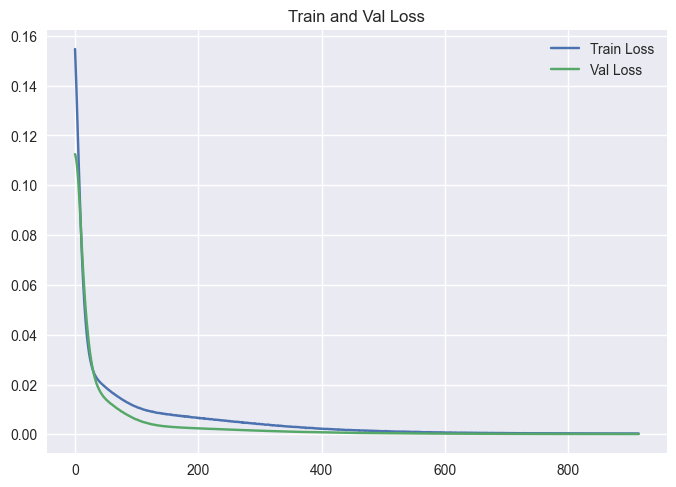

Training iteration: 9/50
Epoch 1/1000
8/8 [==============================] - 1s 29ms/step - loss: 0.1512 - accuracy: 7.0339e-04 - val_loss: 0.1068 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1462 - accuracy: 0.0013 - val_loss: 0.1045 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.1403 - accuracy: 0.0018 - val_loss: 0.1020 - val_accuracy: 0.0000e+00
Epoch 4/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1378 - accuracy: 0.0032 - val_loss: 0.0993 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.1366 - accuracy: 0.0032 - val_loss: 0.0963 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.1293 - accuracy: 0.0050 - val_loss: 0.0928 - val_accuracy: 0.0000e+00
Epoch 7/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1197 - accuracy: 0.0050 - val_lo

Epoch 57/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0318 - accuracy: 4.5537e-04 - val_loss: 0.0051 - val_accuracy: 0.0000e+00
Epoch 58/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0313 - accuracy: 0.0024 - val_loss: 0.0051 - val_accuracy: 0.0000e+00
Epoch 59/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0302 - accuracy: 0.0032 - val_loss: 0.0051 - val_accuracy: 0.0000e+00
Epoch 60/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0314 - accuracy: 0.0013 - val_loss: 0.0050 - val_accuracy: 0.0000e+00
Epoch 61/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0301 - accuracy: 0.0013 - val_loss: 0.0050 - val_accuracy: 0.0000e+00
Epoch 62/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0278 - accuracy: 7.0339e-04 - val_loss: 0.0050 - val_accuracy: 0.0000e+00
Epoch 63/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0314 - accuracy: 0.0018 - val_loss: 0.0050 - va

8/8 [==============================] - 0s 9ms/step - loss: 0.0211 - accuracy: 0.0024 - val_loss: 0.0033 - val_accuracy: 0.0000e+00
Epoch 114/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0195 - accuracy: 0.0024 - val_loss: 0.0033 - val_accuracy: 0.0000e+00
Epoch 115/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0209 - accuracy: 0.0018 - val_loss: 0.0032 - val_accuracy: 0.0000e+00
Epoch 116/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0196 - accuracy: 0.0050 - val_loss: 0.0032 - val_accuracy: 0.0000e+00
Epoch 117/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0192 - accuracy: 4.5537e-04 - val_loss: 0.0031 - val_accuracy: 0.0000e+00
Epoch 118/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0188 - accuracy: 0.0013 - val_loss: 0.0031 - val_accuracy: 0.0000e+00
Epoch 119/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0178 - accuracy: 7.0339e-04 - val_loss: 0.0031 - val_accura

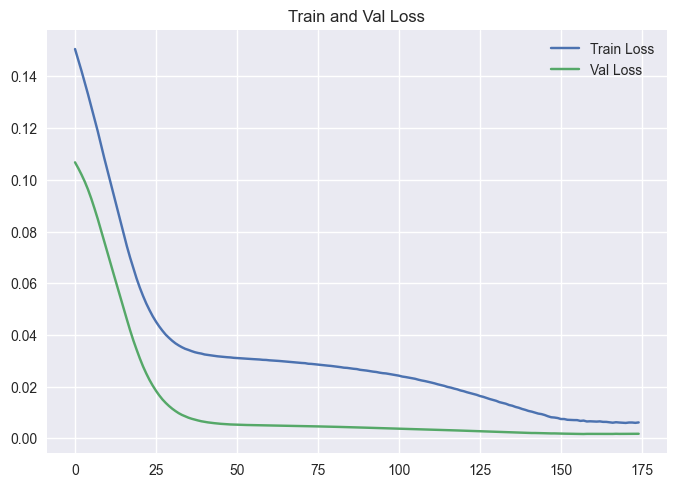

Training iteration: 10/50
Epoch 1/1000
8/8 [==============================] - 1s 27ms/step - loss: 0.1914 - accuracy: 9.9274e-04 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1944 - accuracy: 9.9274e-04 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.1989 - accuracy: 7.0339e-04 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 4/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.1841 - accuracy: 4.5537e-04 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.1960 - accuracy: 0.0050 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.1989 - accuracy: 7.0339e-04 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 7/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1926 - accuracy

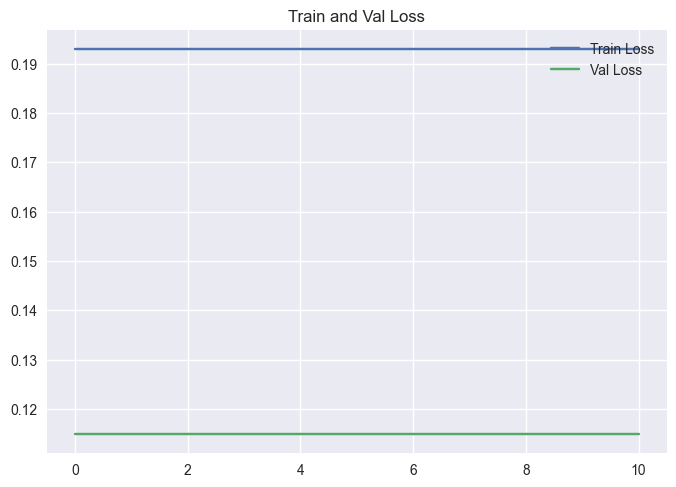

Training iteration: 11/50
Epoch 1/1000
8/8 [==============================] - 1s 29ms/step - loss: 0.1935 - accuracy: 0.0013 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1916 - accuracy: 0.0024 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.1933 - accuracy: 0.0013 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 4/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.1960 - accuracy: 7.0339e-04 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.1952 - accuracy: 0.0050 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.1913 - accuracy: 9.9274e-04 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 7/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1917 - accuracy: 7.0339e-0

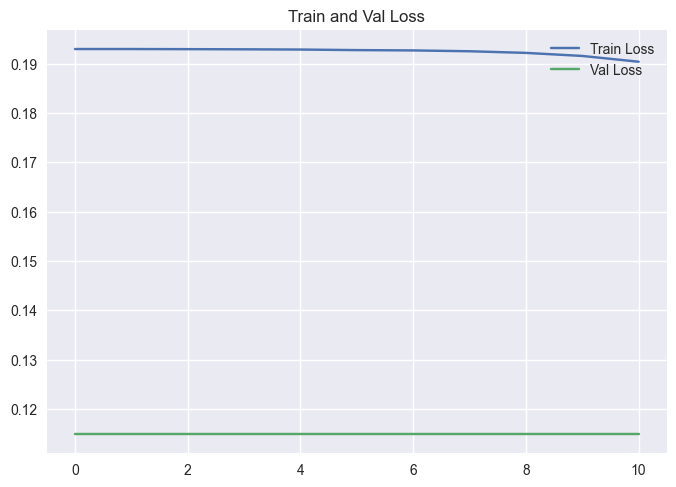

Training iteration: 12/50
Epoch 1/1000
8/8 [==============================] - 1s 28ms/step - loss: 0.1874 - accuracy: 0.0018 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1919 - accuracy: 0.0018 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.1934 - accuracy: 0.0018 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 4/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1891 - accuracy: 7.0339e-04 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.1954 - accuracy: 0.0024 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1991 - accuracy: 0.0013 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 7/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1919 - accuracy: 0.0013 - val_l

Epoch 57/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0135 - accuracy: 7.0339e-04 - val_loss: 0.0016 - val_accuracy: 0.0000e+00
Epoch 58/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0154 - accuracy: 9.9274e-04 - val_loss: 0.0016 - val_accuracy: 0.0000e+00
Epoch 59/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0151 - accuracy: 0.0050 - val_loss: 0.0015 - val_accuracy: 0.0000e+00
Epoch 60/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0143 - accuracy: 7.0339e-04 - val_loss: 0.0015 - val_accuracy: 0.0000e+00
Epoch 61/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0129 - accuracy: 0.0032 - val_loss: 0.0015 - val_accuracy: 0.0000e+00
Epoch 62/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0149 - accuracy: 0.0050 - val_loss: 0.0015 - val_accuracy: 0.0000e+00
Epoch 63/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0146 - accuracy: 9.9274e-04 - val_loss: 0.0

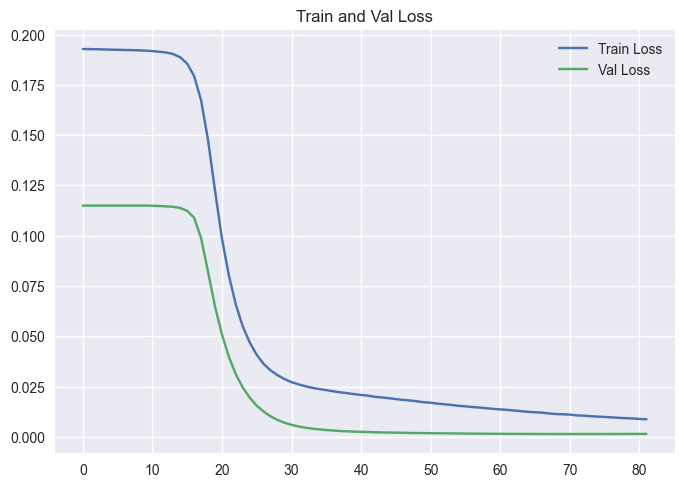

Training iteration: 13/50
Epoch 1/1000
8/8 [==============================] - 1s 35ms/step - loss: 0.3453 - accuracy: 7.0339e-04 - val_loss: 0.2881 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.3309 - accuracy: 0.0018 - val_loss: 0.2761 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.3081 - accuracy: 0.0013 - val_loss: 0.2645 - val_accuracy: 0.0000e+00
Epoch 4/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.2956 - accuracy: 0.0032 - val_loss: 0.2530 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.2762 - accuracy: 0.0018 - val_loss: 0.2420 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.2637 - accuracy: 0.0024 - val_loss: 0.2312 - val_accuracy: 0.0000e+00
Epoch 7/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.2456 - accuracy: 4.5537e-04 - v

Epoch 57/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0152 - accuracy: 4.5537e-04 - val_loss: 0.0148 - val_accuracy: 0.0000e+00
Epoch 58/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0162 - accuracy: 0.0018 - val_loss: 0.0144 - val_accuracy: 0.0000e+00
Epoch 59/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0162 - accuracy: 0.0032 - val_loss: 0.0139 - val_accuracy: 0.0000e+00
Epoch 60/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0157 - accuracy: 4.5537e-04 - val_loss: 0.0135 - val_accuracy: 0.0000e+00
Epoch 61/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0153 - accuracy: 0.0032 - val_loss: 0.0131 - val_accuracy: 0.0000e+00
Epoch 62/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0151 - accuracy: 4.5537e-04 - val_loss: 0.0128 - val_accuracy: 0.0000e+00
Epoch 63/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0131 - accuracy: 0.0050 - val_loss: 0.0125 

Epoch 113/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0133 - accuracy: 0.0050 - val_loss: 0.0085 - val_accuracy: 0.0000e+00
Epoch 114/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0125 - accuracy: 0.0024 - val_loss: 0.0085 - val_accuracy: 0.0000e+00
Epoch 115/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0128 - accuracy: 0.0032 - val_loss: 0.0084 - val_accuracy: 0.0000e+00
Epoch 116/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0129 - accuracy: 0.0050 - val_loss: 0.0084 - val_accuracy: 0.0000e+00
Epoch 117/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0119 - accuracy: 0.0050 - val_loss: 0.0084 - val_accuracy: 0.0000e+00
Epoch 118/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0124 - accuracy: 0.0032 - val_loss: 0.0083 - val_accuracy: 0.0000e+00
Epoch 119/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0123 - accuracy: 0.0018 - val_loss: 0.0083 - val

Epoch 224/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0094 - accuracy: 0.0013 - val_loss: 0.0041 - val_accuracy: 0.0000e+00
Epoch 225/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0107 - accuracy: 7.0339e-04 - val_loss: 0.0041 - val_accuracy: 0.0000e+00
Epoch 226/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0089 - accuracy: 7.0339e-04 - val_loss: 0.0040 - val_accuracy: 0.0000e+00
Epoch 227/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0086 - accuracy: 0.0024 - val_loss: 0.0040 - val_accuracy: 0.0000e+00
Epoch 228/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0093 - accuracy: 0.0032 - val_loss: 0.0040 - val_accuracy: 0.0000e+00
Epoch 229/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.0089 - accuracy: 9.9274e-04 - val_loss: 0.0039 - val_accuracy: 0.0000e+00
Epoch 230/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0099 - accuracy: 0.0018 - val_loss:

8/8 [==============================] - 0s 7ms/step - loss: 0.0081 - accuracy: 0.0024 - val_loss: 0.0019 - val_accuracy: 0.0000e+00
Epoch 335/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0081 - accuracy: 0.0032 - val_loss: 0.0019 - val_accuracy: 0.0000e+00
Epoch 336/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0073 - accuracy: 0.0032 - val_loss: 0.0019 - val_accuracy: 0.0000e+00
Epoch 337/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0077 - accuracy: 0.0050 - val_loss: 0.0019 - val_accuracy: 0.0000e+00
Epoch 338/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0075 - accuracy: 0.0018 - val_loss: 0.0019 - val_accuracy: 0.0000e+00
Epoch 339/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0067 - accuracy: 4.5537e-04 - val_loss: 0.0019 - val_accuracy: 0.0000e+00
Epoch 340/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0068 - accuracy: 7.0339e-04 - val_loss: 0.0019 - val_accura

8/8 [==============================] - 0s 9ms/step - loss: 0.0051 - accuracy: 7.0339e-04 - val_loss: 0.0011 - val_accuracy: 0.0000e+00
Epoch 445/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0049 - accuracy: 4.5537e-04 - val_loss: 0.0011 - val_accuracy: 0.0000e+00
Epoch 446/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.0055 - accuracy: 4.5537e-04 - val_loss: 0.0011 - val_accuracy: 0.0000e+00
Epoch 447/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0049 - accuracy: 0.0018 - val_loss: 0.0011 - val_accuracy: 0.0000e+00
Epoch 448/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0050 - accuracy: 0.0013 - val_loss: 0.0011 - val_accuracy: 0.0000e+00
Epoch 449/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0056 - accuracy: 0.0018 - val_loss: 0.0011 - val_accuracy: 0.0000e+00
Epoch 450/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0057 - accuracy: 0.0024 - val_loss: 0.0011 - val_a

Epoch 499/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0045 - accuracy: 7.0339e-04 - val_loss: 8.9590e-04 - val_accuracy: 0.0000e+00
Epoch 500/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0039 - accuracy: 9.9274e-04 - val_loss: 8.9259e-04 - val_accuracy: 0.0000e+00
Epoch 501/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0044 - accuracy: 0.0050 - val_loss: 8.9104e-04 - val_accuracy: 0.0000e+00
Epoch 502/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0041 - accuracy: 0.0024 - val_loss: 8.8080e-04 - val_accuracy: 0.0000e+00
Epoch 503/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0046 - accuracy: 0.0018 - val_loss: 8.6938e-04 - val_accuracy: 0.0000e+00
Epoch 504/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0041 - accuracy: 0.0032 - val_loss: 8.7332e-04 - val_accuracy: 0.0000e+00
Epoch 505/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0042 - accuracy:

8/8 [==============================] - 0s 8ms/step - loss: 0.0025 - accuracy: 7.0339e-04 - val_loss: 5.2407e-04 - val_accuracy: 0.0000e+00
Epoch 608/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0024 - accuracy: 0.0013 - val_loss: 5.2947e-04 - val_accuracy: 0.0000e+00
Epoch 609/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0029 - accuracy: 0.0018 - val_loss: 5.2060e-04 - val_accuracy: 0.0000e+00
Epoch 610/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0025 - accuracy: 9.9274e-04 - val_loss: 5.1880e-04 - val_accuracy: 0.0000e+00
Epoch 611/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0023 - accuracy: 0.0018 - val_loss: 5.1611e-04 - val_accuracy: 0.0000e+00
Epoch 612/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0023 - accuracy: 0.0024 - val_loss: 5.2014e-04 - val_accuracy: 0.0000e+00
Epoch 613/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0024 - accuracy: 0.0050 - val_l

8/8 [==============================] - 0s 9ms/step - loss: 0.0014 - accuracy: 0.0013 - val_loss: 3.0889e-04 - val_accuracy: 0.0000e+00
Epoch 716/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0012 - accuracy: 7.0339e-04 - val_loss: 3.0626e-04 - val_accuracy: 0.0000e+00
Epoch 717/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0013 - accuracy: 0.0050 - val_loss: 2.9862e-04 - val_accuracy: 0.0000e+00
Epoch 718/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0012 - accuracy: 0.0032 - val_loss: 2.8787e-04 - val_accuracy: 0.0000e+00
Epoch 719/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0013 - accuracy: 7.0339e-04 - val_loss: 2.9365e-04 - val_accuracy: 0.0000e+00
Epoch 720/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0013 - accuracy: 0.0018 - val_loss: 2.9794e-04 - val_accuracy: 0.0000e+00
Epoch 721/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0013 - accuracy: 0.0013 - val_l

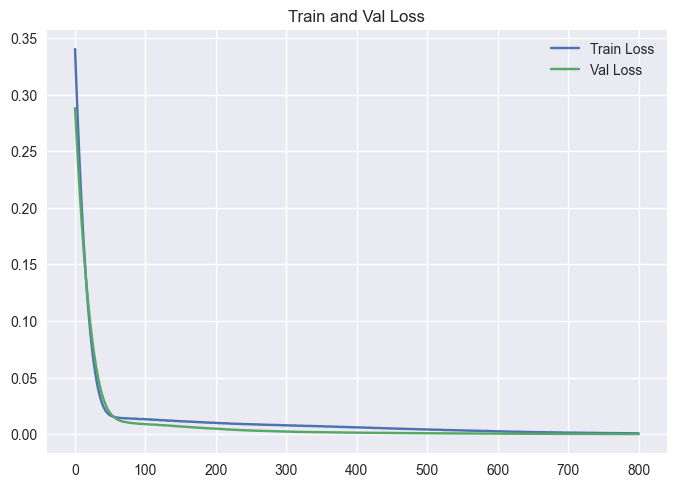

Training iteration: 14/50
Epoch 1/1000
8/8 [==============================] - 1s 38ms/step - loss: 0.1934 - accuracy: 4.5537e-04 - val_loss: 0.1143 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1930 - accuracy: 0.0013 - val_loss: 0.1141 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1914 - accuracy: 7.0339e-04 - val_loss: 0.1136 - val_accuracy: 0.0000e+00
Epoch 4/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1846 - accuracy: 9.9274e-04 - val_loss: 0.1129 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.1893 - accuracy: 4.5537e-04 - val_loss: 0.1114 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.1862 - accuracy: 9.9274e-04 - val_loss: 0.1087 - val_accuracy: 0.0000e+00
Epoch 7/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1899 - accurac

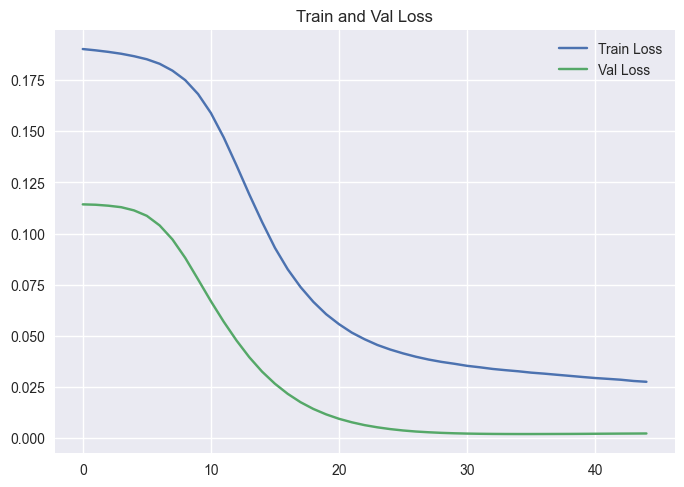

Training iteration: 15/50
Epoch 1/1000
8/8 [==============================] - 1s 28ms/step - loss: 0.1398 - accuracy: 0.0000e+00 - val_loss: 0.0031 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.1223 - accuracy: 0.0000e+00 - val_loss: 0.0028 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1115 - accuracy: 0.0000e+00 - val_loss: 0.0026 - val_accuracy: 0.0000e+00
Epoch 4/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.1077 - accuracy: 0.0000e+00 - val_loss: 0.0027 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.1132 - accuracy: 0.0000e+00 - val_loss: 0.0030 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1044 - accuracy: 0.0000e+00 - val_loss: 0.0035 - val_accuracy: 0.0000e+00
Epoch 7/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0913 - accu

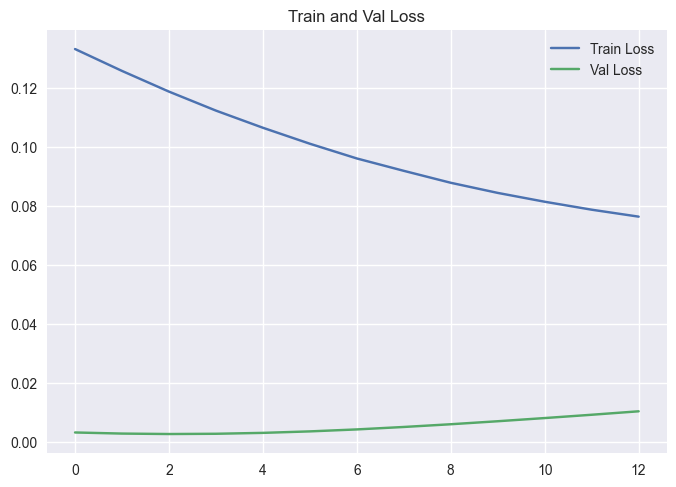

Training iteration: 16/50
Epoch 1/1000
8/8 [==============================] - 1s 30ms/step - loss: 0.1930 - accuracy: 0.0050 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.1894 - accuracy: 9.9274e-04 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1922 - accuracy: 0.0024 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 4/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1938 - accuracy: 7.0339e-04 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1876 - accuracy: 0.0013 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1920 - accuracy: 4.5537e-04 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 7/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1979 - accuracy: 0.0024

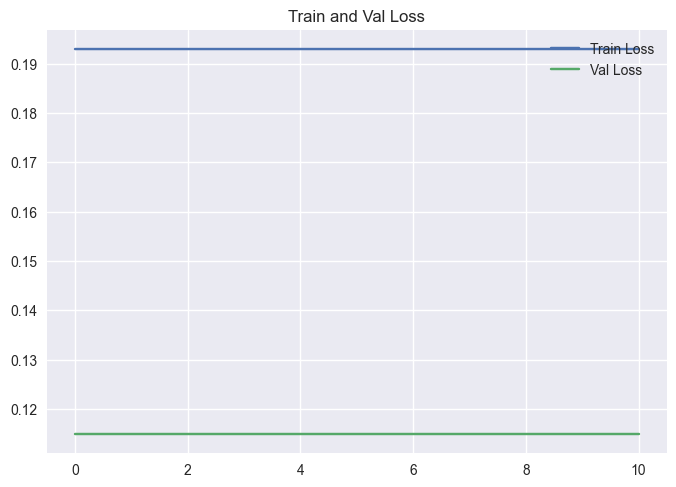

Training iteration: 17/50
Epoch 1/1000
8/8 [==============================] - 1s 37ms/step - loss: 0.0387 - accuracy: 0.0000e+00 - val_loss: 0.0048 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0422 - accuracy: 0.0000e+00 - val_loss: 0.0040 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0352 - accuracy: 0.0000e+00 - val_loss: 0.0034 - val_accuracy: 0.0000e+00
Epoch 4/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0334 - accuracy: 0.0000e+00 - val_loss: 0.0030 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0315 - accuracy: 0.0000e+00 - val_loss: 0.0027 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0327 - accuracy: 0.0000e+00 - val_loss: 0.0025 - val_accuracy: 0.0000e+00
Epoch 7/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0304 - accu

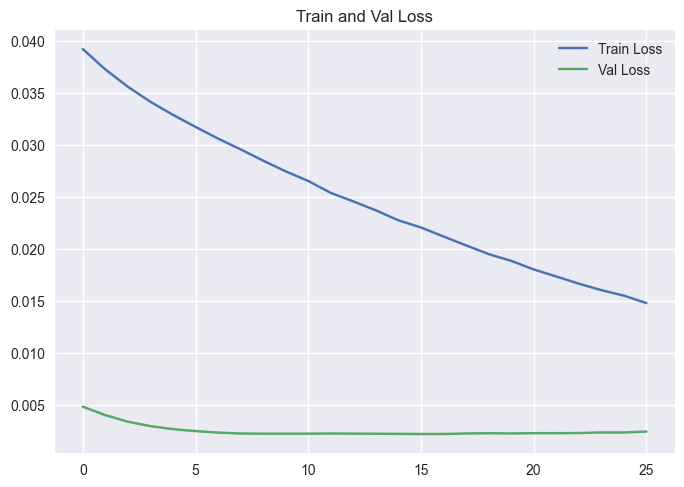

Training iteration: 18/50
Epoch 1/1000
8/8 [==============================] - 1s 33ms/step - loss: 0.1573 - accuracy: 0.0000e+00 - val_loss: 0.1134 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.1557 - accuracy: 0.0000e+00 - val_loss: 0.1130 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1441 - accuracy: 0.0000e+00 - val_loss: 0.1124 - val_accuracy: 0.0000e+00
Epoch 4/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1384 - accuracy: 0.0000e+00 - val_loss: 0.1117 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1317 - accuracy: 0.0000e+00 - val_loss: 0.1106 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.1258 - accuracy: 0.0000e+00 - val_loss: 0.1088 - val_accuracy: 0.0000e+00
Epoch 7/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.1190 - accu

Epoch 56/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0232 - accuracy: 0.0000e+00 - val_loss: 0.0135 - val_accuracy: 0.0000e+00
Epoch 57/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0257 - accuracy: 0.0000e+00 - val_loss: 0.0132 - val_accuracy: 0.0000e+00
Epoch 58/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0242 - accuracy: 0.0000e+00 - val_loss: 0.0130 - val_accuracy: 0.0000e+00
Epoch 59/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0239 - accuracy: 0.0000e+00 - val_loss: 0.0127 - val_accuracy: 0.0000e+00
Epoch 60/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0234 - accuracy: 0.0000e+00 - val_loss: 0.0124 - val_accuracy: 0.0000e+00
Epoch 61/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0253 - accuracy: 0.0000e+00 - val_loss: 0.0122 - val_accuracy: 0.0000e+00
Epoch 62/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0228 - accuracy: 0.0000e+00 - v

8/8 [==============================] - 0s 8ms/step - loss: 0.0100 - accuracy: 7.0339e-04 - val_loss: 0.0034 - val_accuracy: 0.0000e+00
Epoch 112/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0102 - accuracy: 4.5537e-04 - val_loss: 0.0033 - val_accuracy: 0.0000e+00
Epoch 113/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0092 - accuracy: 0.0018 - val_loss: 0.0032 - val_accuracy: 0.0000e+00
Epoch 114/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0099 - accuracy: 0.0024 - val_loss: 0.0031 - val_accuracy: 0.0000e+00
Epoch 115/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0097 - accuracy: 0.0024 - val_loss: 0.0030 - val_accuracy: 0.0000e+00
Epoch 116/1000
8/8 [==============================] - 0s 12ms/step - loss: 0.0094 - accuracy: 0.0024 - val_loss: 0.0029 - val_accuracy: 0.0000e+00
Epoch 117/1000
8/8 [==============================] - 0s 11ms/step - loss: 0.0099 - accuracy: 0.0024 - val_loss: 0.0029 - val_accu

Epoch 167/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0064 - accuracy: 0.0024 - val_loss: 0.0016 - val_accuracy: 0.0000e+00
Epoch 168/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0062 - accuracy: 9.9274e-04 - val_loss: 0.0016 - val_accuracy: 0.0000e+00
Epoch 169/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0059 - accuracy: 0.0018 - val_loss: 0.0016 - val_accuracy: 0.0000e+00
Epoch 170/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0059 - accuracy: 7.0339e-04 - val_loss: 0.0017 - val_accuracy: 0.0000e+00
Epoch 171/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0061 - accuracy: 0.0032 - val_loss: 0.0016 - val_accuracy: 0.0000e+00
Epoch 172/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0058 - accuracy: 0.0013 - val_loss: 0.0016 - val_accuracy: 0.0000e+00
Epoch 173/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0062 - accuracy: 0.0050 - val_loss: 0.00

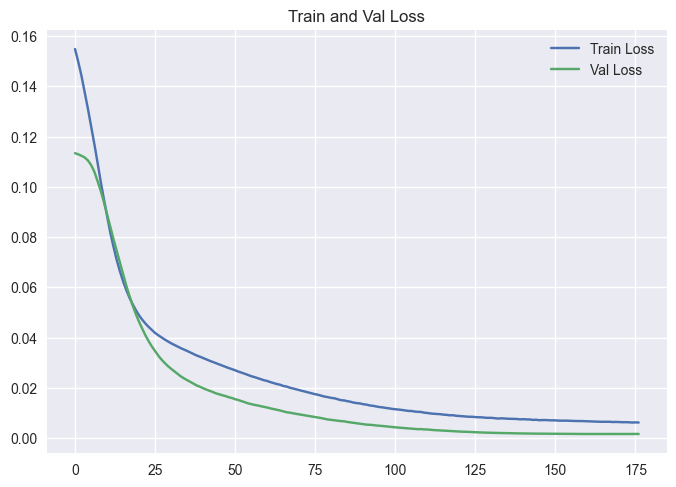

Training iteration: 19/50
Epoch 1/1000
8/8 [==============================] - 1s 28ms/step - loss: 0.0965 - accuracy: 0.0018 - val_loss: 0.0380 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0897 - accuracy: 0.0032 - val_loss: 0.0339 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0793 - accuracy: 0.0013 - val_loss: 0.0302 - val_accuracy: 0.0000e+00
Epoch 4/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0725 - accuracy: 9.9274e-04 - val_loss: 0.0267 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0664 - accuracy: 4.5537e-04 - val_loss: 0.0235 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0595 - accuracy: 0.0024 - val_loss: 0.0205 - val_accuracy: 0.0000e+00
Epoch 7/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0550 - accuracy: 7.0339e-04

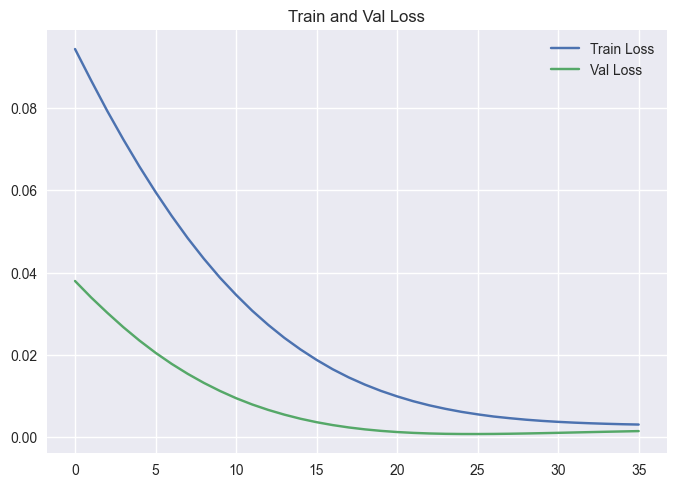

Training iteration: 20/50
Epoch 1/1000
8/8 [==============================] - 1s 30ms/step - loss: 0.1679 - accuracy: 4.5537e-04 - val_loss: 0.0901 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.1654 - accuracy: 4.5537e-04 - val_loss: 0.0845 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.1551 - accuracy: 0.0018 - val_loss: 0.0788 - val_accuracy: 0.0000e+00
Epoch 4/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.1473 - accuracy: 4.5537e-04 - val_loss: 0.0729 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1384 - accuracy: 0.0013 - val_loss: 0.0670 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.1380 - accuracy: 0.0013 - val_loss: 0.0611 - val_accuracy: 0.0000e+00
Epoch 7/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.1202 - accuracy: 7.0339

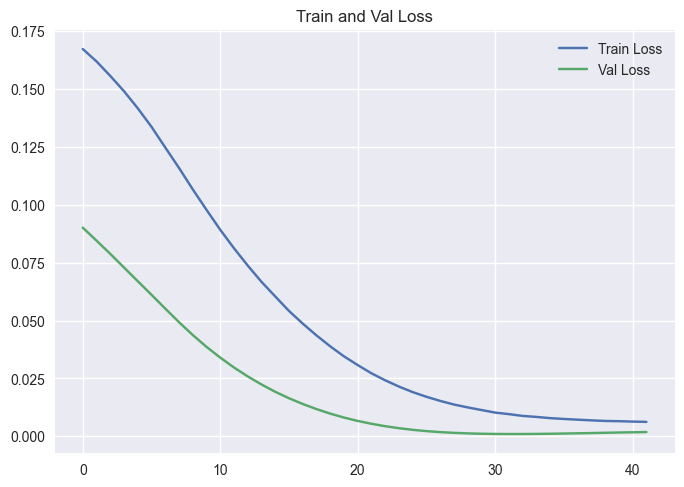

Training iteration: 21/50
Epoch 1/1000
8/8 [==============================] - 1s 41ms/step - loss: 0.0271 - accuracy: 0.0024 - val_loss: 0.0013 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0229 - accuracy: 0.0024 - val_loss: 0.0018 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0205 - accuracy: 9.9274e-04 - val_loss: 0.0025 - val_accuracy: 0.0000e+00
Epoch 4/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0170 - accuracy: 0.0018 - val_loss: 0.0034 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0140 - accuracy: 0.0050 - val_loss: 0.0044 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0128 - accuracy: 0.0032 - val_loss: 0.0054 - val_accuracy: 0.0000e+00
Epoch 7/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0117 - accuracy: 0.0018 - val_l

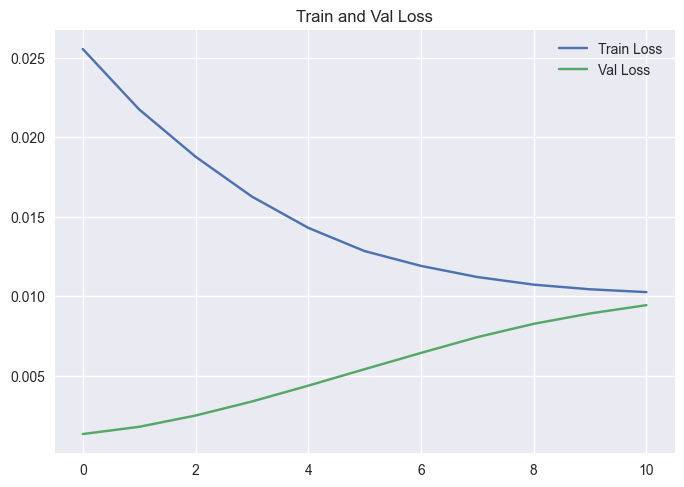

Training iteration: 22/50
Epoch 1/1000
8/8 [==============================] - 1s 31ms/step - loss: 0.0280 - accuracy: 0.0050 - val_loss: 0.0325 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0241 - accuracy: 7.0339e-04 - val_loss: 0.0289 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0198 - accuracy: 7.0339e-04 - val_loss: 0.0257 - val_accuracy: 0.0000e+00
Epoch 4/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0175 - accuracy: 0.0050 - val_loss: 0.0227 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0151 - accuracy: 0.0013 - val_loss: 0.0200 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0134 - accuracy: 0.0032 - val_loss: 0.0175 - val_accuracy: 0.0000e+00
Epoch 7/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0113 - accuracy: 7.0339e-04

Epoch 57/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0021 - accuracy: 9.9274e-04 - val_loss: 9.1380e-04 - val_accuracy: 0.0000e+00
Epoch 58/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0022 - accuracy: 7.0339e-04 - val_loss: 8.6730e-04 - val_accuracy: 0.0000e+00
Epoch 59/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0021 - accuracy: 0.0018 - val_loss: 8.2128e-04 - val_accuracy: 0.0000e+00
Epoch 60/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0019 - accuracy: 0.0032 - val_loss: 7.8583e-04 - val_accuracy: 0.0000e+00
Epoch 61/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0018 - accuracy: 0.0032 - val_loss: 7.4297e-04 - val_accuracy: 0.0000e+00
Epoch 62/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0021 - accuracy: 0.0050 - val_loss: 7.0915e-04 - val_accuracy: 0.0000e+00
Epoch 63/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0020 - accuracy: 9.9274

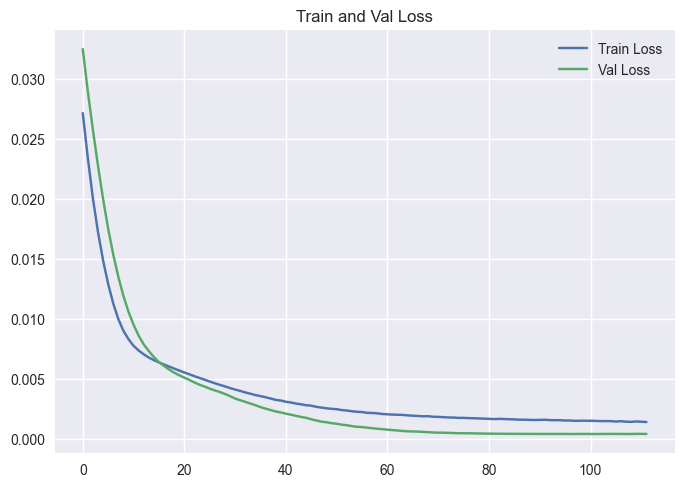

Training iteration: 23/50
Epoch 1/1000
8/8 [==============================] - 1s 31ms/step - loss: 0.0328 - accuracy: 9.9274e-04 - val_loss: 0.0014 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.0290 - accuracy: 0.0018 - val_loss: 0.0013 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0249 - accuracy: 0.0013 - val_loss: 0.0014 - val_accuracy: 0.0000e+00
Epoch 4/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0220 - accuracy: 4.5537e-04 - val_loss: 0.0017 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0193 - accuracy: 0.0050 - val_loss: 0.0022 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0178 - accuracy: 0.0024 - val_loss: 0.0029 - val_accuracy: 0.0000e+00
Epoch 7/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0160 - accuracy: 0.0024 - 

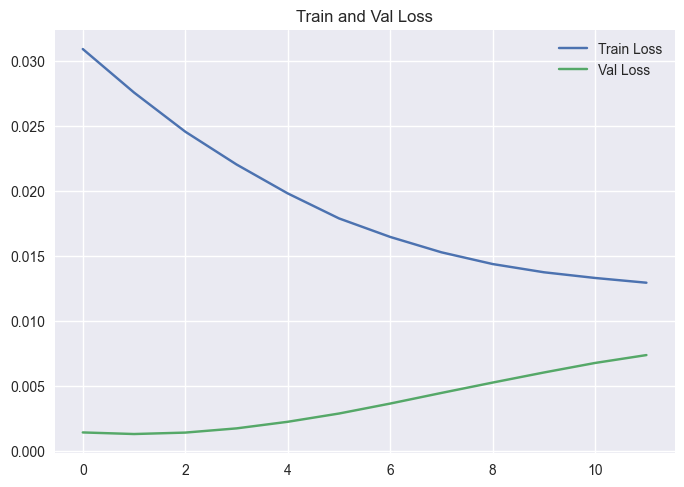

Training iteration: 24/50
Epoch 1/1000
8/8 [==============================] - 1s 29ms/step - loss: 0.1852 - accuracy: 9.9274e-04 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1793 - accuracy: 4.5537e-04 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.1868 - accuracy: 0.0050 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 4/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.1768 - accuracy: 0.0018 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.1838 - accuracy: 4.5537e-04 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.1755 - accuracy: 9.9274e-04 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 7/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.1674 - accuracy: 9.

8/8 [==============================] - 0s 8ms/step - loss: 0.0080 - accuracy: 0.0018 - val_loss: 0.0018 - val_accuracy: 0.0000e+00
Epoch 113/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0085 - accuracy: 0.0050 - val_loss: 0.0018 - val_accuracy: 0.0000e+00
Epoch 114/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0096 - accuracy: 0.0050 - val_loss: 0.0017 - val_accuracy: 0.0000e+00
Epoch 115/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0074 - accuracy: 7.0339e-04 - val_loss: 0.0016 - val_accuracy: 0.0000e+00
Epoch 116/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0075 - accuracy: 7.0339e-04 - val_loss: 0.0016 - val_accuracy: 0.0000e+00
Epoch 117/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0081 - accuracy: 0.0024 - val_loss: 0.0015 - val_accuracy: 0.0000e+00
Epoch 118/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0074 - accuracy: 0.0032 - val_loss: 0.0015 - val_accura

Epoch 167/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0046 - accuracy: 0.0050 - val_loss: 7.4506e-04 - val_accuracy: 0.0000e+00
Epoch 168/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0044 - accuracy: 0.0018 - val_loss: 7.4744e-04 - val_accuracy: 0.0000e+00
Epoch 169/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0044 - accuracy: 0.0050 - val_loss: 7.4639e-04 - val_accuracy: 0.0000e+00
Epoch 170/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0049 - accuracy: 4.5537e-04 - val_loss: 7.4699e-04 - val_accuracy: 0.0000e+00
Epoch 171/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0050 - accuracy: 0.0024 - val_loss: 7.4737e-04 - val_accuracy: 0.0000e+00
Epoch 172/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0045 - accuracy: 9.9274e-04 - val_loss: 7.4749e-04 - val_accuracy: 0.0000e+00
Epoch 173/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0044 - accuracy:

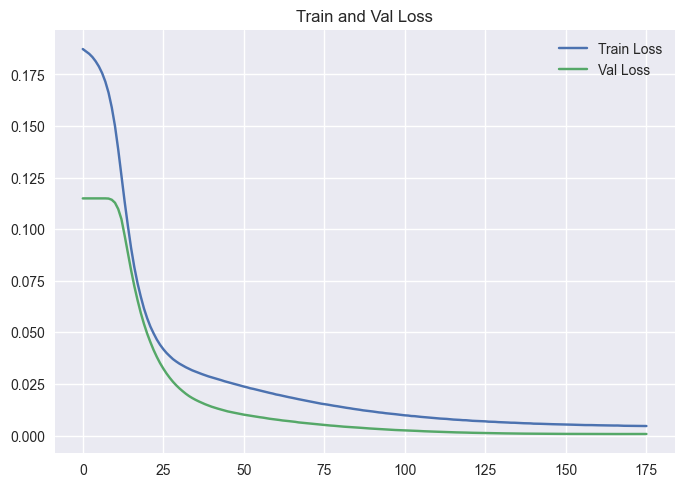

Training iteration: 25/50
Epoch 1/1000
8/8 [==============================] - 1s 29ms/step - loss: 0.0363 - accuracy: 4.5537e-04 - val_loss: 0.0202 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0354 - accuracy: 0.0013 - val_loss: 0.0175 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0333 - accuracy: 0.0050 - val_loss: 0.0151 - val_accuracy: 0.0000e+00
Epoch 4/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0281 - accuracy: 0.0050 - val_loss: 0.0130 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0253 - accuracy: 0.0024 - val_loss: 0.0112 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0239 - accuracy: 0.0013 - val_loss: 0.0097 - val_accuracy: 0.0000e+00
Epoch 7/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0226 - accuracy: 9.9274e-04 - v

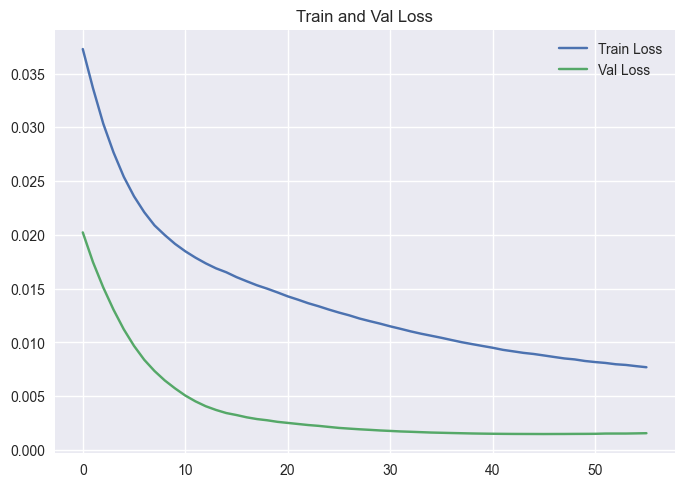

Training iteration: 26/50
Epoch 1/1000
8/8 [==============================] - 1s 29ms/step - loss: 0.0301 - accuracy: 0.0050 - val_loss: 0.0043 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0285 - accuracy: 9.9274e-04 - val_loss: 0.0032 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0301 - accuracy: 7.0339e-04 - val_loss: 0.0024 - val_accuracy: 0.0000e+00
Epoch 4/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0213 - accuracy: 9.9274e-04 - val_loss: 0.0019 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0214 - accuracy: 0.0018 - val_loss: 0.0016 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0178 - accuracy: 0.0013 - val_loss: 0.0015 - val_accuracy: 0.0000e+00
Epoch 7/1000
8/8 [==============================] - 0s 11ms/step - loss: 0.0162 - accuracy: 0.003

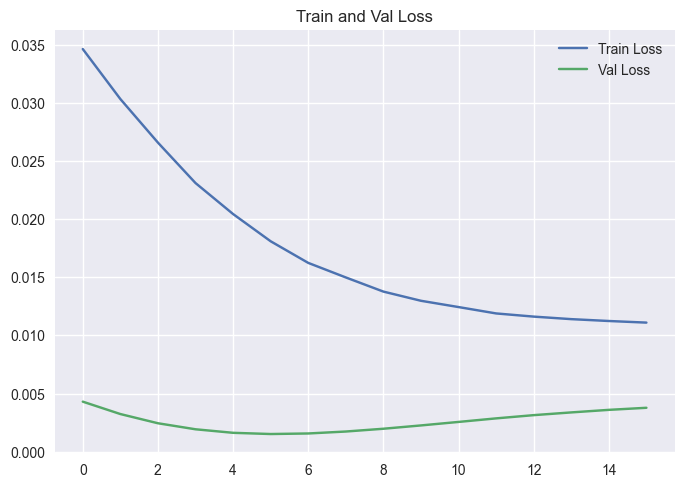

Training iteration: 27/50
Epoch 1/1000
8/8 [==============================] - 1s 39ms/step - loss: 0.1897 - accuracy: 0.0032 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.1950 - accuracy: 0.0024 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1902 - accuracy: 0.0018 - val_loss: 0.1149 - val_accuracy: 0.0000e+00
Epoch 4/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.1894 - accuracy: 7.0339e-04 - val_loss: 0.1147 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.1854 - accuracy: 0.0024 - val_loss: 0.1141 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1771 - accuracy: 0.0018 - val_loss: 0.1127 - val_accuracy: 0.0000e+00
Epoch 7/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1697 - accuracy: 4.5537e-04 - 

Epoch 57/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.0110 - accuracy: 7.0339e-04 - val_loss: 0.0033 - val_accuracy: 0.0000e+00
Epoch 58/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.0102 - accuracy: 0.0024 - val_loss: 0.0033 - val_accuracy: 0.0000e+00
Epoch 59/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0096 - accuracy: 4.5537e-04 - val_loss: 0.0033 - val_accuracy: 0.0000e+00
Epoch 60/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0106 - accuracy: 7.0339e-04 - val_loss: 0.0032 - val_accuracy: 0.0000e+00
Epoch 61/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.0098 - accuracy: 0.0024 - val_loss: 0.0032 - val_accuracy: 0.0000e+00
Epoch 62/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0106 - accuracy: 0.0024 - val_loss: 0.0032 - val_accuracy: 0.0000e+00
Epoch 63/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0103 - accuracy: 0.0013 - val_loss: 0.00

Epoch 113/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0086 - accuracy: 0.0024 - val_loss: 0.0025 - val_accuracy: 0.0000e+00
Epoch 114/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0080 - accuracy: 7.0339e-04 - val_loss: 0.0025 - val_accuracy: 0.0000e+00
Epoch 115/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0080 - accuracy: 0.0018 - val_loss: 0.0025 - val_accuracy: 0.0000e+00
Epoch 116/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0075 - accuracy: 7.0339e-04 - val_loss: 0.0025 - val_accuracy: 0.0000e+00
Epoch 117/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0088 - accuracy: 0.0032 - val_loss: 0.0025 - val_accuracy: 0.0000e+00
Epoch 118/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0078 - accuracy: 0.0032 - val_loss: 0.0025 - val_accuracy: 0.0000e+00
Epoch 119/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0079 - accuracy: 9.9274e-04 - val_loss: 

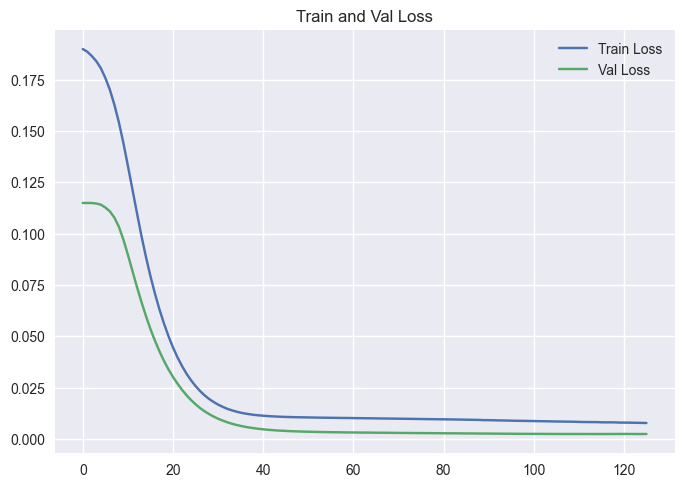

Training iteration: 28/50
Epoch 1/1000
8/8 [==============================] - 1s 35ms/step - loss: 0.1941 - accuracy: 0.0024 - val_loss: 0.1144 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1939 - accuracy: 0.0024 - val_loss: 0.1139 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.1909 - accuracy: 0.0024 - val_loss: 0.1130 - val_accuracy: 0.0000e+00
Epoch 4/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1945 - accuracy: 0.0013 - val_loss: 0.1119 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.1861 - accuracy: 0.0024 - val_loss: 0.1099 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1834 - accuracy: 0.0018 - val_loss: 0.1064 - val_accuracy: 0.0000e+00
Epoch 7/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1907 - accuracy: 9.9274e-04 - val_

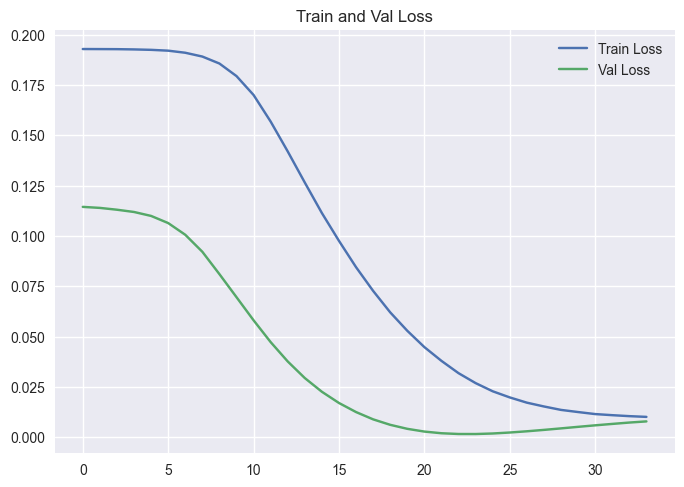

Training iteration: 29/50
Epoch 1/1000
8/8 [==============================] - 1s 41ms/step - loss: 0.0430 - accuracy: 0.0000e+00 - val_loss: 0.0043 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0421 - accuracy: 0.0000e+00 - val_loss: 0.0046 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.0400 - accuracy: 0.0000e+00 - val_loss: 0.0051 - val_accuracy: 0.0000e+00
Epoch 4/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0373 - accuracy: 0.0032 - val_loss: 0.0060 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.0321 - accuracy: 0.0050 - val_loss: 0.0072 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0265 - accuracy: 0.0050 - val_loss: 0.0087 - val_accuracy: 0.0000e+00
Epoch 7/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0272 - accuracy: 9.92

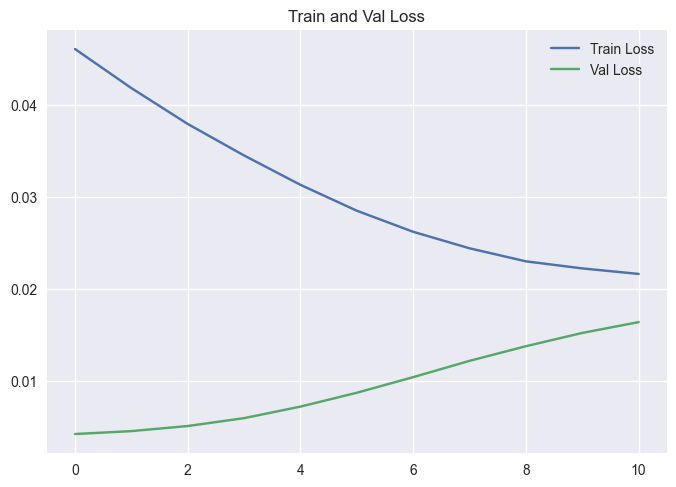

Training iteration: 30/50
Epoch 1/1000
8/8 [==============================] - 1s 36ms/step - loss: 0.1972 - accuracy: 7.0339e-04 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.1935 - accuracy: 0.0032 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1932 - accuracy: 0.0024 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 4/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1879 - accuracy: 0.0013 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1898 - accuracy: 0.0024 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1907 - accuracy: 0.0018 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 7/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1951 - accuracy: 0.0050 - val_l

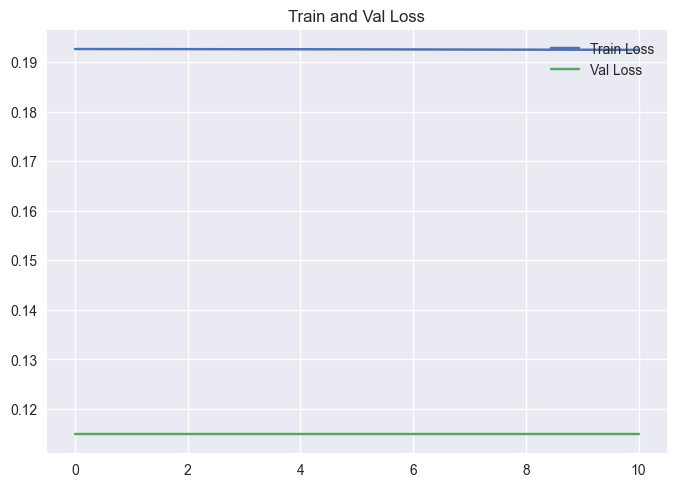

Training iteration: 31/50
Epoch 1/1000
8/8 [==============================] - 1s 29ms/step - loss: 0.0202 - accuracy: 4.5537e-04 - val_loss: 0.0064 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0157 - accuracy: 9.9274e-04 - val_loss: 0.0050 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0139 - accuracy: 7.0339e-04 - val_loss: 0.0039 - val_accuracy: 0.0000e+00
Epoch 4/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0122 - accuracy: 0.0032 - val_loss: 0.0031 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0104 - accuracy: 0.0013 - val_loss: 0.0026 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0097 - accuracy: 0.0018 - val_loss: 0.0023 - val_accuracy: 0.0000e+00
Epoch 7/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0089 - accuracy: 9.9274

Epoch 57/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0073 - accuracy: 0.0018 - val_loss: 0.0017 - val_accuracy: 0.0000e+00
Epoch 58/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0071 - accuracy: 0.0032 - val_loss: 0.0017 - val_accuracy: 0.0000e+00
Epoch 59/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0077 - accuracy: 0.0032 - val_loss: 0.0016 - val_accuracy: 0.0000e+00
Epoch 60/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0075 - accuracy: 0.0024 - val_loss: 0.0016 - val_accuracy: 0.0000e+00
Epoch 61/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0076 - accuracy: 0.0018 - val_loss: 0.0016 - val_accuracy: 0.0000e+00
Epoch 62/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0073 - accuracy: 9.9274e-04 - val_loss: 0.0016 - val_accuracy: 0.0000e+00
Epoch 63/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0065 - accuracy: 0.0018 - val_loss: 0.0016 - val_ac

Epoch 113/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0058 - accuracy: 0.0018 - val_loss: 0.0013 - val_accuracy: 0.0000e+00
Epoch 114/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0060 - accuracy: 7.0339e-04 - val_loss: 0.0013 - val_accuracy: 0.0000e+00
Epoch 115/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0058 - accuracy: 0.0032 - val_loss: 0.0013 - val_accuracy: 0.0000e+00
Epoch 116/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0055 - accuracy: 9.9274e-04 - val_loss: 0.0013 - val_accuracy: 0.0000e+00
Epoch 117/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0062 - accuracy: 0.0013 - val_loss: 0.0013 - val_accuracy: 0.0000e+00
Epoch 118/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0056 - accuracy: 7.0339e-04 - val_loss: 0.0013 - val_accuracy: 0.0000e+00
Epoch 119/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0061 - accuracy: 0.0013 - val_loss: 

8/8 [==============================] - 0s 7ms/step - loss: 0.0035 - accuracy: 9.9274e-04 - val_loss: 8.0036e-04 - val_accuracy: 0.0000e+00
Epoch 223/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0032 - accuracy: 0.0018 - val_loss: 7.8800e-04 - val_accuracy: 0.0000e+00
Epoch 224/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0033 - accuracy: 4.5537e-04 - val_loss: 7.8002e-04 - val_accuracy: 0.0000e+00
Epoch 225/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0032 - accuracy: 0.0032 - val_loss: 7.7155e-04 - val_accuracy: 0.0000e+00
Epoch 226/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0031 - accuracy: 7.0339e-04 - val_loss: 7.7366e-04 - val_accuracy: 0.0000e+00
Epoch 227/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0033 - accuracy: 0.0013 - val_loss: 7.7446e-04 - val_accuracy: 0.0000e+00
Epoch 228/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.0032 - accuracy: 0.0013 - 

8/8 [==============================] - 0s 8ms/step - loss: 0.0017 - accuracy: 4.5537e-04 - val_loss: 4.2646e-04 - val_accuracy: 0.0000e+00
Epoch 331/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0017 - accuracy: 0.0018 - val_loss: 4.2701e-04 - val_accuracy: 0.0000e+00
Epoch 332/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0017 - accuracy: 9.9274e-04 - val_loss: 4.2217e-04 - val_accuracy: 0.0000e+00
Epoch 333/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0015 - accuracy: 0.0024 - val_loss: 4.1465e-04 - val_accuracy: 0.0000e+00
Epoch 334/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0016 - accuracy: 7.0339e-04 - val_loss: 4.2310e-04 - val_accuracy: 0.0000e+00
Epoch 335/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0016 - accuracy: 0.0032 - val_loss: 4.2166e-04 - val_accuracy: 0.0000e+00
Epoch 336/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0016 - accuracy: 9.9274e-04

8/8 [==============================] - 0s 9ms/step - loss: 8.3827e-04 - accuracy: 0.0050 - val_loss: 2.4446e-04 - val_accuracy: 0.0000e+00
Epoch 438/1000
8/8 [==============================] - 0s 9ms/step - loss: 8.2849e-04 - accuracy: 7.0339e-04 - val_loss: 2.4719e-04 - val_accuracy: 0.0000e+00
Epoch 439/1000
8/8 [==============================] - 0s 8ms/step - loss: 8.0234e-04 - accuracy: 7.0339e-04 - val_loss: 2.3147e-04 - val_accuracy: 0.0000e+00
Epoch 440/1000
8/8 [==============================] - 0s 8ms/step - loss: 7.8576e-04 - accuracy: 0.0050 - val_loss: 2.4694e-04 - val_accuracy: 0.0000e+00
Epoch 441/1000
8/8 [==============================] - 0s 9ms/step - loss: 8.2789e-04 - accuracy: 0.0050 - val_loss: 2.3676e-04 - val_accuracy: 0.0000e+00
Epoch 442/1000
8/8 [==============================] - 0s 8ms/step - loss: 7.4479e-04 - accuracy: 0.0018 - val_loss: 2.3951e-04 - val_accuracy: 0.0000e+00
Epoch 443/1000
8/8 [==============================] - 0s 10ms/step - loss: 7.7832e-

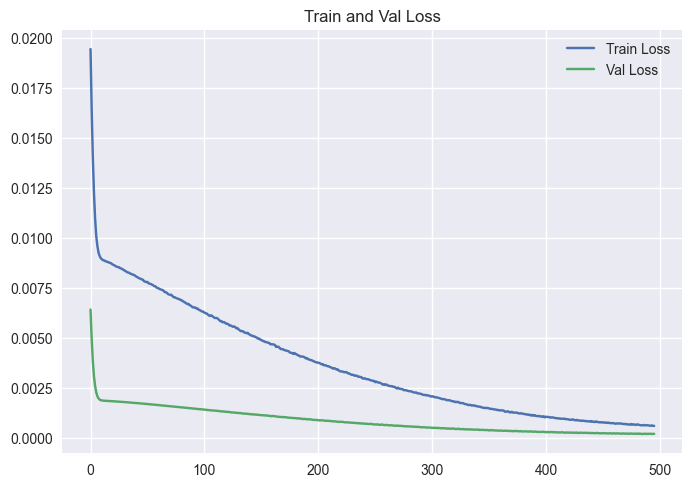

Training iteration: 32/50
Epoch 1/1000
8/8 [==============================] - 1s 43ms/step - loss: 0.1239 - accuracy: 7.0339e-04 - val_loss: 0.0534 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 13ms/step - loss: 0.1112 - accuracy: 9.9274e-04 - val_loss: 0.0485 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 11ms/step - loss: 0.1073 - accuracy: 0.0032 - val_loss: 0.0440 - val_accuracy: 0.0000e+00
Epoch 4/1000
8/8 [==============================] - 0s 12ms/step - loss: 0.0975 - accuracy: 0.0018 - val_loss: 0.0397 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 11ms/step - loss: 0.0886 - accuracy: 9.9274e-04 - val_loss: 0.0357 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 12ms/step - loss: 0.0786 - accuracy: 0.0013 - val_loss: 0.0320 - val_accuracy: 0.0000e+00
Epoch 7/1000
8/8 [==============================] - 0s 11ms/step - loss: 0.0747 - accuracy: 

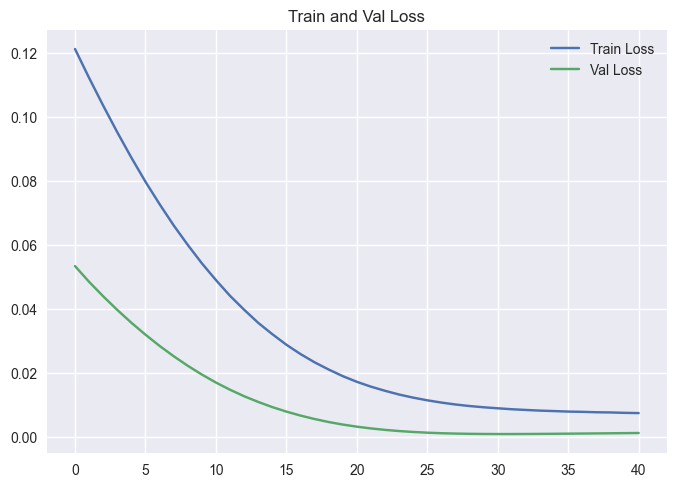

Training iteration: 33/50
Epoch 1/1000
8/8 [==============================] - 1s 46ms/step - loss: 0.0916 - accuracy: 0.0000e+00 - val_loss: 0.0374 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0915 - accuracy: 0.0000e+00 - val_loss: 0.0342 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0839 - accuracy: 0.0000e+00 - val_loss: 0.0310 - val_accuracy: 0.0000e+00
Epoch 4/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0760 - accuracy: 0.0000e+00 - val_loss: 0.0281 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0814 - accuracy: 0.0000e+00 - val_loss: 0.0257 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0841 - accuracy: 0.0000e+00 - val_loss: 0.0234 - val_accuracy: 0.0000e+00
Epoch 7/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0830 - accu

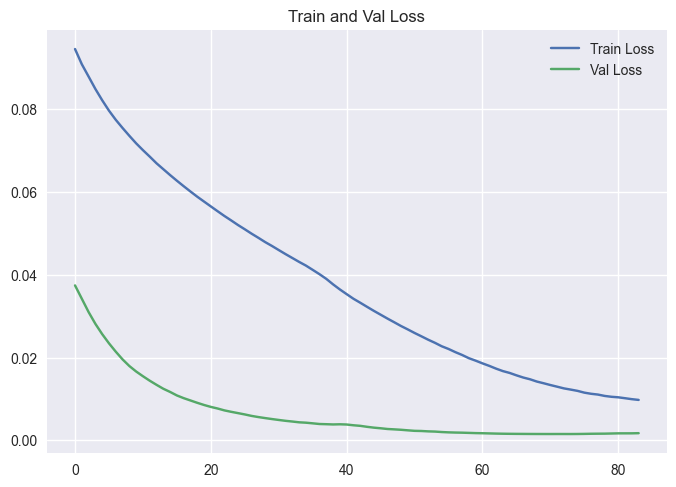

Training iteration: 34/50
Epoch 1/1000
8/8 [==============================] - 1s 27ms/step - loss: 0.1532 - accuracy: 0.0018 - val_loss: 0.1078 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.1497 - accuracy: 0.0018 - val_loss: 0.1051 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.1497 - accuracy: 9.9274e-04 - val_loss: 0.1022 - val_accuracy: 0.0000e+00
Epoch 4/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.1414 - accuracy: 0.0050 - val_loss: 0.0991 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1412 - accuracy: 4.5537e-04 - val_loss: 0.0954 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1315 - accuracy: 4.5537e-04 - val_loss: 0.0912 - val_accuracy: 0.0000e+00
Epoch 7/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.1275 - accuracy: 0.0050

Epoch 57/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0275 - accuracy: 4.5537e-04 - val_loss: 0.0034 - val_accuracy: 0.0000e+00
Epoch 58/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0271 - accuracy: 9.9274e-04 - val_loss: 0.0034 - val_accuracy: 0.0000e+00
Epoch 59/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0263 - accuracy: 0.0050 - val_loss: 0.0034 - val_accuracy: 0.0000e+00
Epoch 60/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0261 - accuracy: 0.0024 - val_loss: 0.0034 - val_accuracy: 0.0000e+00
Epoch 61/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0267 - accuracy: 0.0032 - val_loss: 0.0034 - val_accuracy: 0.0000e+00
Epoch 62/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0240 - accuracy: 4.5537e-04 - val_loss: 0.0034 - val_accuracy: 0.0000e+00
Epoch 63/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0252 - accuracy: 0.0018 - val_loss: 0.0033 

Epoch 113/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0197 - accuracy: 0.0018 - val_loss: 0.0026 - val_accuracy: 0.0000e+00
Epoch 114/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0190 - accuracy: 0.0032 - val_loss: 0.0026 - val_accuracy: 0.0000e+00
Epoch 115/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0185 - accuracy: 0.0032 - val_loss: 0.0025 - val_accuracy: 0.0000e+00
Epoch 116/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0187 - accuracy: 0.0050 - val_loss: 0.0025 - val_accuracy: 0.0000e+00
Epoch 117/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0174 - accuracy: 9.9274e-04 - val_loss: 0.0025 - val_accuracy: 0.0000e+00
Epoch 118/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0195 - accuracy: 0.0050 - val_loss: 0.0025 - val_accuracy: 0.0000e+00
Epoch 119/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0183 - accuracy: 0.0032 - val_loss: 0.0025 -

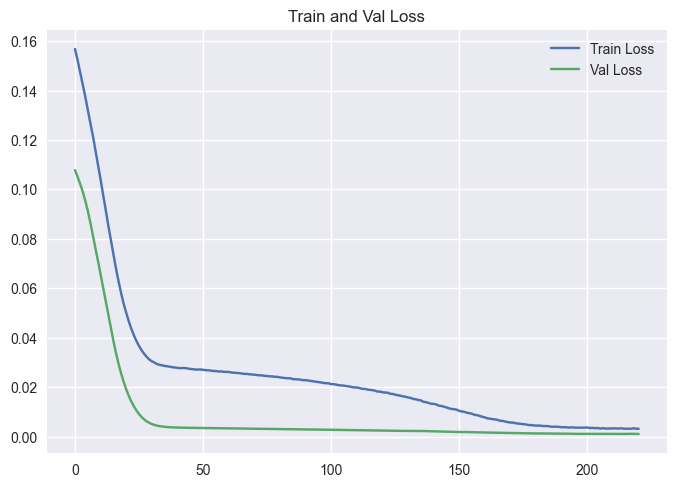

Training iteration: 35/50
Epoch 1/1000
8/8 [==============================] - 1s 32ms/step - loss: 0.2005 - accuracy: 0.0013 - val_loss: 0.1145 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1926 - accuracy: 4.5537e-04 - val_loss: 0.1140 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.1908 - accuracy: 0.0018 - val_loss: 0.1130 - val_accuracy: 0.0000e+00
Epoch 4/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1919 - accuracy: 4.5537e-04 - val_loss: 0.1113 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1811 - accuracy: 9.9274e-04 - val_loss: 0.1089 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1815 - accuracy: 0.0013 - val_loss: 0.1057 - val_accuracy: 0.0000e+00
Epoch 7/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1695 - accuracy: 0.0013

Epoch 57/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0257 - accuracy: 0.0032 - val_loss: 0.0022 - val_accuracy: 0.0000e+00
Epoch 58/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0243 - accuracy: 0.0032 - val_loss: 0.0022 - val_accuracy: 0.0000e+00
Epoch 59/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0227 - accuracy: 0.0018 - val_loss: 0.0022 - val_accuracy: 0.0000e+00
Epoch 60/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0250 - accuracy: 0.0013 - val_loss: 0.0022 - val_accuracy: 0.0000e+00
Epoch 61/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0243 - accuracy: 0.0018 - val_loss: 0.0022 - val_accuracy: 0.0000e+00
Epoch 62/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0221 - accuracy: 4.5537e-04 - val_loss: 0.0022 - val_accuracy: 0.0000e+00
Epoch 63/1000
8/8 [==============================] - 0s 11ms/step - loss: 0.0203 - accuracy: 7.0339e-04 - val_loss: 0.0022 - v

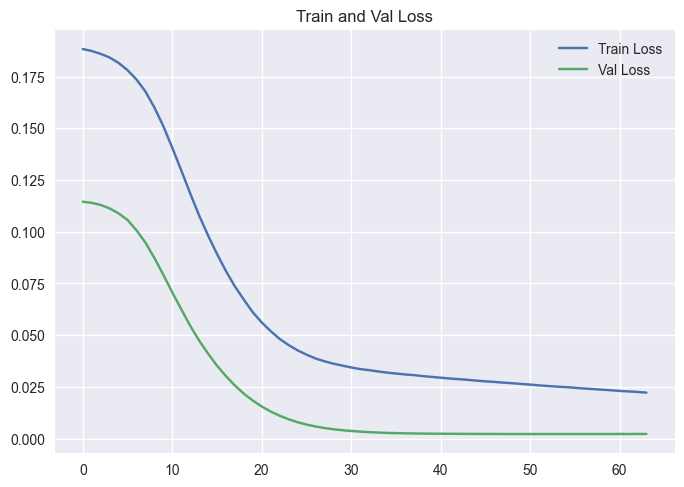

Training iteration: 36/50
Epoch 1/1000
8/8 [==============================] - 1s 47ms/step - loss: 0.0173 - accuracy: 9.9274e-04 - val_loss: 0.0017 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 12ms/step - loss: 0.0143 - accuracy: 0.0032 - val_loss: 0.0016 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 12ms/step - loss: 0.0120 - accuracy: 0.0024 - val_loss: 0.0016 - val_accuracy: 0.0000e+00
Epoch 4/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.0110 - accuracy: 0.0024 - val_loss: 0.0017 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.0094 - accuracy: 9.9274e-04 - val_loss: 0.0020 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0075 - accuracy: 0.0018 - val_loss: 0.0024 - val_accuracy: 0.0000e+00
Epoch 7/1000
8/8 [==============================] - 0s 11ms/step - loss: 0.0068 - accuracy: 0.003

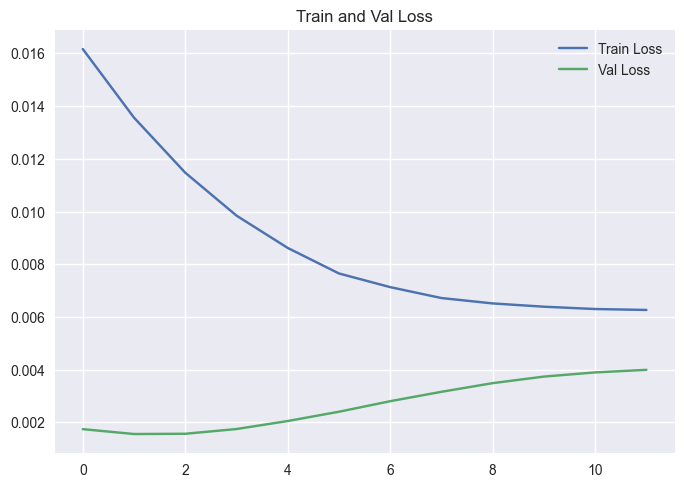

Training iteration: 37/50
Epoch 1/1000
8/8 [==============================] - 1s 33ms/step - loss: 0.1058 - accuracy: 0.0000e+00 - val_loss: 0.0062 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1012 - accuracy: 0.0000e+00 - val_loss: 0.0049 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0962 - accuracy: 0.0000e+00 - val_loss: 0.0039 - val_accuracy: 0.0000e+00
Epoch 4/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0862 - accuracy: 0.0000e+00 - val_loss: 0.0032 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0909 - accuracy: 0.0000e+00 - val_loss: 0.0027 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0710 - accuracy: 0.0000e+00 - val_loss: 0.0025 - val_accuracy: 0.0000e+00
Epoch 7/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0747 - accu

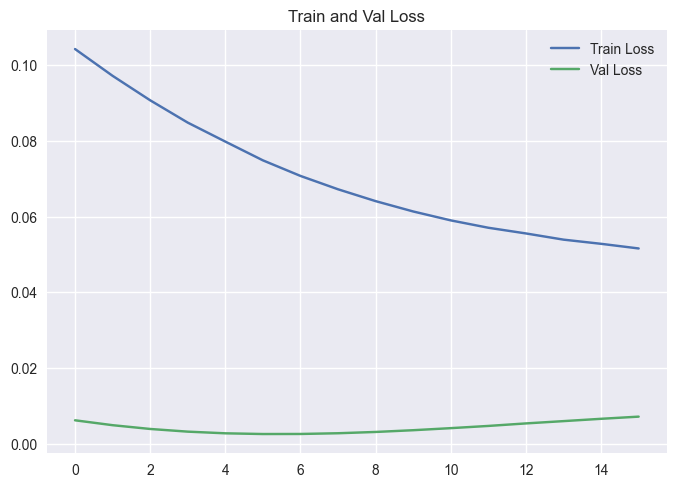

Training iteration: 38/50
Epoch 1/1000
8/8 [==============================] - 1s 29ms/step - loss: 0.0332 - accuracy: 0.0032 - val_loss: 0.0018 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.0293 - accuracy: 0.0024 - val_loss: 0.0022 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0280 - accuracy: 9.9274e-04 - val_loss: 0.0028 - val_accuracy: 0.0000e+00
Epoch 4/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0235 - accuracy: 7.0339e-04 - val_loss: 0.0036 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0221 - accuracy: 0.0024 - val_loss: 0.0045 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0210 - accuracy: 7.0339e-04 - val_loss: 0.0054 - val_accuracy: 0.0000e+00
Epoch 7/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0198 - accuracy: 4.553

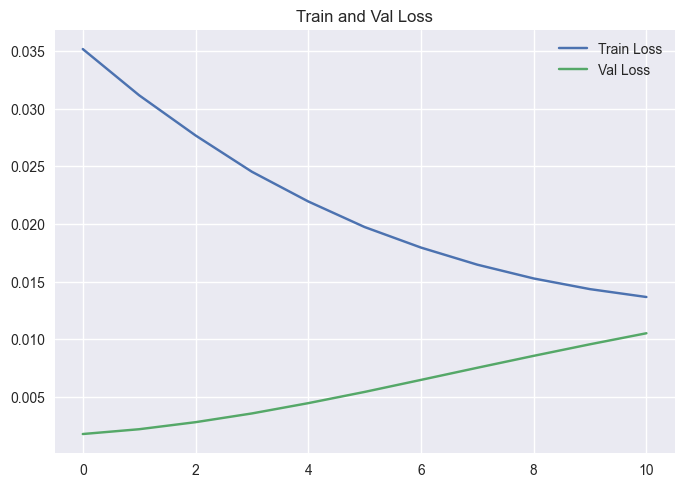

Training iteration: 39/50
Epoch 1/1000
8/8 [==============================] - 1s 29ms/step - loss: 0.1403 - accuracy: 0.0013 - val_loss: 0.0952 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1281 - accuracy: 0.0024 - val_loss: 0.0898 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1277 - accuracy: 0.0000e+00 - val_loss: 0.0842 - val_accuracy: 0.0000e+00
Epoch 4/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.1142 - accuracy: 0.0000e+00 - val_loss: 0.0783 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.1094 - accuracy: 0.0000e+00 - val_loss: 0.0724 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.1000 - accuracy: 0.0000e+00 - val_loss: 0.0665 - val_accuracy: 0.0000e+00
Epoch 7/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0919 - accuracy: 0.

Epoch 56/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0232 - accuracy: 0.0000e+00 - val_loss: 0.0039 - val_accuracy: 0.0000e+00
Epoch 57/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0207 - accuracy: 0.0000e+00 - val_loss: 0.0038 - val_accuracy: 0.0000e+00
Epoch 58/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0195 - accuracy: 0.0000e+00 - val_loss: 0.0037 - val_accuracy: 0.0000e+00
Epoch 59/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0195 - accuracy: 0.0000e+00 - val_loss: 0.0036 - val_accuracy: 0.0000e+00
Epoch 60/1000
8/8 [==============================] - 0s 11ms/step - loss: 0.0189 - accuracy: 0.0000e+00 - val_loss: 0.0035 - val_accuracy: 0.0000e+00
Epoch 61/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0195 - accuracy: 0.0000e+00 - val_loss: 0.0034 - val_accuracy: 0.0000e+00
Epoch 62/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0187 - accuracy: 0.0000e+00 - 

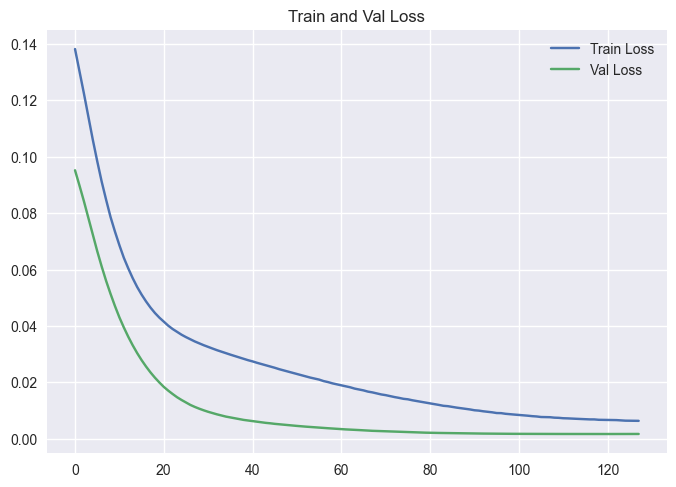

Training iteration: 40/50
Epoch 1/1000
8/8 [==============================] - 1s 45ms/step - loss: 0.1907 - accuracy: 0.0024 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 11ms/step - loss: 0.1915 - accuracy: 0.0018 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 11ms/step - loss: 0.1892 - accuracy: 9.9274e-04 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 4/1000
8/8 [==============================] - 0s 11ms/step - loss: 0.1993 - accuracy: 0.0024 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 14ms/step - loss: 0.1893 - accuracy: 0.0050 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 12ms/step - loss: 0.1917 - accuracy: 0.0018 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 7/1000
8/8 [==============================] - 0s 13ms/step - loss: 0.1924 - accuracy: 0.0032 -

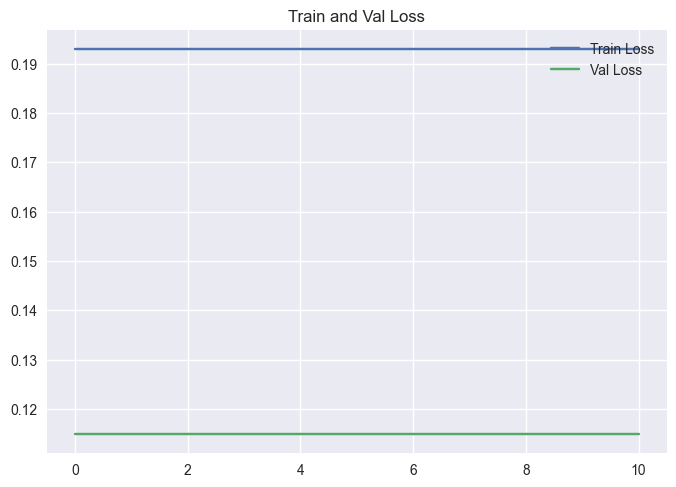

Training iteration: 41/50
Epoch 1/1000
8/8 [==============================] - 1s 39ms/step - loss: 0.1923 - accuracy: 0.0018 - val_loss: 0.1094 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.1889 - accuracy: 0.0050 - val_loss: 0.1066 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.1918 - accuracy: 4.5537e-04 - val_loss: 0.1026 - val_accuracy: 0.0000e+00
Epoch 4/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.1890 - accuracy: 0.0032 - val_loss: 0.0982 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 12ms/step - loss: 0.1923 - accuracy: 9.9274e-04 - val_loss: 0.0922 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 11ms/step - loss: 0.1754 - accuracy: 0.0018 - val_loss: 0.0849 - val_accuracy: 0.0000e+00
Epoch 7/1000
8/8 [==============================] - 0s 11ms/step - loss: 0.1731 - accuracy: 0.00

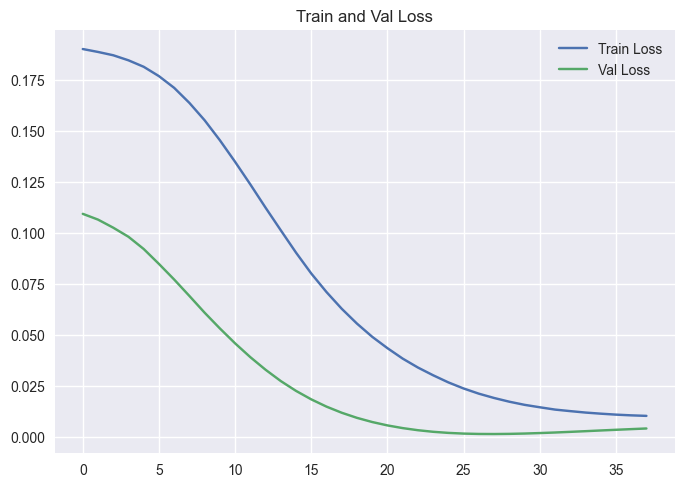

Training iteration: 42/50
Epoch 1/1000
8/8 [==============================] - 1s 27ms/step - loss: 0.0649 - accuracy: 0.0000e+00 - val_loss: 0.0291 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0665 - accuracy: 0.0000e+00 - val_loss: 0.0274 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0701 - accuracy: 0.0000e+00 - val_loss: 0.0261 - val_accuracy: 0.0000e+00
Epoch 4/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0615 - accuracy: 0.0000e+00 - val_loss: 0.0247 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0598 - accuracy: 0.0000e+00 - val_loss: 0.0233 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0597 - accuracy: 0.0000e+00 - val_loss: 0.0224 - val_accuracy: 0.0000e+00
Epoch 7/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0630 - accu

8/8 [==============================] - 0s 7ms/step - loss: 0.0209 - accuracy: 0.0013 - val_loss: 0.0078 - val_accuracy: 0.0000e+00
Epoch 57/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0199 - accuracy: 0.0018 - val_loss: 0.0078 - val_accuracy: 0.0000e+00
Epoch 58/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0199 - accuracy: 7.0339e-04 - val_loss: 0.0074 - val_accuracy: 0.0000e+00
Epoch 59/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0196 - accuracy: 9.9274e-04 - val_loss: 0.0072 - val_accuracy: 0.0000e+00
Epoch 60/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0190 - accuracy: 7.0339e-04 - val_loss: 0.0071 - val_accuracy: 0.0000e+00
Epoch 61/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0180 - accuracy: 0.0013 - val_loss: 0.0069 - val_accuracy: 0.0000e+00
Epoch 62/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0186 - accuracy: 0.0024 - val_loss: 0.0066 - val_accuracy

Epoch 112/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0086 - accuracy: 0.0050 - val_loss: 0.0016 - val_accuracy: 0.0000e+00
Epoch 113/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0079 - accuracy: 4.5537e-04 - val_loss: 0.0015 - val_accuracy: 0.0000e+00
Epoch 114/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0079 - accuracy: 4.5537e-04 - val_loss: 0.0015 - val_accuracy: 0.0000e+00
Epoch 115/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0074 - accuracy: 9.9274e-04 - val_loss: 0.0015 - val_accuracy: 0.0000e+00
Epoch 116/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0075 - accuracy: 0.0013 - val_loss: 0.0015 - val_accuracy: 0.0000e+00
Epoch 117/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0078 - accuracy: 0.0018 - val_loss: 0.0015 - val_accuracy: 0.0000e+00
Epoch 118/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0083 - accuracy: 0.0050 - val_loss: 

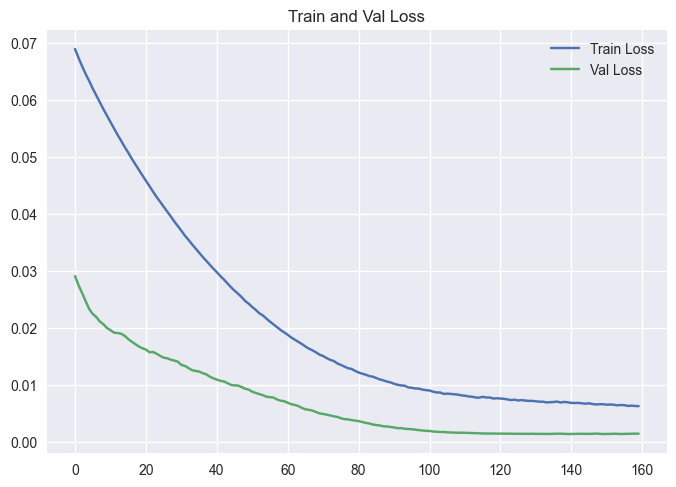

Training iteration: 43/50
Epoch 1/1000
8/8 [==============================] - 1s 30ms/step - loss: 0.0171 - accuracy: 9.9274e-04 - val_loss: 0.0011 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0139 - accuracy: 0.0024 - val_loss: 7.4875e-04 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0118 - accuracy: 4.5537e-04 - val_loss: 6.5883e-04 - val_accuracy: 0.0000e+00
Epoch 4/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0087 - accuracy: 0.0013 - val_loss: 7.8145e-04 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0078 - accuracy: 0.0018 - val_loss: 0.0011 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0070 - accuracy: 0.0018 - val_loss: 0.0014 - val_accuracy: 0.0000e+00
Epoch 7/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0060 - accuracy

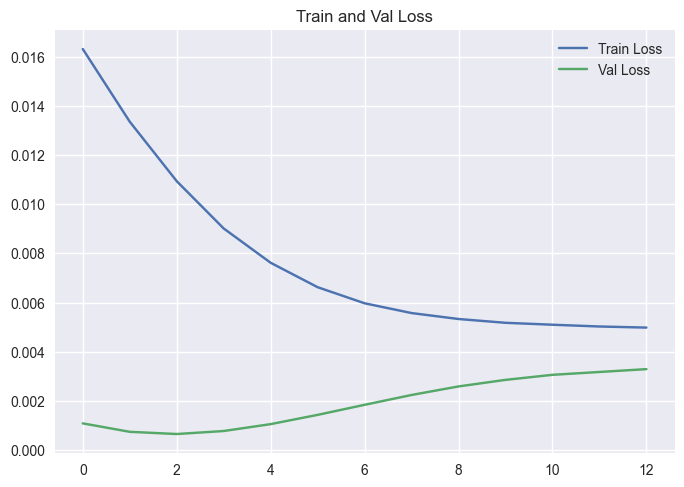

Training iteration: 44/50
Epoch 1/1000
8/8 [==============================] - 1s 30ms/step - loss: 0.0297 - accuracy: 4.5537e-04 - val_loss: 0.0121 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0244 - accuracy: 0.0024 - val_loss: 0.0099 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0213 - accuracy: 9.9274e-04 - val_loss: 0.0081 - val_accuracy: 0.0000e+00
Epoch 4/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0184 - accuracy: 7.0339e-04 - val_loss: 0.0067 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0173 - accuracy: 0.0013 - val_loss: 0.0055 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0152 - accuracy: 0.0013 - val_loss: 0.0046 - val_accuracy: 0.0000e+00
Epoch 7/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0143 - accuracy: 0.0050

Epoch 57/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0078 - accuracy: 9.9274e-04 - val_loss: 0.0020 - val_accuracy: 0.0000e+00
Epoch 58/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0078 - accuracy: 0.0050 - val_loss: 0.0020 - val_accuracy: 0.0000e+00
Epoch 59/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0082 - accuracy: 0.0013 - val_loss: 0.0020 - val_accuracy: 0.0000e+00
Epoch 60/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0077 - accuracy: 7.0339e-04 - val_loss: 0.0019 - val_accuracy: 0.0000e+00
Epoch 61/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0077 - accuracy: 0.0024 - val_loss: 0.0019 - val_accuracy: 0.0000e+00
Epoch 62/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0076 - accuracy: 0.0050 - val_loss: 0.0019 - val_accuracy: 0.0000e+00
Epoch 63/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0075 - accuracy: 7.0339e-04 - val_loss: 0.0019 

Epoch 113/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0062 - accuracy: 0.0013 - val_loss: 0.0015 - val_accuracy: 0.0000e+00
Epoch 114/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0057 - accuracy: 0.0032 - val_loss: 0.0015 - val_accuracy: 0.0000e+00
Epoch 115/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0054 - accuracy: 0.0050 - val_loss: 0.0015 - val_accuracy: 0.0000e+00
Epoch 116/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0055 - accuracy: 7.0339e-04 - val_loss: 0.0015 - val_accuracy: 0.0000e+00
Epoch 117/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0054 - accuracy: 4.5537e-04 - val_loss: 0.0015 - val_accuracy: 0.0000e+00
Epoch 118/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0060 - accuracy: 0.0024 - val_loss: 0.0014 - val_accuracy: 0.0000e+00
Epoch 119/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0054 - accuracy: 0.0013 - val_loss: 0.00

8/8 [==============================] - 0s 9ms/step - loss: 0.0026 - accuracy: 0.0024 - val_loss: 6.5826e-04 - val_accuracy: 0.0000e+00
Epoch 223/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.0028 - accuracy: 0.0018 - val_loss: 6.5542e-04 - val_accuracy: 0.0000e+00
Epoch 224/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0028 - accuracy: 0.0013 - val_loss: 6.4910e-04 - val_accuracy: 0.0000e+00
Epoch 225/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0028 - accuracy: 0.0018 - val_loss: 6.4379e-04 - val_accuracy: 0.0000e+00
Epoch 226/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0025 - accuracy: 9.9274e-04 - val_loss: 6.4113e-04 - val_accuracy: 0.0000e+00
Epoch 227/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0026 - accuracy: 7.0339e-04 - val_loss: 6.3685e-04 - val_accuracy: 0.0000e+00
Epoch 228/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0026 - accuracy: 0.0018 - val_

8/8 [==============================] - 0s 9ms/step - loss: 0.0013 - accuracy: 0.0032 - val_loss: 2.9284e-04 - val_accuracy: 0.0000e+00
Epoch 331/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0012 - accuracy: 7.0339e-04 - val_loss: 2.9380e-04 - val_accuracy: 0.0000e+00
Epoch 332/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0011 - accuracy: 0.0024 - val_loss: 2.9402e-04 - val_accuracy: 0.0000e+00
Epoch 333/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0012 - accuracy: 0.0032 - val_loss: 2.8998e-04 - val_accuracy: 0.0000e+00
Epoch 334/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0012 - accuracy: 9.9274e-04 - val_loss: 2.7444e-04 - val_accuracy: 0.0000e+00
Epoch 335/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.0013 - accuracy: 0.0050 - val_loss: 3.1003e-04 - val_accuracy: 0.0000e+00
Epoch 336/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0012 - accuracy: 0.0018 - val_

Epoch 436/1000
8/8 [==============================] - 0s 9ms/step - loss: 6.3680e-04 - accuracy: 0.0032 - val_loss: 1.6202e-04 - val_accuracy: 0.0000e+00
Epoch 437/1000
8/8 [==============================] - 0s 9ms/step - loss: 6.9648e-04 - accuracy: 9.9274e-04 - val_loss: 1.5532e-04 - val_accuracy: 0.0000e+00
Epoch 438/1000
8/8 [==============================] - 0s 9ms/step - loss: 6.2493e-04 - accuracy: 9.9274e-04 - val_loss: 1.6399e-04 - val_accuracy: 0.0000e+00
Epoch 439/1000
8/8 [==============================] - 0s 8ms/step - loss: 6.1880e-04 - accuracy: 0.0032 - val_loss: 1.4930e-04 - val_accuracy: 0.0000e+00
Epoch 440/1000
8/8 [==============================] - 0s 8ms/step - loss: 6.5661e-04 - accuracy: 0.0018 - val_loss: 1.5090e-04 - val_accuracy: 0.0000e+00
Epoch 441/1000
8/8 [==============================] - 0s 9ms/step - loss: 6.1014e-04 - accuracy: 7.0339e-04 - val_loss: 1.6735e-04 - val_accuracy: 0.0000e+00
Epoch 442/1000
8/8 [==============================] - 0s 8ms/ste

Epoch 489/1000
8/8 [==============================] - 0s 8ms/step - loss: 5.3181e-04 - accuracy: 9.9274e-04 - val_loss: 1.2703e-04 - val_accuracy: 0.0000e+00
Epoch 490/1000
8/8 [==============================] - 0s 8ms/step - loss: 5.7321e-04 - accuracy: 0.0024 - val_loss: 1.2390e-04 - val_accuracy: 0.0000e+00
Epoch 491/1000
8/8 [==============================] - 0s 8ms/step - loss: 5.0041e-04 - accuracy: 0.0013 - val_loss: 1.3373e-04 - val_accuracy: 0.0000e+00
Epoch 492/1000
8/8 [==============================] - 0s 8ms/step - loss: 4.8175e-04 - accuracy: 0.0024 - val_loss: 1.2146e-04 - val_accuracy: 0.0000e+00
Epoch 493/1000
8/8 [==============================] - 0s 8ms/step - loss: 4.7491e-04 - accuracy: 0.0032 - val_loss: 1.2378e-04 - val_accuracy: 0.0000e+00
Epoch 494/1000
8/8 [==============================] - 0s 10ms/step - loss: 4.6010e-04 - accuracy: 4.5537e-04 - val_loss: 1.3673e-04 - val_accuracy: 0.0000e+00
Epoch 495/1000
8/8 [==============================] - 0s 7ms/step -

8/8 [==============================] - 0s 14ms/step - loss: 4.3256e-04 - accuracy: 7.0339e-04 - val_loss: 9.8499e-05 - val_accuracy: 0.0000e+00
Epoch 594/1000
8/8 [==============================] - 0s 12ms/step - loss: 4.0713e-04 - accuracy: 0.0013 - val_loss: 1.0109e-04 - val_accuracy: 0.0000e+00
Epoch 595/1000
8/8 [==============================] - 0s 12ms/step - loss: 3.7671e-04 - accuracy: 9.9274e-04 - val_loss: 9.9432e-05 - val_accuracy: 0.0000e+00
Epoch 596/1000
8/8 [==============================] - 0s 13ms/step - loss: 3.6878e-04 - accuracy: 0.0018 - val_loss: 1.0738e-04 - val_accuracy: 0.0000e+00
Epoch 597/1000
8/8 [==============================] - 0s 12ms/step - loss: 4.2245e-04 - accuracy: 7.0339e-04 - val_loss: 9.9242e-05 - val_accuracy: 0.0000e+00
Epoch 598/1000
8/8 [==============================] - 0s 15ms/step - loss: 3.9699e-04 - accuracy: 7.0339e-04 - val_loss: 1.0069e-04 - val_accuracy: 0.0000e+00
Epoch 599/1000
8/8 [==============================] - 0s 13ms/step - 

Epoch 698/1000
8/8 [==============================] - 0s 7ms/step - loss: 3.7533e-04 - accuracy: 0.0032 - val_loss: 9.0266e-05 - val_accuracy: 0.0000e+00
Epoch 699/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.6882e-04 - accuracy: 4.5537e-04 - val_loss: 9.1150e-05 - val_accuracy: 0.0000e+00
Epoch 700/1000
8/8 [==============================] - 0s 7ms/step - loss: 3.3694e-04 - accuracy: 0.0024 - val_loss: 9.0184e-05 - val_accuracy: 0.0000e+00
Epoch 701/1000
8/8 [==============================] - 0s 7ms/step - loss: 4.0237e-04 - accuracy: 0.0024 - val_loss: 9.2149e-05 - val_accuracy: 0.0000e+00
Epoch 702/1000
8/8 [==============================] - 0s 7ms/step - loss: 3.5027e-04 - accuracy: 0.0050 - val_loss: 8.9872e-05 - val_accuracy: 0.0000e+00
Epoch 703/1000
8/8 [==============================] - 0s 7ms/step - loss: 3.4981e-04 - accuracy: 0.0050 - val_loss: 9.6569e-05 - val_accuracy: 0.0000e+00
Epoch 704/1000
8/8 [==============================] - 0s 8ms/step - loss

Epoch 751/1000
8/8 [==============================] - 0s 7ms/step - loss: 3.1475e-04 - accuracy: 0.0013 - val_loss: 8.9330e-05 - val_accuracy: 0.0000e+00
Epoch 752/1000
8/8 [==============================] - 0s 7ms/step - loss: 3.7158e-04 - accuracy: 7.0339e-04 - val_loss: 8.8228e-05 - val_accuracy: 0.0000e+00
Epoch 753/1000
8/8 [==============================] - 0s 7ms/step - loss: 3.0696e-04 - accuracy: 9.9274e-04 - val_loss: 8.8123e-05 - val_accuracy: 0.0000e+00
Epoch 754/1000
8/8 [==============================] - 0s 7ms/step - loss: 3.4052e-04 - accuracy: 0.0024 - val_loss: 9.0335e-05 - val_accuracy: 0.0000e+00
Epoch 755/1000
8/8 [==============================] - 0s 7ms/step - loss: 3.7906e-04 - accuracy: 0.0024 - val_loss: 8.7172e-05 - val_accuracy: 0.0000e+00
Epoch 756/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.8339e-04 - accuracy: 0.0050 - val_loss: 8.7451e-05 - val_accuracy: 0.0000e+00
Epoch 757/1000
8/8 [==============================] - 0s 8ms/step - 

Epoch 804/1000
8/8 [==============================] - 0s 7ms/step - loss: 3.3580e-04 - accuracy: 4.5537e-04 - val_loss: 8.5589e-05 - val_accuracy: 0.0000e+00
Epoch 805/1000
8/8 [==============================] - 0s 7ms/step - loss: 3.1465e-04 - accuracy: 0.0024 - val_loss: 8.5544e-05 - val_accuracy: 0.0000e+00
Epoch 806/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.5263e-04 - accuracy: 0.0032 - val_loss: 8.5432e-05 - val_accuracy: 0.0000e+00
Epoch 807/1000
8/8 [==============================] - 0s 7ms/step - loss: 3.5953e-04 - accuracy: 4.5537e-04 - val_loss: 8.8406e-05 - val_accuracy: 0.0000e+00
Epoch 808/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.0006e-04 - accuracy: 0.0032 - val_loss: 8.5682e-05 - val_accuracy: 0.0000e+00
Epoch 809/1000
8/8 [==============================] - 0s 7ms/step - loss: 3.6543e-04 - accuracy: 9.9274e-04 - val_loss: 8.6329e-05 - val_accuracy: 0.0000e+00
Epoch 810/1000
8/8 [==============================] - 0s 8ms/ste

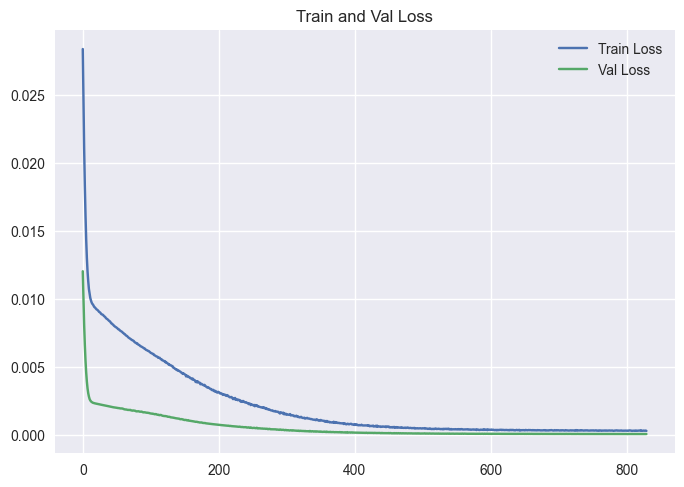

Training iteration: 45/50
Epoch 1/1000
8/8 [==============================] - 1s 30ms/step - loss: 0.0739 - accuracy: 7.0339e-04 - val_loss: 0.0858 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0651 - accuracy: 0.0050 - val_loss: 0.0801 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0591 - accuracy: 4.5537e-04 - val_loss: 0.0746 - val_accuracy: 0.0000e+00
Epoch 4/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0573 - accuracy: 0.0024 - val_loss: 0.0691 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0554 - accuracy: 7.0339e-04 - val_loss: 0.0640 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0510 - accuracy: 4.5537e-04 - val_loss: 0.0595 - val_accuracy: 0.0000e+00
Epoch 7/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0476 - accuracy: 0.

Epoch 57/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0125 - accuracy: 0.0024 - val_loss: 0.0082 - val_accuracy: 0.0000e+00
Epoch 58/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0131 - accuracy: 0.0013 - val_loss: 0.0078 - val_accuracy: 0.0000e+00
Epoch 59/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0131 - accuracy: 4.5537e-04 - val_loss: 0.0075 - val_accuracy: 0.0000e+00
Epoch 60/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0123 - accuracy: 9.9274e-04 - val_loss: 0.0072 - val_accuracy: 0.0000e+00
Epoch 61/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0120 - accuracy: 0.0018 - val_loss: 0.0069 - val_accuracy: 0.0000e+00
Epoch 62/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0126 - accuracy: 0.0018 - val_loss: 0.0068 - val_accuracy: 0.0000e+00
Epoch 63/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0122 - accuracy: 9.9274e-04 - val_loss: 0.0064 

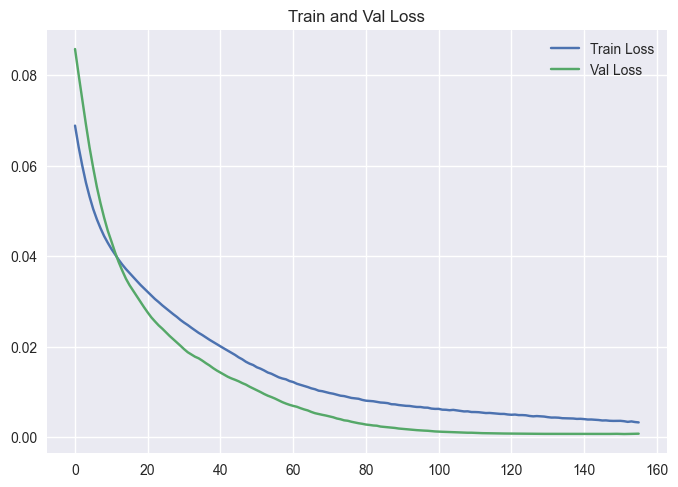

Training iteration: 46/50
Epoch 1/1000
8/8 [==============================] - 1s 32ms/step - loss: 0.1904 - accuracy: 4.5537e-04 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.1973 - accuracy: 9.9274e-04 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.1954 - accuracy: 7.0339e-04 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 4/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1986 - accuracy: 0.0013 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.1928 - accuracy: 0.0018 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.1927 - accuracy: 0.0018 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 7/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.1942 - accuracy: 0.0013

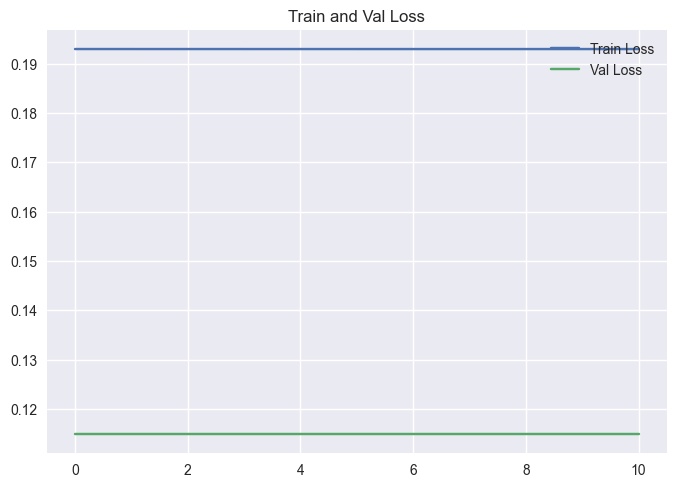

Training iteration: 47/50
Epoch 1/1000
8/8 [==============================] - 1s 27ms/step - loss: 0.1864 - accuracy: 4.5537e-04 - val_loss: 0.1148 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.1805 - accuracy: 0.0013 - val_loss: 0.1147 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1868 - accuracy: 4.5537e-04 - val_loss: 0.1144 - val_accuracy: 0.0000e+00
Epoch 4/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.1806 - accuracy: 0.0032 - val_loss: 0.1139 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.1846 - accuracy: 0.0050 - val_loss: 0.1133 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.1825 - accuracy: 0.0024 - val_loss: 0.1122 - val_accuracy: 0.0000e+00
Epoch 7/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.1889 - accuracy: 0.0018 - v

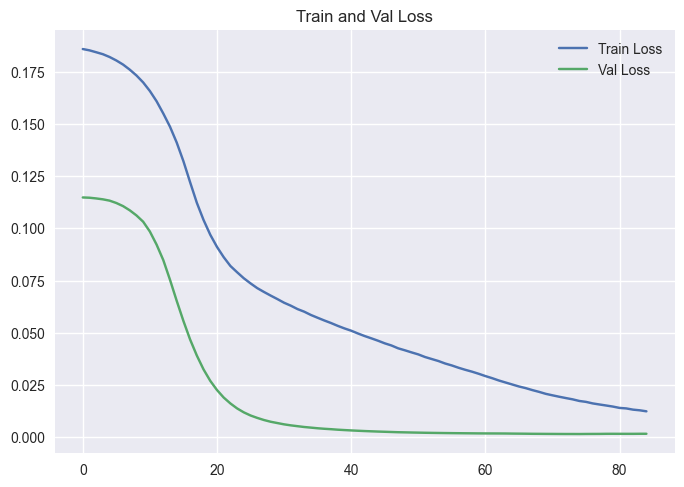

Training iteration: 48/50
Epoch 1/1000
8/8 [==============================] - 1s 28ms/step - loss: 0.1885 - accuracy: 9.9274e-04 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1895 - accuracy: 0.0050 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.1886 - accuracy: 0.0050 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 4/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.1947 - accuracy: 0.0050 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.1964 - accuracy: 0.0013 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.1892 - accuracy: 9.9274e-04 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 7/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.1941 - accuracy: 0.0013 - v

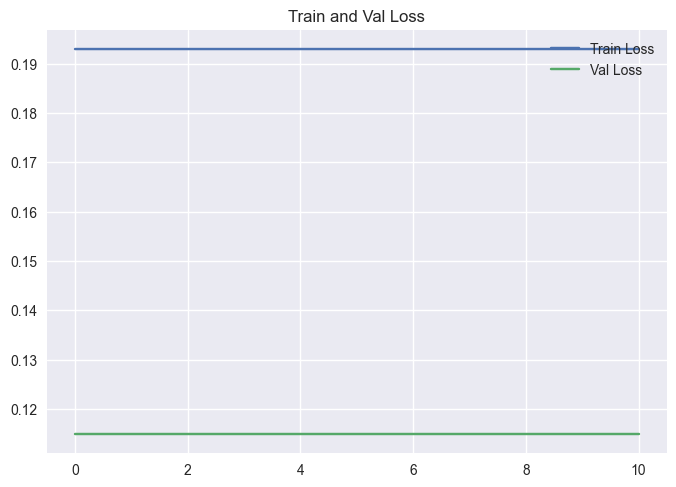

Training iteration: 49/50
Epoch 1/1000
8/8 [==============================] - 1s 28ms/step - loss: 0.1916 - accuracy: 0.0032 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1907 - accuracy: 0.0032 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.1882 - accuracy: 0.0024 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 4/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.1873 - accuracy: 9.9274e-04 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1987 - accuracy: 0.0018 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1899 - accuracy: 0.0013 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 7/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.2016 - accuracy: 0.0018 - val_l

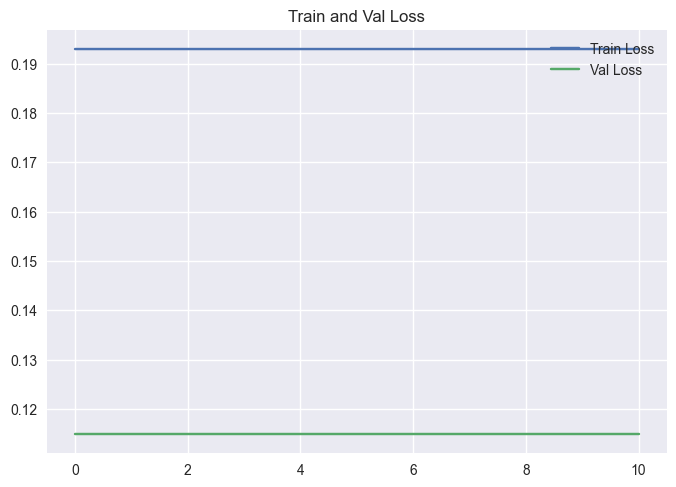

Training iteration: 50/50
Epoch 1/1000
8/8 [==============================] - 1s 30ms/step - loss: 0.1255 - accuracy: 0.0000e+00 - val_loss: 0.0296 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.1250 - accuracy: 0.0000e+00 - val_loss: 0.0263 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.1188 - accuracy: 0.0000e+00 - val_loss: 0.0233 - val_accuracy: 0.0000e+00
Epoch 4/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.1119 - accuracy: 0.0000e+00 - val_loss: 0.0206 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.1138 - accuracy: 0.0000e+00 - val_loss: 0.0182 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.1099 - accuracy: 0.0000e+00 - val_loss: 0.0161 - val_accuracy: 0.0000e+00
Epoch 7/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.1091 - accu

Epoch 56/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0355 - accuracy: 9.9274e-04 - val_loss: 0.0026 - val_accuracy: 0.0000e+00
Epoch 57/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0335 - accuracy: 0.0018 - val_loss: 0.0027 - val_accuracy: 0.0000e+00
Epoch 58/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0350 - accuracy: 0.0050 - val_loss: 0.0027 - val_accuracy: 0.0000e+00
Epoch 59/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0311 - accuracy: 7.0339e-04 - val_loss: 0.0028 - val_accuracy: 0.0000e+00


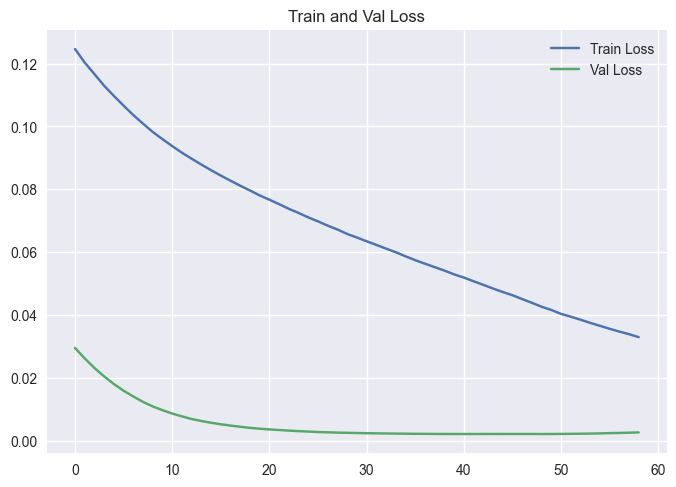

In [22]:
#多次代码测试版

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    x = inputs
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    return x

def model_2(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    channel2 = Flatten()(x)
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)
    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
    x = layers.Concatenate()([x, channel2])
    outputs = layers.Dense(1, activation="relu")(x)
    model = keras.Model(inputs, outputs)
    model.compile(optimizer=Adam(learning_rate=1e-4), loss='mse', metrics=['accuracy'])
    return model

# 设定全局最佳验证损失为一个大的数值
global_best_val_loss = 6e-04

best_TF_history = None

num_iterations = 500

# 运行100次训练循环
for i in range(num_iterations):
    print(f"Training iteration: {i + 1}/{num_iterations}")

    # 定义和编译模型
    myModel = model_2(
        input_shape=x_train.shape[1:],
        head_size=head_size,
        num_heads=num_heads,
        ff_dim=ff_dim,
        num_transformer_blocks=num_transformer_blocks,
        mlp_units=[16],
        mlp_dropout=0.1,
        dropout=dropout,
    )

    # 仅使用早停止回调，不直接使用ModelCheckpoint
    callbacks = [keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]
    
    history = myModel.fit(
        x_train,
        y_train,
        validation_split=0.1,
        epochs=1000,
        batch_size=batch_size,
        callbacks=callbacks,
    )
    
    # 检查当前模型的最佳验证损失
    current_best_val_loss = min(history.history['val_loss'])
    
    # 如果当前模型的验证损失比全局最佳还要低，那么保存这个模型并更新全局最佳验证损失
    if current_best_val_loss < global_best_val_loss:
        print(f"New best model found at iteration {i + 1} with validation loss {current_best_val_loss}.")
        model_filename = f"best_model_TF_iteration_{i + 1}.h5"
        myModel.save(model_filename)
        print(f"Model saved as {model_filename}")
        best_TF_history = history
    
    history2plot(history)  

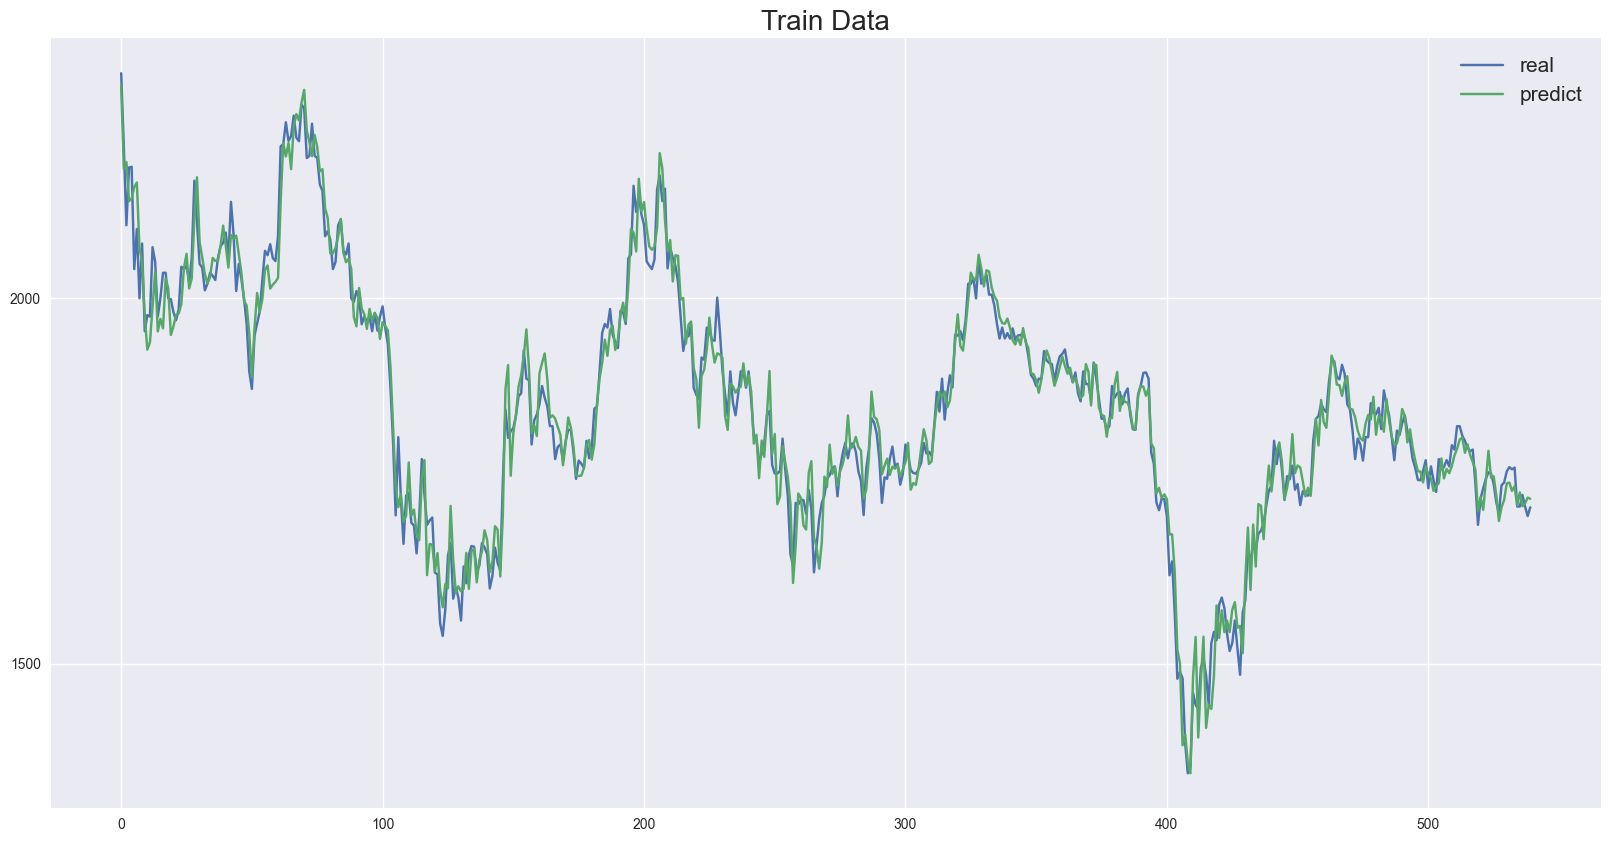

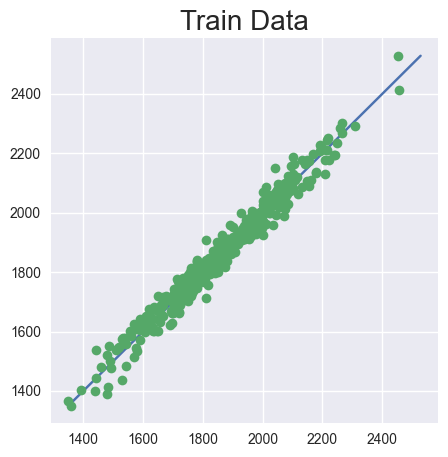

Train上的MAE/RMSE/MAPE/R^2
23.164441776732282
29.739292913327887
0.01263878774709433
0.9691774142720346


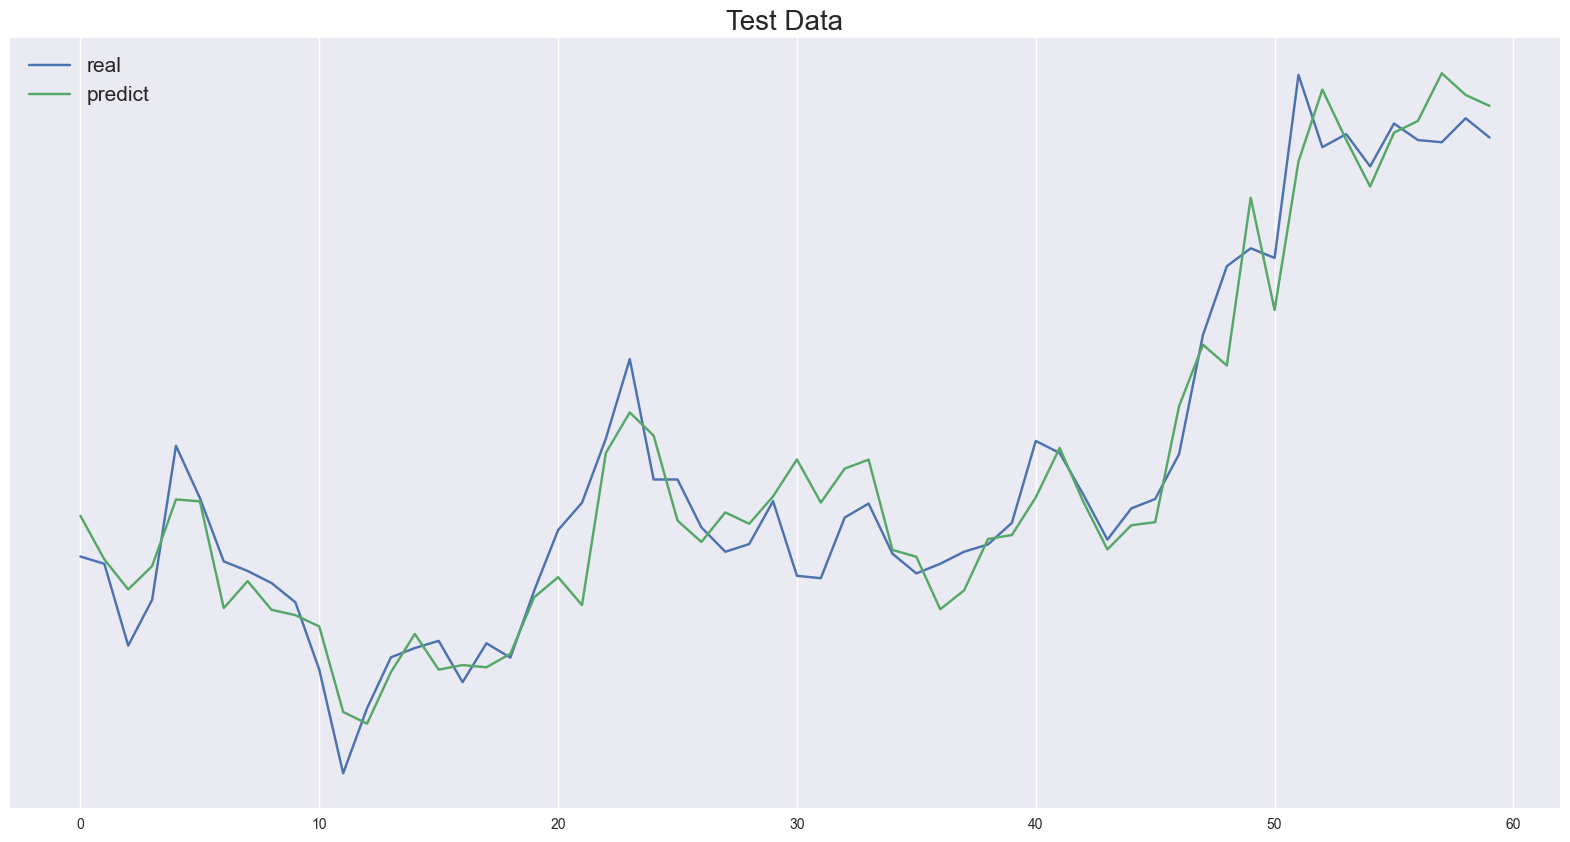

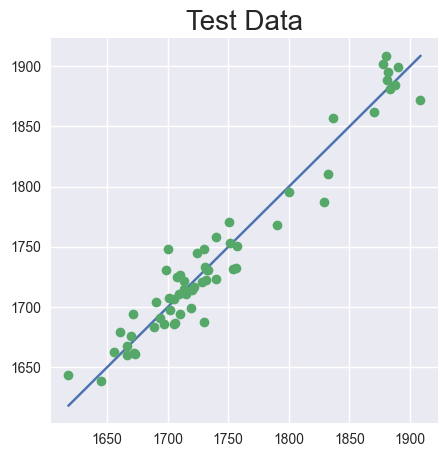

Test上的MAE/RMSE/MAPE/R^2
13.882760660807298
17.691666038630864
0.007940322716011165
0.9403035949566318


In [109]:
myModel.load_weights("best_model_TF_iteration_31.h5")

y_train_predict=myModel.predict(x_train)#预测结果
easy_result(y_train,y_train_predict,'Train','TF',train_show_num)#输出评价指标 

y_test_predict=myModel.predict(x_test)#预测结果
easy_result(y_test,y_test_predict,'Test','TF',test_show_num)#输出评价指标

# LSTM

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, 3, 14)]      0                                            
__________________________________________________________________________________________________
lstm_7 (LSTM)                   (None, 16)           1984        input_10[0][0]                   
__________________________________________________________________________________________________
flatten_9 (Flatten)             (None, 42)           0           input_10[0][0]                   
__________________________________________________________________________________________________
dropout_17 (Dropout)            (None, 16)           0           lstm_7[0][0]                     
____________________________________________________________________________________________

8/8 [==============================] - 0s 9ms/step - loss: 0.0014 - accuracy: 0.0018 - val_loss: 3.9004e-04 - val_accuracy: 0.0000e+00
Epoch 98/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0014 - accuracy: 0.0024 - val_loss: 4.1107e-04 - val_accuracy: 0.0000e+00
Epoch 99/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0013 - accuracy: 7.0339e-04 - val_loss: 4.0167e-04 - val_accuracy: 0.0000e+00
Epoch 100/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0013 - accuracy: 0.0013 - val_loss: 4.0218e-04 - val_accuracy: 0.0000e+00
Epoch 101/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0013 - accuracy: 7.0339e-04 - val_loss: 3.9782e-04 - val_accuracy: 0.0000e+00
Epoch 102/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0013 - accuracy: 0.0032 - val_loss: 4.0506e-04 - val_accuracy: 0.0000e+00
Epoch 103/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0013 - accuracy: 0.0018 - val_los

Epoch 151/1000
8/8 [==============================] - 0s 8ms/step - loss: 8.8057e-04 - accuracy: 0.0024 - val_loss: 2.6148e-04 - val_accuracy: 0.0000e+00
Epoch 152/1000
8/8 [==============================] - 0s 8ms/step - loss: 9.0509e-04 - accuracy: 0.0050 - val_loss: 2.5354e-04 - val_accuracy: 0.0000e+00
Epoch 153/1000
8/8 [==============================] - 0s 8ms/step - loss: 8.6391e-04 - accuracy: 0.0018 - val_loss: 2.4796e-04 - val_accuracy: 0.0000e+00
Epoch 154/1000
8/8 [==============================] - 0s 8ms/step - loss: 9.0427e-04 - accuracy: 0.0013 - val_loss: 2.5146e-04 - val_accuracy: 0.0000e+00
Epoch 155/1000
8/8 [==============================] - 0s 7ms/step - loss: 9.9261e-04 - accuracy: 4.5537e-04 - val_loss: 2.4677e-04 - val_accuracy: 0.0000e+00
Epoch 156/1000
8/8 [==============================] - 0s 10ms/step - loss: 9.0371e-04 - accuracy: 9.9274e-04 - val_loss: 2.5142e-04 - val_accuracy: 0.0000e+00
Epoch 157/1000
8/8 [==============================] - 0s 9ms/step -

Epoch 204/1000
8/8 [==============================] - 0s 8ms/step - loss: 6.6530e-04 - accuracy: 0.0032 - val_loss: 1.9975e-04 - val_accuracy: 0.0000e+00
Epoch 205/1000
8/8 [==============================] - 0s 10ms/step - loss: 6.4582e-04 - accuracy: 4.5537e-04 - val_loss: 1.9346e-04 - val_accuracy: 0.0000e+00
Epoch 206/1000
8/8 [==============================] - 0s 8ms/step - loss: 7.4444e-04 - accuracy: 7.0339e-04 - val_loss: 1.9323e-04 - val_accuracy: 0.0000e+00
Epoch 207/1000
8/8 [==============================] - 0s 8ms/step - loss: 7.2262e-04 - accuracy: 7.0339e-04 - val_loss: 1.9643e-04 - val_accuracy: 0.0000e+00
Epoch 208/1000
8/8 [==============================] - 0s 8ms/step - loss: 6.4226e-04 - accuracy: 7.0339e-04 - val_loss: 1.9252e-04 - val_accuracy: 0.0000e+00
Epoch 209/1000
8/8 [==============================] - 0s 8ms/step - loss: 6.6451e-04 - accuracy: 0.0018 - val_loss: 1.9235e-04 - val_accuracy: 0.0000e+00
Epoch 210/1000
8/8 [==============================] - 0s 8m

Epoch 257/1000
8/8 [==============================] - 0s 8ms/step - loss: 5.6903e-04 - accuracy: 0.0050 - val_loss: 1.6978e-04 - val_accuracy: 0.0000e+00
Epoch 258/1000
8/8 [==============================] - 0s 8ms/step - loss: 4.9587e-04 - accuracy: 7.0339e-04 - val_loss: 1.7035e-04 - val_accuracy: 0.0000e+00
Epoch 259/1000
8/8 [==============================] - 0s 9ms/step - loss: 5.4635e-04 - accuracy: 0.0013 - val_loss: 1.6933e-04 - val_accuracy: 0.0000e+00
Epoch 260/1000
8/8 [==============================] - 0s 8ms/step - loss: 5.7937e-04 - accuracy: 4.5537e-04 - val_loss: 1.6963e-04 - val_accuracy: 0.0000e+00
Epoch 261/1000
8/8 [==============================] - 0s 9ms/step - loss: 5.2460e-04 - accuracy: 0.0050 - val_loss: 1.6857e-04 - val_accuracy: 0.0000e+00
Epoch 262/1000
8/8 [==============================] - 0s 7ms/step - loss: 6.0536e-04 - accuracy: 7.0339e-04 - val_loss: 1.6810e-04 - val_accuracy: 0.0000e+00
Epoch 263/1000
8/8 [==============================] - 0s 8ms/ste

Epoch 310/1000
8/8 [==============================] - 0s 9ms/step - loss: 5.8525e-04 - accuracy: 0.0050 - val_loss: 1.5272e-04 - val_accuracy: 0.0000e+00
Epoch 311/1000
8/8 [==============================] - 0s 8ms/step - loss: 4.8229e-04 - accuracy: 9.9274e-04 - val_loss: 1.5185e-04 - val_accuracy: 0.0000e+00
Epoch 312/1000
8/8 [==============================] - 0s 10ms/step - loss: 4.8898e-04 - accuracy: 0.0050 - val_loss: 1.5414e-04 - val_accuracy: 0.0000e+00
Epoch 313/1000
8/8 [==============================] - 0s 8ms/step - loss: 5.0907e-04 - accuracy: 9.9274e-04 - val_loss: 1.5198e-04 - val_accuracy: 0.0000e+00
Epoch 314/1000
8/8 [==============================] - 0s 8ms/step - loss: 4.9323e-04 - accuracy: 0.0013 - val_loss: 1.5130e-04 - val_accuracy: 0.0000e+00
Epoch 315/1000
8/8 [==============================] - 0s 7ms/step - loss: 5.4630e-04 - accuracy: 0.0013 - val_loss: 1.5488e-04 - val_accuracy: 0.0000e+00
Epoch 316/1000
8/8 [==============================] - 0s 8ms/step -

Epoch 363/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.9624e-04 - accuracy: 7.0339e-04 - val_loss: 1.4329e-04 - val_accuracy: 0.0000e+00
Epoch 364/1000
8/8 [==============================] - 0s 9ms/step - loss: 4.4464e-04 - accuracy: 0.0013 - val_loss: 1.4266e-04 - val_accuracy: 0.0000e+00
Epoch 365/1000
8/8 [==============================] - 0s 8ms/step - loss: 4.5674e-04 - accuracy: 0.0032 - val_loss: 1.4280e-04 - val_accuracy: 0.0000e+00
Epoch 366/1000
8/8 [==============================] - 0s 8ms/step - loss: 4.3914e-04 - accuracy: 0.0018 - val_loss: 1.4236e-04 - val_accuracy: 0.0000e+00
Epoch 367/1000
8/8 [==============================] - 0s 8ms/step - loss: 4.5235e-04 - accuracy: 0.0050 - val_loss: 1.4507e-04 - val_accuracy: 0.0000e+00
Epoch 368/1000
8/8 [==============================] - 0s 8ms/step - loss: 4.2158e-04 - accuracy: 4.5537e-04 - val_loss: 1.4199e-04 - val_accuracy: 0.0000e+00
Epoch 369/1000
8/8 [==============================] - 0s 7ms/step - 

Epoch 416/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.8904e-04 - accuracy: 9.9274e-04 - val_loss: 1.3774e-04 - val_accuracy: 0.0000e+00
Epoch 417/1000
8/8 [==============================] - 0s 10ms/step - loss: 4.1960e-04 - accuracy: 9.9274e-04 - val_loss: 1.3690e-04 - val_accuracy: 0.0000e+00
Epoch 418/1000
8/8 [==============================] - 0s 9ms/step - loss: 4.3706e-04 - accuracy: 0.0050 - val_loss: 1.3673e-04 - val_accuracy: 0.0000e+00
Epoch 419/1000
8/8 [==============================] - 0s 9ms/step - loss: 3.8607e-04 - accuracy: 0.0024 - val_loss: 1.3673e-04 - val_accuracy: 0.0000e+00
Epoch 420/1000
8/8 [==============================] - 0s 9ms/step - loss: 4.2327e-04 - accuracy: 7.0339e-04 - val_loss: 1.3713e-04 - val_accuracy: 0.0000e+00
Epoch 421/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.9944e-04 - accuracy: 4.5537e-04 - val_loss: 1.3660e-04 - val_accuracy: 0.0000e+00
Epoch 422/1000
8/8 [==============================] - 0s 9m

Epoch 521/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.5499e-04 - accuracy: 7.0339e-04 - val_loss: 1.2360e-04 - val_accuracy: 0.0000e+00
Epoch 522/1000
8/8 [==============================] - 0s 9ms/step - loss: 3.8658e-04 - accuracy: 0.0018 - val_loss: 1.2377e-04 - val_accuracy: 0.0000e+00
Epoch 523/1000
8/8 [==============================] - 0s 9ms/step - loss: 3.6374e-04 - accuracy: 7.0339e-04 - val_loss: 1.2396e-04 - val_accuracy: 0.0000e+00
Epoch 524/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.9432e-04 - accuracy: 7.0339e-04 - val_loss: 1.2381e-04 - val_accuracy: 0.0000e+00
Epoch 525/1000
8/8 [==============================] - 0s 11ms/step - loss: 3.9379e-04 - accuracy: 9.9274e-04 - val_loss: 1.2399e-04 - val_accuracy: 0.0000e+00
Epoch 526/1000
8/8 [==============================] - 0s 10ms/step - loss: 3.6775e-04 - accuracy: 0.0024 - val_loss: 1.2354e-04 - val_accuracy: 0.0000e+00
Epoch 527/1000
8/8 [==============================] - 0s 9

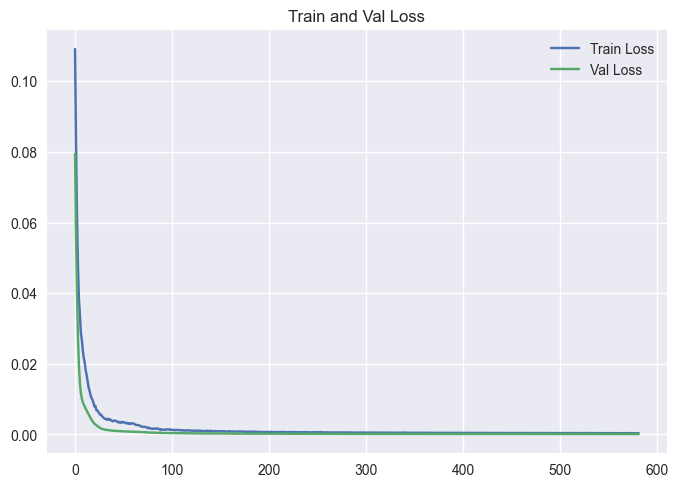

In [132]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Input,LSTM,Dropout,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

def lstm_model():
    inputs=Input(shape=x_train.shape[1:])
    channel1 = Flatten()(inputs)
    channel2 = LSTM(units=16, return_sequences=False)(inputs)
    channel2 = Dropout(dropout)(channel2)
    channel = layers.Concatenate()([channel1, channel2])
    dense = Dense(32, activation="relu", use_bias=True)(channel)
    outputs = Dense(1, activation="relu", use_bias=True)(dense)
    model = Model(inputs=inputs, outputs=outputs)
    print(model.summary())
    model.compile(optimizer=Adam(learning_rate=1e-4), loss='mse',metrics=['accuracy'])
    return model

myModel = lstm_model()
callbacks = [keras.callbacks.EarlyStopping(patience=patience, restore_best_weights=True),
            keras.callbacks.ModelCheckpoint(filepath = best_model_LSTM , monitor='val_loss', save_best_only=True)]

if training_state==True:
    history = myModel.fit(
        x_train,
        y_train,
        validation_split=0.1,
        epochs=1000,
        batch_size=batch_size,
        callbacks=callbacks,
    )
    history2plot(history)
    
#myModel.load_weights(best_model_LSTM)

latest_model_weights = callbacks[1].filepath
myModel.load_weights(latest_model_weights)



Training iteration: 1/50
Epoch 1/1000
8/8 [==============================] - 2s 70ms/step - loss: 0.1903 - accuracy: 0.0050 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1916 - accuracy: 7.0339e-04 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1914 - accuracy: 9.9274e-04 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 4/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.1898 - accuracy: 4.5537e-04 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.1916 - accuracy: 7.0339e-04 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.2016 - accuracy: 0.0032 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 7/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1919 - accuracy: 0.0

Epoch 100/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.0019 - accuracy: 0.0013 - val_loss: 4.3841e-04 - val_accuracy: 0.0000e+00
Epoch 101/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.0020 - accuracy: 0.0032 - val_loss: 4.4128e-04 - val_accuracy: 0.0000e+00
Epoch 102/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0018 - accuracy: 0.0050 - val_loss: 4.4624e-04 - val_accuracy: 0.0000e+00
Epoch 103/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0019 - accuracy: 0.0018 - val_loss: 4.5231e-04 - val_accuracy: 0.0000e+00
Epoch 104/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0017 - accuracy: 0.0013 - val_loss: 4.3003e-04 - val_accuracy: 0.0000e+00
Epoch 105/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0017 - accuracy: 0.0013 - val_loss: 4.2300e-04 - val_accuracy: 0.0000e+00
Epoch 106/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0016 - accuracy: 9.927

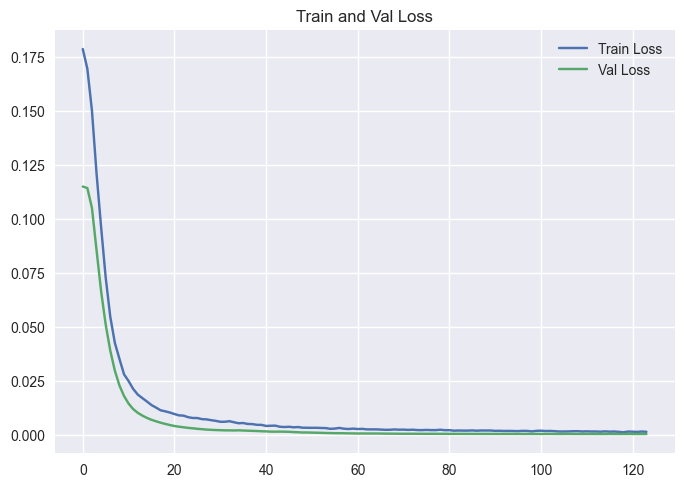

Training iteration: 3/50
Epoch 1/1000
8/8 [==============================] - 2s 70ms/step - loss: 0.1730 - accuracy: 9.9274e-04 - val_loss: 0.1101 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1513 - accuracy: 7.0339e-04 - val_loss: 0.0946 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.1116 - accuracy: 0.0024 - val_loss: 0.0763 - val_accuracy: 0.0000e+00
Epoch 4/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0898 - accuracy: 0.0018 - val_loss: 0.0601 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0661 - accuracy: 0.0013 - val_loss: 0.0469 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0507 - accuracy: 0.0018 - val_loss: 0.0364 - val_accuracy: 0.0000e+00
Epoch 7/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0374 - accuracy: 9.9274e-04 

Epoch 111/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0013 - accuracy: 0.0013 - val_loss: 5.0960e-04 - val_accuracy: 0.0000e+00
Epoch 112/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0013 - accuracy: 7.0339e-04 - val_loss: 5.5831e-04 - val_accuracy: 0.0000e+00
Epoch 113/1000
8/8 [==============================] - 0s 8ms/step - loss: 9.8150e-04 - accuracy: 7.0339e-04 - val_loss: 5.3881e-04 - val_accuracy: 0.0000e+00
Epoch 114/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0014 - accuracy: 0.0050 - val_loss: 5.2966e-04 - val_accuracy: 0.0000e+00
Epoch 115/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0011 - accuracy: 0.0013 - val_loss: 5.1467e-04 - val_accuracy: 0.0000e+00
Epoch 116/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0013 - accuracy: 0.0018 - val_loss: 5.0208e-04 - val_accuracy: 0.0000e+00
Epoch 117/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0012 - accur

Epoch 217/1000
8/8 [==============================] - 0s 7ms/step - loss: 6.2324e-04 - accuracy: 0.0024 - val_loss: 2.4608e-04 - val_accuracy: 0.0000e+00
Epoch 218/1000
8/8 [==============================] - 0s 7ms/step - loss: 6.1310e-04 - accuracy: 0.0013 - val_loss: 2.4539e-04 - val_accuracy: 0.0000e+00
Epoch 219/1000
8/8 [==============================] - 0s 8ms/step - loss: 5.9873e-04 - accuracy: 0.0024 - val_loss: 2.6310e-04 - val_accuracy: 0.0000e+00
Epoch 220/1000
8/8 [==============================] - 0s 8ms/step - loss: 6.3100e-04 - accuracy: 0.0024 - val_loss: 2.4150e-04 - val_accuracy: 0.0000e+00
Epoch 221/1000
8/8 [==============================] - 0s 7ms/step - loss: 5.7470e-04 - accuracy: 0.0032 - val_loss: 2.4118e-04 - val_accuracy: 0.0000e+00
Epoch 222/1000
8/8 [==============================] - 0s 7ms/step - loss: 5.0339e-04 - accuracy: 0.0050 - val_loss: 2.5654e-04 - val_accuracy: 0.0000e+00
Epoch 223/1000
8/8 [==============================] - 0s 8ms/step - loss: 5.

Epoch 270/1000
8/8 [==============================] - 0s 7ms/step - loss: 4.2857e-04 - accuracy: 0.0024 - val_loss: 1.9229e-04 - val_accuracy: 0.0000e+00
Epoch 271/1000
8/8 [==============================] - 0s 8ms/step - loss: 4.7432e-04 - accuracy: 7.0339e-04 - val_loss: 1.9818e-04 - val_accuracy: 0.0000e+00
Epoch 272/1000
8/8 [==============================] - 0s 7ms/step - loss: 4.0396e-04 - accuracy: 0.0018 - val_loss: 1.9659e-04 - val_accuracy: 0.0000e+00
Epoch 273/1000
8/8 [==============================] - 0s 7ms/step - loss: 4.3662e-04 - accuracy: 0.0018 - val_loss: 1.9005e-04 - val_accuracy: 0.0000e+00
Epoch 274/1000
8/8 [==============================] - 0s 7ms/step - loss: 4.0235e-04 - accuracy: 0.0032 - val_loss: 1.9379e-04 - val_accuracy: 0.0000e+00
Epoch 275/1000
8/8 [==============================] - 0s 8ms/step - loss: 4.0123e-04 - accuracy: 0.0050 - val_loss: 1.9262e-04 - val_accuracy: 0.0000e+00
Epoch 276/1000
8/8 [==============================] - 0s 7ms/step - loss

Epoch 323/1000
8/8 [==============================] - 0s 7ms/step - loss: 3.5235e-04 - accuracy: 0.0013 - val_loss: 1.6212e-04 - val_accuracy: 0.0000e+00
Epoch 324/1000
8/8 [==============================] - 0s 7ms/step - loss: 3.6408e-04 - accuracy: 0.0018 - val_loss: 1.5911e-04 - val_accuracy: 0.0000e+00
Epoch 325/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.4592e-04 - accuracy: 7.0339e-04 - val_loss: 1.6014e-04 - val_accuracy: 0.0000e+00
Epoch 326/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.0547e-04 - accuracy: 0.0013 - val_loss: 1.6167e-04 - val_accuracy: 0.0000e+00
Epoch 327/1000
8/8 [==============================] - 0s 9ms/step - loss: 3.3315e-04 - accuracy: 0.0032 - val_loss: 1.6218e-04 - val_accuracy: 0.0000e+00
Epoch 328/1000
8/8 [==============================] - 0s 7ms/step - loss: 3.4734e-04 - accuracy: 0.0013 - val_loss: 1.5788e-04 - val_accuracy: 0.0000e+00
Epoch 329/1000
8/8 [==============================] - 0s 8ms/step - loss

Epoch 376/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.0172e-04 - accuracy: 0.0013 - val_loss: 1.3336e-04 - val_accuracy: 0.0000e+00
Epoch 377/1000
8/8 [==============================] - 0s 7ms/step - loss: 3.0078e-04 - accuracy: 0.0018 - val_loss: 1.3187e-04 - val_accuracy: 0.0000e+00
Epoch 378/1000
8/8 [==============================] - 0s 7ms/step - loss: 2.9488e-04 - accuracy: 0.0013 - val_loss: 1.3076e-04 - val_accuracy: 0.0000e+00
Epoch 379/1000
8/8 [==============================] - 0s 8ms/step - loss: 2.9058e-04 - accuracy: 0.0050 - val_loss: 1.3263e-04 - val_accuracy: 0.0000e+00
Epoch 380/1000
8/8 [==============================] - 0s 8ms/step - loss: 2.8769e-04 - accuracy: 0.0018 - val_loss: 1.3663e-04 - val_accuracy: 0.0000e+00
Epoch 381/1000
8/8 [==============================] - 0s 7ms/step - loss: 2.9575e-04 - accuracy: 0.0013 - val_loss: 1.3018e-04 - val_accuracy: 0.0000e+00
Epoch 382/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.

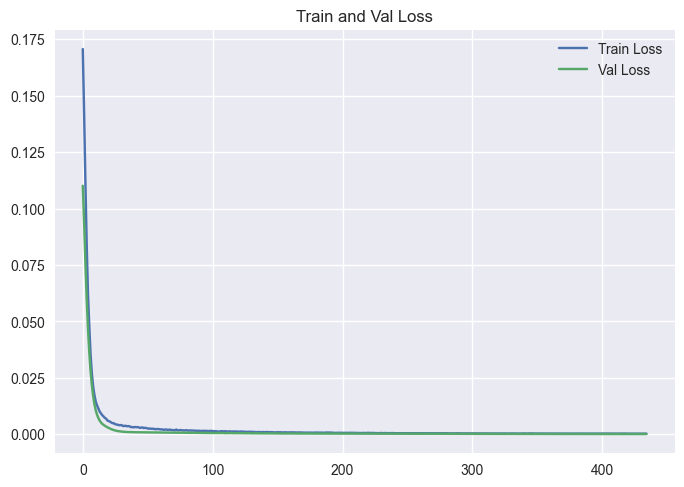

Training iteration: 4/50
Epoch 1/1000
8/8 [==============================] - 2s 97ms/step - loss: 0.1565 - accuracy: 0.0000e+00 - val_loss: 0.1027 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.1438 - accuracy: 0.0000e+00 - val_loss: 0.0818 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1142 - accuracy: 0.0000e+00 - val_loss: 0.0577 - val_accuracy: 0.0000e+00
Epoch 4/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.0946 - accuracy: 0.0000e+00 - val_loss: 0.0385 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0719 - accuracy: 0.0000e+00 - val_loss: 0.0243 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0614 - accuracy: 0.0000e+00 - val_loss: 0.0147 - val_accuracy: 0.0000e+00
Epoch 7/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0455 - accu

8/8 [==============================] - 0s 8ms/step - loss: 0.0021 - accuracy: 0.0050 - val_loss: 7.3365e-04 - val_accuracy: 0.0000e+00
Epoch 87/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0023 - accuracy: 0.0024 - val_loss: 7.1984e-04 - val_accuracy: 0.0000e+00
Epoch 88/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0022 - accuracy: 0.0032 - val_loss: 7.1071e-04 - val_accuracy: 0.0000e+00
Epoch 89/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0021 - accuracy: 7.0339e-04 - val_loss: 7.0371e-04 - val_accuracy: 0.0000e+00
Epoch 90/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0022 - accuracy: 7.0339e-04 - val_loss: 6.9673e-04 - val_accuracy: 0.0000e+00
Epoch 91/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0020 - accuracy: 0.0013 - val_loss: 6.8899e-04 - val_accuracy: 0.0000e+00
Epoch 92/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0022 - accuracy: 9.9274e-04 - val_los

Epoch 194/1000
8/8 [==============================] - 0s 8ms/step - loss: 8.5864e-04 - accuracy: 0.0024 - val_loss: 3.0968e-04 - val_accuracy: 0.0000e+00
Epoch 195/1000
8/8 [==============================] - 0s 8ms/step - loss: 9.2040e-04 - accuracy: 0.0032 - val_loss: 3.1020e-04 - val_accuracy: 0.0000e+00
Epoch 196/1000
8/8 [==============================] - 0s 8ms/step - loss: 8.1923e-04 - accuracy: 0.0024 - val_loss: 3.0812e-04 - val_accuracy: 0.0000e+00
Epoch 197/1000
8/8 [==============================] - 0s 8ms/step - loss: 8.8419e-04 - accuracy: 0.0032 - val_loss: 3.0896e-04 - val_accuracy: 0.0000e+00
Epoch 198/1000
8/8 [==============================] - 0s 7ms/step - loss: 8.2926e-04 - accuracy: 0.0032 - val_loss: 3.0437e-04 - val_accuracy: 0.0000e+00
Epoch 199/1000
8/8 [==============================] - 0s 8ms/step - loss: 9.0632e-04 - accuracy: 7.0339e-04 - val_loss: 3.0549e-04 - val_accuracy: 0.0000e+00
Epoch 200/1000
8/8 [==============================] - 0s 8ms/step - loss

Epoch 247/1000
8/8 [==============================] - 0s 8ms/step - loss: 6.6149e-04 - accuracy: 0.0024 - val_loss: 2.4830e-04 - val_accuracy: 0.0000e+00
Epoch 248/1000
8/8 [==============================] - 0s 8ms/step - loss: 6.6966e-04 - accuracy: 0.0050 - val_loss: 2.6268e-04 - val_accuracy: 0.0000e+00
Epoch 249/1000
8/8 [==============================] - 0s 8ms/step - loss: 6.8194e-04 - accuracy: 0.0013 - val_loss: 2.4941e-04 - val_accuracy: 0.0000e+00
Epoch 250/1000
8/8 [==============================] - 0s 7ms/step - loss: 5.9095e-04 - accuracy: 0.0032 - val_loss: 2.4603e-04 - val_accuracy: 0.0000e+00
Epoch 251/1000
8/8 [==============================] - 0s 8ms/step - loss: 6.7622e-04 - accuracy: 4.5537e-04 - val_loss: 2.5072e-04 - val_accuracy: 0.0000e+00
Epoch 252/1000
8/8 [==============================] - 0s 7ms/step - loss: 5.9799e-04 - accuracy: 0.0032 - val_loss: 2.4321e-04 - val_accuracy: 0.0000e+00
Epoch 253/1000
8/8 [==============================] - 0s 8ms/step - loss

Epoch 300/1000
8/8 [==============================] - 0s 8ms/step - loss: 4.9012e-04 - accuracy: 0.0032 - val_loss: 2.1502e-04 - val_accuracy: 0.0000e+00
Epoch 301/1000
8/8 [==============================] - 0s 8ms/step - loss: 5.3746e-04 - accuracy: 0.0024 - val_loss: 2.1097e-04 - val_accuracy: 0.0000e+00
Epoch 302/1000
8/8 [==============================] - 0s 8ms/step - loss: 4.9968e-04 - accuracy: 4.5537e-04 - val_loss: 2.1261e-04 - val_accuracy: 0.0000e+00
Epoch 303/1000
8/8 [==============================] - 0s 7ms/step - loss: 5.0806e-04 - accuracy: 0.0032 - val_loss: 2.0563e-04 - val_accuracy: 0.0000e+00
Epoch 304/1000
8/8 [==============================] - 0s 9ms/step - loss: 5.0367e-04 - accuracy: 7.0339e-04 - val_loss: 2.1009e-04 - val_accuracy: 0.0000e+00
Epoch 305/1000
8/8 [==============================] - 0s 9ms/step - loss: 5.4787e-04 - accuracy: 0.0032 - val_loss: 2.0993e-04 - val_accuracy: 0.0000e+00
Epoch 306/1000
8/8 [==============================] - 0s 8ms/step - 

Epoch 353/1000
8/8 [==============================] - 0s 8ms/step - loss: 4.3647e-04 - accuracy: 0.0050 - val_loss: 1.6562e-04 - val_accuracy: 0.0000e+00
Epoch 354/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.6755e-04 - accuracy: 4.5537e-04 - val_loss: 1.6507e-04 - val_accuracy: 0.0000e+00
Epoch 355/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.6097e-04 - accuracy: 4.5537e-04 - val_loss: 1.6868e-04 - val_accuracy: 0.0000e+00
Epoch 356/1000
8/8 [==============================] - 0s 7ms/step - loss: 4.0206e-04 - accuracy: 0.0013 - val_loss: 1.6330e-04 - val_accuracy: 0.0000e+00
Epoch 357/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.9360e-04 - accuracy: 0.0050 - val_loss: 1.6421e-04 - val_accuracy: 0.0000e+00
Epoch 358/1000
8/8 [==============================] - 0s 8ms/step - loss: 4.1824e-04 - accuracy: 0.0050 - val_loss: 1.6367e-04 - val_accuracy: 0.0000e+00
Epoch 359/1000
8/8 [==============================] - 0s 9ms/step - 

Epoch 458/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.0986e-04 - accuracy: 0.0032 - val_loss: 1.0850e-04 - val_accuracy: 0.0000e+00
Epoch 459/1000
8/8 [==============================] - 0s 8ms/step - loss: 2.8020e-04 - accuracy: 0.0032 - val_loss: 1.0897e-04 - val_accuracy: 0.0000e+00
Epoch 460/1000
8/8 [==============================] - 0s 9ms/step - loss: 3.1130e-04 - accuracy: 0.0013 - val_loss: 1.0819e-04 - val_accuracy: 0.0000e+00
Epoch 461/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.2968e-04 - accuracy: 9.9274e-04 - val_loss: 1.0832e-04 - val_accuracy: 0.0000e+00
Epoch 462/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.1382e-04 - accuracy: 0.0013 - val_loss: 1.0820e-04 - val_accuracy: 0.0000e+00
Epoch 463/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.1752e-04 - accuracy: 0.0050 - val_loss: 1.0777e-04 - val_accuracy: 0.0000e+00
Epoch 464/1000
8/8 [==============================] - 0s 8ms/step - loss

New best model found at iteration 5 with validation loss 9.192770085064694e-05.
Model saved as best_model_LSTM_iteration_5.h5


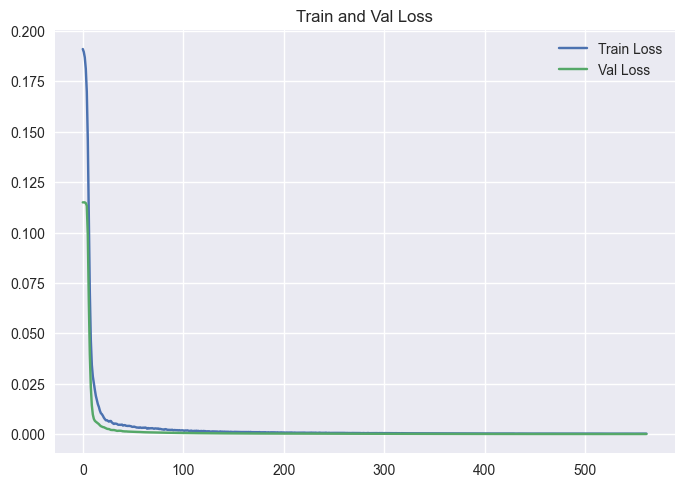

Training iteration: 6/50
Epoch 1/1000
8/8 [==============================] - 2s 71ms/step - loss: 0.1899 - accuracy: 0.0032 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1966 - accuracy: 4.5537e-04 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.1907 - accuracy: 0.0024 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 4/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.1900 - accuracy: 7.0339e-04 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1878 - accuracy: 0.0050 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1930 - accuracy: 9.9274e-04 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 7/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1906 - accuracy: 0.0018

Epoch 56/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0041 - accuracy: 0.0050 - val_loss: 8.1352e-04 - val_accuracy: 0.0000e+00
Epoch 57/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0042 - accuracy: 0.0024 - val_loss: 8.0984e-04 - val_accuracy: 0.0000e+00
Epoch 58/1000
8/8 [==============================] - 0s 11ms/step - loss: 0.0038 - accuracy: 7.0339e-04 - val_loss: 7.9895e-04 - val_accuracy: 0.0000e+00
Epoch 59/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0041 - accuracy: 0.0013 - val_loss: 7.9564e-04 - val_accuracy: 0.0000e+00
Epoch 60/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0040 - accuracy: 7.0339e-04 - val_loss: 8.0980e-04 - val_accuracy: 0.0000e+00
Epoch 61/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0037 - accuracy: 7.0339e-04 - val_loss: 8.0769e-04 - val_accuracy: 0.0000e+00
Epoch 62/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0038 - accuracy: 0

8/8 [==============================] - 0s 9ms/step - loss: 0.0012 - accuracy: 0.0013 - val_loss: 3.9603e-04 - val_accuracy: 0.0000e+00
Epoch 165/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0015 - accuracy: 0.0013 - val_loss: 4.2568e-04 - val_accuracy: 0.0000e+00
Epoch 166/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0013 - accuracy: 7.0339e-04 - val_loss: 4.1741e-04 - val_accuracy: 0.0000e+00
Epoch 167/1000
8/8 [==============================] - 0s 12ms/step - loss: 0.0013 - accuracy: 0.0050 - val_loss: 4.0010e-04 - val_accuracy: 0.0000e+00
Epoch 168/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0013 - accuracy: 9.9274e-04 - val_loss: 3.9250e-04 - val_accuracy: 0.0000e+00
Epoch 169/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0011 - accuracy: 0.0018 - val_loss: 4.0684e-04 - val_accuracy: 0.0000e+00
Epoch 170/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0013 - accuracy: 0.0032 - val_

Epoch 218/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0010 - accuracy: 0.0050 - val_loss: 3.2575e-04 - val_accuracy: 0.0000e+00
Epoch 219/1000
8/8 [==============================] - 0s 8ms/step - loss: 9.5106e-04 - accuracy: 0.0018 - val_loss: 3.2573e-04 - val_accuracy: 0.0000e+00
Epoch 220/1000
8/8 [==============================] - 0s 7ms/step - loss: 9.1660e-04 - accuracy: 9.9274e-04 - val_loss: 3.1512e-04 - val_accuracy: 0.0000e+00
Epoch 221/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0010 - accuracy: 0.0013 - val_loss: 3.2666e-04 - val_accuracy: 0.0000e+00
Epoch 222/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0010 - accuracy: 9.9274e-04 - val_loss: 3.2715e-04 - val_accuracy: 0.0000e+00
Epoch 223/1000
8/8 [==============================] - 0s 8ms/step - loss: 9.4220e-04 - accuracy: 0.0032 - val_loss: 3.1144e-04 - val_accuracy: 0.0000e+00
Epoch 224/1000
8/8 [==============================] - 0s 7ms/step - loss: 9.6568

Epoch 271/1000
8/8 [==============================] - 0s 8ms/step - loss: 7.3615e-04 - accuracy: 7.0339e-04 - val_loss: 2.6292e-04 - val_accuracy: 0.0000e+00
Epoch 272/1000
8/8 [==============================] - 0s 8ms/step - loss: 7.2839e-04 - accuracy: 0.0024 - val_loss: 2.6110e-04 - val_accuracy: 0.0000e+00
Epoch 273/1000
8/8 [==============================] - 0s 9ms/step - loss: 8.2226e-04 - accuracy: 0.0018 - val_loss: 2.5929e-04 - val_accuracy: 0.0000e+00
Epoch 274/1000
8/8 [==============================] - 0s 8ms/step - loss: 6.8208e-04 - accuracy: 0.0024 - val_loss: 2.5627e-04 - val_accuracy: 0.0000e+00
Epoch 275/1000
8/8 [==============================] - 0s 8ms/step - loss: 7.3959e-04 - accuracy: 7.0339e-04 - val_loss: 2.5520e-04 - val_accuracy: 0.0000e+00
Epoch 276/1000
8/8 [==============================] - 0s 10ms/step - loss: 6.0882e-04 - accuracy: 0.0024 - val_loss: 2.6160e-04 - val_accuracy: 0.0000e+00
Epoch 277/1000
8/8 [==============================] - 0s 9ms/step -

Epoch 376/1000
8/8 [==============================] - 0s 11ms/step - loss: 4.5588e-04 - accuracy: 7.0339e-04 - val_loss: 1.6568e-04 - val_accuracy: 0.0000e+00
Epoch 377/1000
8/8 [==============================] - 0s 9ms/step - loss: 4.0256e-04 - accuracy: 4.5537e-04 - val_loss: 1.6603e-04 - val_accuracy: 0.0000e+00
Epoch 378/1000
8/8 [==============================] - 0s 8ms/step - loss: 4.7060e-04 - accuracy: 0.0013 - val_loss: 1.7581e-04 - val_accuracy: 0.0000e+00
Epoch 379/1000
8/8 [==============================] - 0s 8ms/step - loss: 4.4600e-04 - accuracy: 4.5537e-04 - val_loss: 1.6033e-04 - val_accuracy: 0.0000e+00
Epoch 380/1000
8/8 [==============================] - 0s 8ms/step - loss: 4.5261e-04 - accuracy: 9.9274e-04 - val_loss: 1.7848e-04 - val_accuracy: 0.0000e+00
Epoch 381/1000
8/8 [==============================] - 0s 8ms/step - loss: 5.2115e-04 - accuracy: 7.0339e-04 - val_loss: 1.6069e-04 - val_accuracy: 0.0000e+00
Epoch 382/1000
8/8 [==============================] - 0

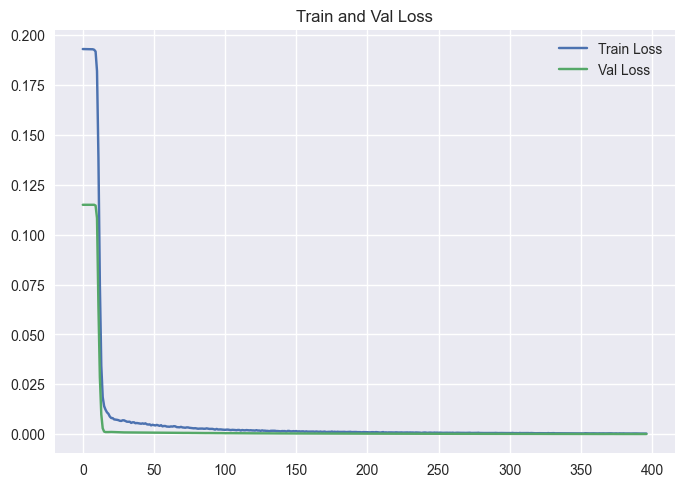

Training iteration: 7/50
Epoch 1/1000
8/8 [==============================] - 2s 67ms/step - loss: 0.1935 - accuracy: 0.0018 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1890 - accuracy: 0.0018 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1985 - accuracy: 0.0050 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 4/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.1901 - accuracy: 7.0339e-04 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.1924 - accuracy: 4.5537e-04 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1937 - accuracy: 0.0050 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 7/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1926 - accuracy: 4.5537e-04

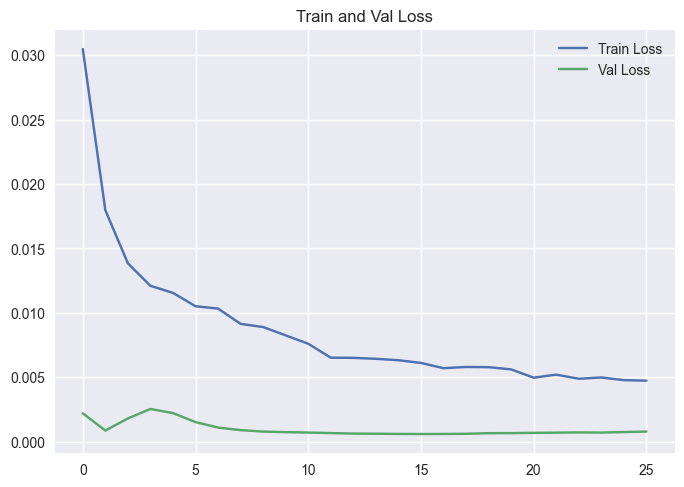

Training iteration: 10/50
Epoch 1/1000
8/8 [==============================] - 2s 66ms/step - loss: 0.1587 - accuracy: 0.0050 - val_loss: 0.0867 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.1338 - accuracy: 0.0018 - val_loss: 0.0627 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.1036 - accuracy: 0.0032 - val_loss: 0.0423 - val_accuracy: 0.0000e+00
Epoch 4/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0737 - accuracy: 0.0032 - val_loss: 0.0270 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0482 - accuracy: 0.0032 - val_loss: 0.0159 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0303 - accuracy: 0.0013 - val_loss: 0.0086 - val_accuracy: 0.0000e+00
Epoch 7/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0176 - accuracy: 0.0024 - val_loss:

Epoch 59/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0034 - accuracy: 9.9274e-04 - val_loss: 0.0011 - val_accuracy: 0.0000e+00
Epoch 60/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0039 - accuracy: 0.0032 - val_loss: 0.0011 - val_accuracy: 0.0000e+00
Epoch 61/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0035 - accuracy: 7.0339e-04 - val_loss: 0.0011 - val_accuracy: 0.0000e+00
Epoch 62/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0039 - accuracy: 9.9274e-04 - val_loss: 0.0010 - val_accuracy: 0.0000e+00
Epoch 63/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0032 - accuracy: 0.0032 - val_loss: 0.0010 - val_accuracy: 0.0000e+00
Epoch 64/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0036 - accuracy: 0.0024 - val_loss: 0.0011 - val_accuracy: 0.0000e+00
Epoch 65/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0035 - accuracy: 7.0339e-04 - val_loss: 0.0

8/8 [==============================] - 0s 8ms/step - loss: 0.0019 - accuracy: 0.0032 - val_loss: 8.1230e-04 - val_accuracy: 0.0000e+00
Epoch 115/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0018 - accuracy: 0.0013 - val_loss: 8.0477e-04 - val_accuracy: 0.0000e+00
Epoch 116/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0017 - accuracy: 4.5537e-04 - val_loss: 7.7730e-04 - val_accuracy: 0.0000e+00
Epoch 117/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0019 - accuracy: 0.0018 - val_loss: 7.2024e-04 - val_accuracy: 0.0000e+00
Epoch 118/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0018 - accuracy: 0.0050 - val_loss: 7.2980e-04 - val_accuracy: 0.0000e+00
Epoch 119/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0015 - accuracy: 0.0032 - val_loss: 7.6216e-04 - val_accuracy: 0.0000e+00
Epoch 120/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0017 - accuracy: 7.0339e-04 - val_l

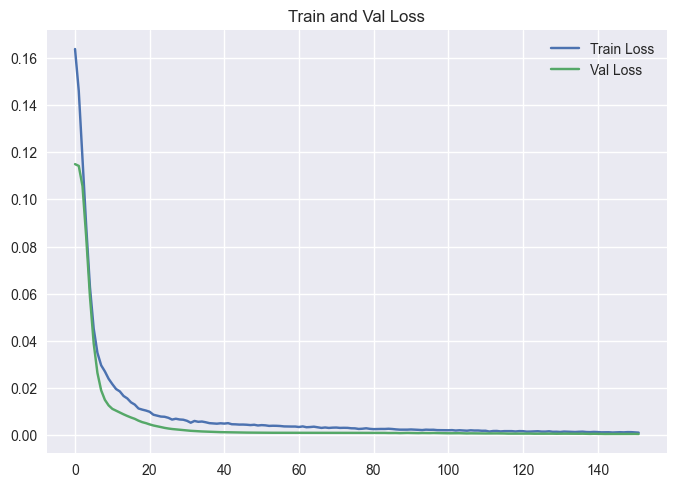

Training iteration: 13/50
Epoch 1/1000
8/8 [==============================] - 2s 76ms/step - loss: 0.0200 - accuracy: 7.0339e-04 - val_loss: 0.0012 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0117 - accuracy: 7.0339e-04 - val_loss: 0.0014 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0064 - accuracy: 0.0050 - val_loss: 0.0026 - val_accuracy: 0.0000e+00
Epoch 4/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0047 - accuracy: 4.5537e-04 - val_loss: 0.0039 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0048 - accuracy: 0.0018 - val_loss: 0.0043 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 11ms/step - loss: 0.0046 - accuracy: 0.0024 - val_loss: 0.0041 - val_accuracy: 0.0000e+00
Epoch 7/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.0041 - accuracy: 0.00

8/8 [==============================] - 0s 9ms/step - loss: 9.1135e-04 - accuracy: 7.0339e-04 - val_loss: 3.5238e-04 - val_accuracy: 0.0000e+00
Epoch 100/1000
8/8 [==============================] - 0s 8ms/step - loss: 7.8261e-04 - accuracy: 0.0018 - val_loss: 4.0528e-04 - val_accuracy: 0.0000e+00
Epoch 101/1000
8/8 [==============================] - 0s 9ms/step - loss: 8.0605e-04 - accuracy: 0.0050 - val_loss: 3.4886e-04 - val_accuracy: 0.0000e+00
Epoch 102/1000
8/8 [==============================] - 0s 8ms/step - loss: 9.3440e-04 - accuracy: 0.0013 - val_loss: 3.6261e-04 - val_accuracy: 0.0000e+00
Epoch 103/1000
8/8 [==============================] - 0s 8ms/step - loss: 7.9807e-04 - accuracy: 0.0024 - val_loss: 3.5640e-04 - val_accuracy: 0.0000e+00
Epoch 104/1000
8/8 [==============================] - 0s 8ms/step - loss: 8.2867e-04 - accuracy: 4.5537e-04 - val_loss: 3.3185e-04 - val_accuracy: 0.0000e+00
Epoch 105/1000
8/8 [==============================] - 0s 8ms/step - loss: 8.9712e-0

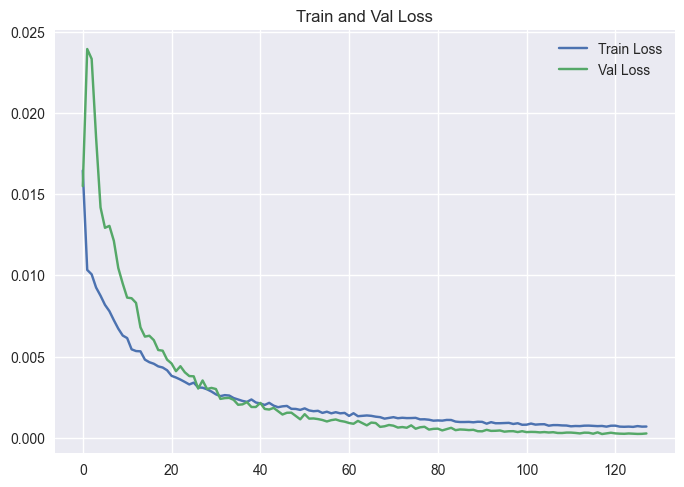

Training iteration: 15/50
Epoch 1/1000
8/8 [==============================] - 2s 75ms/step - loss: 0.0477 - accuracy: 7.0339e-04 - val_loss: 0.0136 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0339 - accuracy: 9.9274e-04 - val_loss: 0.0074 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0224 - accuracy: 9.9274e-04 - val_loss: 0.0034 - val_accuracy: 0.0000e+00
Epoch 4/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0131 - accuracy: 0.0050 - val_loss: 0.0013 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0082 - accuracy: 4.5537e-04 - val_loss: 7.2365e-04 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0048 - accuracy: 9.9274e-04 - val_loss: 9.2564e-04 - val_accuracy: 0.0000e+00
Epoch 7/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0047 - 

8/8 [==============================] - 0s 8ms/step - loss: 0.0051 - accuracy: 0.0013 - val_loss: 0.0024 - val_accuracy: 0.0000e+00
Epoch 27/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0052 - accuracy: 0.0032 - val_loss: 0.0024 - val_accuracy: 0.0000e+00
Epoch 28/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0052 - accuracy: 0.0032 - val_loss: 0.0024 - val_accuracy: 0.0000e+00
Epoch 29/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0052 - accuracy: 4.5537e-04 - val_loss: 0.0024 - val_accuracy: 0.0000e+00
Epoch 30/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0052 - accuracy: 0.0018 - val_loss: 0.0024 - val_accuracy: 0.0000e+00
Training iteration: 21/50
Epoch 1/1000
8/8 [==============================] - 2s 66ms/step - loss: 0.1762 - accuracy: 0.0013 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1574 - accuracy: 0.0013 - val_loss: 0.11

Epoch 52/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0043 - accuracy: 0.0032 - val_loss: 0.0018 - val_accuracy: 0.0000e+00
Epoch 53/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0039 - accuracy: 0.0018 - val_loss: 0.0017 - val_accuracy: 0.0000e+00
Epoch 54/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0044 - accuracy: 7.0339e-04 - val_loss: 0.0016 - val_accuracy: 0.0000e+00
Epoch 55/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0042 - accuracy: 7.0339e-04 - val_loss: 0.0016 - val_accuracy: 0.0000e+00
Epoch 56/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0043 - accuracy: 0.0024 - val_loss: 0.0015 - val_accuracy: 0.0000e+00
Epoch 57/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0040 - accuracy: 0.0032 - val_loss: 0.0014 - val_accuracy: 0.0000e+00
Epoch 58/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0042 - accuracy: 0.0050 - val_loss: 0.0013 - va

Epoch 107/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0019 - accuracy: 0.0013 - val_loss: 5.4901e-04 - val_accuracy: 0.0000e+00
Epoch 108/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0018 - accuracy: 0.0024 - val_loss: 5.5181e-04 - val_accuracy: 0.0000e+00
Epoch 109/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0017 - accuracy: 0.0013 - val_loss: 5.4666e-04 - val_accuracy: 0.0000e+00
Epoch 110/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0019 - accuracy: 0.0032 - val_loss: 5.4235e-04 - val_accuracy: 0.0000e+00
Epoch 111/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0018 - accuracy: 0.0032 - val_loss: 5.3822e-04 - val_accuracy: 0.0000e+00
Epoch 112/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0018 - accuracy: 0.0050 - val_loss: 5.3564e-04 - val_accuracy: 0.0000e+00
Epoch 113/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0017 - accuracy: 0.0013 

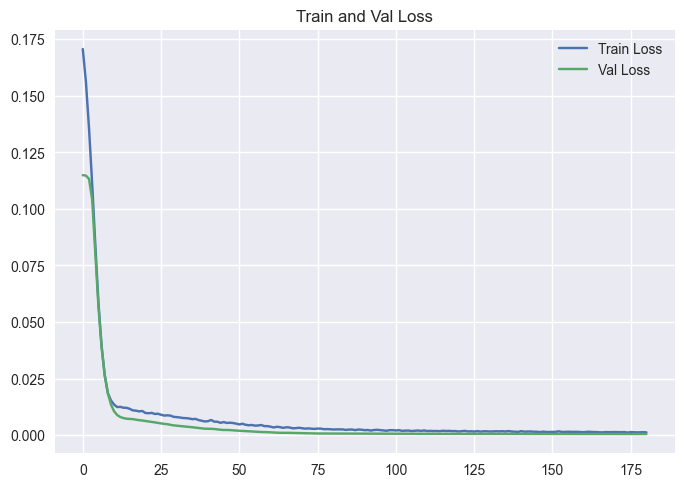

Training iteration: 22/50
Epoch 1/1000
8/8 [==============================] - 2s 68ms/step - loss: 0.1670 - accuracy: 0.0024 - val_loss: 0.1034 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.1404 - accuracy: 9.9274e-04 - val_loss: 0.0752 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0920 - accuracy: 7.0339e-04 - val_loss: 0.0470 - val_accuracy: 0.0000e+00
Epoch 4/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0589 - accuracy: 0.0032 - val_loss: 0.0261 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0398 - accuracy: 0.0032 - val_loss: 0.0133 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0263 - accuracy: 4.5537e-04 - val_loss: 0.0070 - val_accuracy: 0.0000e+00
Epoch 7/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0190 - accuracy: 0.0032

Epoch 57/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.0030 - accuracy: 0.0018 - val_loss: 0.0011 - val_accuracy: 0.0000e+00
Epoch 58/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0034 - accuracy: 0.0050 - val_loss: 0.0011 - val_accuracy: 0.0000e+00
Epoch 59/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.0033 - accuracy: 0.0050 - val_loss: 0.0011 - val_accuracy: 0.0000e+00
Epoch 60/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0028 - accuracy: 0.0050 - val_loss: 0.0010 - val_accuracy: 0.0000e+00
Epoch 61/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.0031 - accuracy: 0.0013 - val_loss: 0.0010 - val_accuracy: 0.0000e+00
Epoch 62/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0032 - accuracy: 0.0013 - val_loss: 0.0011 - val_accuracy: 0.0000e+00
Epoch 63/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0031 - accuracy: 0.0050 - val_loss: 0.0010 - val_acc

Epoch 112/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0021 - accuracy: 0.0018 - val_loss: 6.9816e-04 - val_accuracy: 0.0000e+00
Epoch 113/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0021 - accuracy: 0.0050 - val_loss: 7.1886e-04 - val_accuracy: 0.0000e+00
Epoch 114/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0020 - accuracy: 0.0018 - val_loss: 7.2467e-04 - val_accuracy: 0.0000e+00
Epoch 115/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0020 - accuracy: 0.0024 - val_loss: 7.2494e-04 - val_accuracy: 0.0000e+00
Epoch 116/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0021 - accuracy: 0.0024 - val_loss: 7.0662e-04 - val_accuracy: 0.0000e+00
Epoch 117/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0019 - accuracy: 0.0013 - val_loss: 6.8907e-04 - val_accuracy: 0.0000e+00
Epoch 118/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0021 - accuracy: 0.0024 

Epoch 22/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0081 - accuracy: 0.0024 - val_loss: 0.0022 - val_accuracy: 0.0000e+00
Epoch 23/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0069 - accuracy: 0.0013 - val_loss: 0.0021 - val_accuracy: 0.0000e+00
Epoch 24/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0059 - accuracy: 7.0339e-04 - val_loss: 0.0021 - val_accuracy: 0.0000e+00
Epoch 25/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0055 - accuracy: 0.0032 - val_loss: 0.0021 - val_accuracy: 0.0000e+00
Epoch 26/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0051 - accuracy: 0.0024 - val_loss: 0.0021 - val_accuracy: 0.0000e+00
Epoch 27/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0044 - accuracy: 7.0339e-04 - val_loss: 0.0021 - val_accuracy: 0.0000e+00
Epoch 28/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0046 - accuracy: 0.0024 - val_loss: 0.0021 - va

Epoch 78/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0016 - accuracy: 0.0024 - val_loss: 0.0011 - val_accuracy: 0.0000e+00
Epoch 79/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0017 - accuracy: 0.0018 - val_loss: 0.0011 - val_accuracy: 0.0000e+00
Epoch 80/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0016 - accuracy: 0.0018 - val_loss: 0.0011 - val_accuracy: 0.0000e+00
Epoch 81/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0019 - accuracy: 0.0050 - val_loss: 0.0011 - val_accuracy: 0.0000e+00
Epoch 82/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0015 - accuracy: 9.9274e-04 - val_loss: 0.0010 - val_accuracy: 0.0000e+00
Epoch 83/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0017 - accuracy: 7.0339e-04 - val_loss: 0.0011 - val_accuracy: 0.0000e+00
Epoch 84/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0016 - accuracy: 0.0032 - val_loss: 0.0010 - va

8/8 [==============================] - 0s 8ms/step - loss: 7.6057e-04 - accuracy: 0.0013 - val_loss: 7.2697e-04 - val_accuracy: 0.0000e+00
Epoch 186/1000
8/8 [==============================] - 0s 8ms/step - loss: 8.0602e-04 - accuracy: 7.0339e-04 - val_loss: 7.2157e-04 - val_accuracy: 0.0000e+00
Epoch 187/1000
8/8 [==============================] - 0s 8ms/step - loss: 7.8122e-04 - accuracy: 0.0018 - val_loss: 7.1955e-04 - val_accuracy: 0.0000e+00
Epoch 188/1000
8/8 [==============================] - 0s 8ms/step - loss: 7.5356e-04 - accuracy: 0.0032 - val_loss: 7.1928e-04 - val_accuracy: 0.0000e+00
Epoch 189/1000
8/8 [==============================] - 0s 8ms/step - loss: 7.6930e-04 - accuracy: 0.0018 - val_loss: 7.0972e-04 - val_accuracy: 0.0000e+00
Epoch 190/1000
8/8 [==============================] - 0s 8ms/step - loss: 7.0511e-04 - accuracy: 0.0024 - val_loss: 7.0871e-04 - val_accuracy: 0.0000e+00
Epoch 191/1000
8/8 [==============================] - 0s 8ms/step - loss: 8.6276e-04 - 

Epoch 238/1000
8/8 [==============================] - 0s 8ms/step - loss: 5.5735e-04 - accuracy: 9.9274e-04 - val_loss: 6.5743e-04 - val_accuracy: 0.0000e+00
Epoch 239/1000
8/8 [==============================] - 0s 9ms/step - loss: 6.4069e-04 - accuracy: 0.0013 - val_loss: 6.4009e-04 - val_accuracy: 0.0000e+00
Epoch 240/1000
8/8 [==============================] - 0s 8ms/step - loss: 5.2672e-04 - accuracy: 0.0024 - val_loss: 6.3554e-04 - val_accuracy: 0.0000e+00
Epoch 241/1000
8/8 [==============================] - 0s 8ms/step - loss: 5.6506e-04 - accuracy: 0.0013 - val_loss: 6.3825e-04 - val_accuracy: 0.0000e+00
Epoch 242/1000
8/8 [==============================] - 0s 8ms/step - loss: 6.4254e-04 - accuracy: 0.0024 - val_loss: 6.3049e-04 - val_accuracy: 0.0000e+00
Epoch 243/1000
8/8 [==============================] - 0s 11ms/step - loss: 6.3168e-04 - accuracy: 4.5537e-04 - val_loss: 6.4099e-04 - val_accuracy: 0.0000e+00
Epoch 244/1000
8/8 [==============================] - 0s 8ms/step -

Epoch 343/1000
8/8 [==============================] - 0s 9ms/step - loss: 3.7622e-04 - accuracy: 9.9274e-04 - val_loss: 4.4455e-04 - val_accuracy: 0.0000e+00
Epoch 344/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.8842e-04 - accuracy: 0.0050 - val_loss: 4.4541e-04 - val_accuracy: 0.0000e+00
Epoch 345/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.9827e-04 - accuracy: 0.0024 - val_loss: 4.5108e-04 - val_accuracy: 0.0000e+00
Epoch 346/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.7990e-04 - accuracy: 0.0050 - val_loss: 4.4659e-04 - val_accuracy: 0.0000e+00
Epoch 347/1000
8/8 [==============================] - 0s 9ms/step - loss: 3.6671e-04 - accuracy: 0.0032 - val_loss: 4.6612e-04 - val_accuracy: 0.0000e+00
Epoch 348/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.3985e-04 - accuracy: 9.9274e-04 - val_loss: 4.4602e-04 - val_accuracy: 0.0000e+00
Epoch 349/1000
8/8 [==============================] - 0s 8ms/step - 

Epoch 396/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.1514e-04 - accuracy: 7.0339e-04 - val_loss: 3.5648e-04 - val_accuracy: 0.0000e+00
Epoch 397/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.1676e-04 - accuracy: 7.0339e-04 - val_loss: 3.4638e-04 - val_accuracy: 0.0000e+00
Epoch 398/1000
8/8 [==============================] - 0s 8ms/step - loss: 2.7827e-04 - accuracy: 7.0339e-04 - val_loss: 3.5902e-04 - val_accuracy: 0.0000e+00
Epoch 399/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.2436e-04 - accuracy: 0.0032 - val_loss: 3.4262e-04 - val_accuracy: 0.0000e+00
Epoch 400/1000
8/8 [==============================] - 0s 8ms/step - loss: 2.9466e-04 - accuracy: 0.0032 - val_loss: 3.4406e-04 - val_accuracy: 0.0000e+00
Epoch 401/1000
8/8 [==============================] - 0s 9ms/step - loss: 3.0148e-04 - accuracy: 7.0339e-04 - val_loss: 3.4698e-04 - val_accuracy: 0.0000e+00
Epoch 402/1000
8/8 [==============================] - 0s 8ms

Epoch 501/1000
8/8 [==============================] - 0s 8ms/step - loss: 2.5088e-04 - accuracy: 0.0024 - val_loss: 2.3221e-04 - val_accuracy: 0.0000e+00
Epoch 502/1000
8/8 [==============================] - 0s 8ms/step - loss: 2.1416e-04 - accuracy: 0.0013 - val_loss: 2.2966e-04 - val_accuracy: 0.0000e+00
Epoch 503/1000
8/8 [==============================] - 0s 8ms/step - loss: 2.6086e-04 - accuracy: 0.0018 - val_loss: 2.3596e-04 - val_accuracy: 0.0000e+00
Epoch 504/1000
8/8 [==============================] - 0s 8ms/step - loss: 2.3528e-04 - accuracy: 0.0050 - val_loss: 2.3054e-04 - val_accuracy: 0.0000e+00
Epoch 505/1000
8/8 [==============================] - 0s 9ms/step - loss: 2.4428e-04 - accuracy: 0.0018 - val_loss: 2.3489e-04 - val_accuracy: 0.0000e+00
Epoch 506/1000
8/8 [==============================] - 0s 8ms/step - loss: 2.2984e-04 - accuracy: 9.9274e-04 - val_loss: 2.2638e-04 - val_accuracy: 0.0000e+00
Epoch 507/1000
8/8 [==============================] - 0s 7ms/step - loss

Epoch 554/1000
8/8 [==============================] - 0s 9ms/step - loss: 2.2583e-04 - accuracy: 0.0032 - val_loss: 1.9067e-04 - val_accuracy: 0.0000e+00
Epoch 555/1000
8/8 [==============================] - 0s 8ms/step - loss: 2.2077e-04 - accuracy: 7.0339e-04 - val_loss: 1.9338e-04 - val_accuracy: 0.0000e+00
Epoch 556/1000
8/8 [==============================] - 0s 8ms/step - loss: 2.3613e-04 - accuracy: 4.5537e-04 - val_loss: 1.9637e-04 - val_accuracy: 0.0000e+00
Epoch 557/1000
8/8 [==============================] - 0s 8ms/step - loss: 2.0134e-04 - accuracy: 9.9274e-04 - val_loss: 1.9182e-04 - val_accuracy: 0.0000e+00
Epoch 558/1000
8/8 [==============================] - 0s 9ms/step - loss: 2.0627e-04 - accuracy: 0.0018 - val_loss: 1.9589e-04 - val_accuracy: 0.0000e+00
Epoch 559/1000
8/8 [==============================] - 0s 8ms/step - loss: 2.2054e-04 - accuracy: 7.0339e-04 - val_loss: 1.8743e-04 - val_accuracy: 0.0000e+00
Epoch 560/1000
8/8 [==============================] - 0s 8ms

Epoch 607/1000
8/8 [==============================] - 0s 8ms/step - loss: 2.1494e-04 - accuracy: 0.0032 - val_loss: 1.6415e-04 - val_accuracy: 0.0000e+00
Epoch 608/1000
8/8 [==============================] - 0s 8ms/step - loss: 2.1357e-04 - accuracy: 9.9274e-04 - val_loss: 1.7154e-04 - val_accuracy: 0.0000e+00
Epoch 609/1000
8/8 [==============================] - 0s 8ms/step - loss: 2.0680e-04 - accuracy: 7.0339e-04 - val_loss: 1.6395e-04 - val_accuracy: 0.0000e+00
Epoch 610/1000
8/8 [==============================] - 0s 8ms/step - loss: 2.0356e-04 - accuracy: 0.0013 - val_loss: 1.7193e-04 - val_accuracy: 0.0000e+00
Epoch 611/1000
8/8 [==============================] - 0s 8ms/step - loss: 2.2271e-04 - accuracy: 9.9274e-04 - val_loss: 1.6355e-04 - val_accuracy: 0.0000e+00
Epoch 612/1000
8/8 [==============================] - 0s 8ms/step - loss: 2.1045e-04 - accuracy: 0.0024 - val_loss: 1.7018e-04 - val_accuracy: 0.0000e+00
Epoch 613/1000
8/8 [==============================] - 0s 7ms/ste

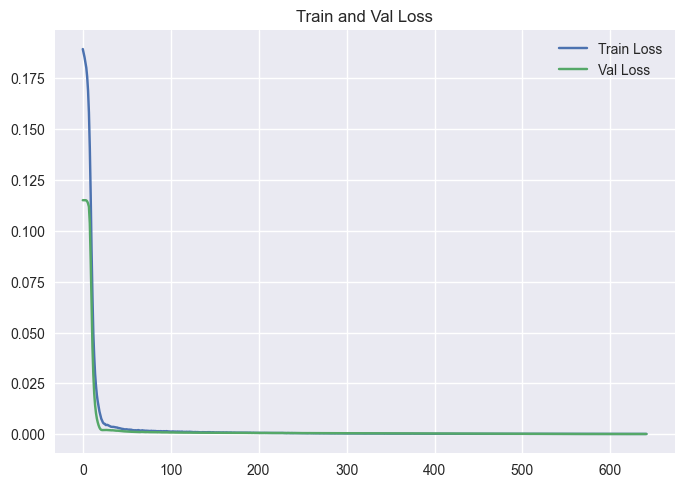

Training iteration: 24/50
Epoch 1/1000
8/8 [==============================] - 2s 68ms/step - loss: 0.1779 - accuracy: 0.0024 - val_loss: 0.1138 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1655 - accuracy: 0.0032 - val_loss: 0.1075 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1333 - accuracy: 0.0018 - val_loss: 0.0879 - val_accuracy: 0.0000e+00
Epoch 4/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1068 - accuracy: 9.9274e-04 - val_loss: 0.0623 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0737 - accuracy: 0.0032 - val_loss: 0.0415 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0529 - accuracy: 4.5537e-04 - val_loss: 0.0270 - val_accuracy: 0.0000e+00
Epoch 7/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0375 - accuracy: 9.9274e-04

8/8 [==============================] - 0s 8ms/step - loss: 0.0017 - accuracy: 7.0339e-04 - val_loss: 5.3114e-04 - val_accuracy: 0.0000e+00
Epoch 111/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0017 - accuracy: 4.5537e-04 - val_loss: 5.3501e-04 - val_accuracy: 0.0000e+00
Epoch 112/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0017 - accuracy: 7.0339e-04 - val_loss: 5.3476e-04 - val_accuracy: 0.0000e+00
Epoch 113/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0017 - accuracy: 0.0024 - val_loss: 5.2959e-04 - val_accuracy: 0.0000e+00
Epoch 114/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0016 - accuracy: 0.0050 - val_loss: 5.2252e-04 - val_accuracy: 0.0000e+00
Epoch 115/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0015 - accuracy: 7.0339e-04 - val_loss: 5.2100e-04 - val_accuracy: 0.0000e+00
Epoch 116/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0016 - accuracy: 0.0032

Epoch 164/1000
8/8 [==============================] - 0s 8ms/step - loss: 8.2581e-04 - accuracy: 7.0339e-04 - val_loss: 3.6382e-04 - val_accuracy: 0.0000e+00
Epoch 165/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0011 - accuracy: 0.0018 - val_loss: 3.5165e-04 - val_accuracy: 0.0000e+00
Epoch 166/1000
8/8 [==============================] - 0s 8ms/step - loss: 9.5802e-04 - accuracy: 0.0013 - val_loss: 3.3860e-04 - val_accuracy: 0.0000e+00
Epoch 167/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0010 - accuracy: 0.0018 - val_loss: 3.3133e-04 - val_accuracy: 0.0000e+00
Epoch 168/1000
8/8 [==============================] - 0s 9ms/step - loss: 8.6075e-04 - accuracy: 9.9274e-04 - val_loss: 3.2648e-04 - val_accuracy: 0.0000e+00
Epoch 169/1000
8/8 [==============================] - 0s 8ms/step - loss: 9.8520e-04 - accuracy: 0.0050 - val_loss: 3.3362e-04 - val_accuracy: 0.0000e+00
Epoch 170/1000
8/8 [==============================] - 0s 8ms/step - loss: 9.

Epoch 217/1000
8/8 [==============================] - 0s 8ms/step - loss: 7.2433e-04 - accuracy: 0.0032 - val_loss: 2.0861e-04 - val_accuracy: 0.0000e+00
Epoch 218/1000
8/8 [==============================] - 0s 8ms/step - loss: 6.8587e-04 - accuracy: 0.0018 - val_loss: 2.0453e-04 - val_accuracy: 0.0000e+00
Epoch 219/1000
8/8 [==============================] - 0s 8ms/step - loss: 7.1341e-04 - accuracy: 0.0013 - val_loss: 2.0380e-04 - val_accuracy: 0.0000e+00
Epoch 220/1000
8/8 [==============================] - 0s 8ms/step - loss: 6.2955e-04 - accuracy: 0.0018 - val_loss: 2.0192e-04 - val_accuracy: 0.0000e+00
Epoch 221/1000
8/8 [==============================] - 0s 8ms/step - loss: 5.9856e-04 - accuracy: 7.0339e-04 - val_loss: 2.0055e-04 - val_accuracy: 0.0000e+00
Epoch 222/1000
8/8 [==============================] - 0s 10ms/step - loss: 6.8864e-04 - accuracy: 0.0013 - val_loss: 1.9879e-04 - val_accuracy: 0.0000e+00
Epoch 223/1000
8/8 [==============================] - 0s 8ms/step - los

Epoch 270/1000
8/8 [==============================] - 0s 8ms/step - loss: 4.9380e-04 - accuracy: 0.0013 - val_loss: 1.4843e-04 - val_accuracy: 0.0000e+00
Epoch 271/1000
8/8 [==============================] - 0s 10ms/step - loss: 4.7950e-04 - accuracy: 0.0018 - val_loss: 1.4711e-04 - val_accuracy: 0.0000e+00
Epoch 272/1000
8/8 [==============================] - 0s 8ms/step - loss: 4.6270e-04 - accuracy: 0.0050 - val_loss: 1.4470e-04 - val_accuracy: 0.0000e+00
Epoch 273/1000
8/8 [==============================] - 0s 8ms/step - loss: 5.5382e-04 - accuracy: 0.0024 - val_loss: 1.4572e-04 - val_accuracy: 0.0000e+00
Epoch 274/1000
8/8 [==============================] - 0s 8ms/step - loss: 4.9253e-04 - accuracy: 0.0013 - val_loss: 1.4404e-04 - val_accuracy: 0.0000e+00
Epoch 275/1000
8/8 [==============================] - 0s 8ms/step - loss: 4.9140e-04 - accuracy: 7.0339e-04 - val_loss: 1.4257e-04 - val_accuracy: 0.0000e+00
Epoch 276/1000
8/8 [==============================] - 0s 8ms/step - los

Epoch 375/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.2482e-04 - accuracy: 0.0013 - val_loss: 1.0361e-04 - val_accuracy: 0.0000e+00
Epoch 376/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.3224e-04 - accuracy: 9.9274e-04 - val_loss: 1.0496e-04 - val_accuracy: 0.0000e+00
Epoch 377/1000
8/8 [==============================] - 0s 9ms/step - loss: 3.5436e-04 - accuracy: 0.0032 - val_loss: 1.0241e-04 - val_accuracy: 0.0000e+00
Epoch 378/1000
8/8 [==============================] - 0s 9ms/step - loss: 3.6586e-04 - accuracy: 9.9274e-04 - val_loss: 1.0592e-04 - val_accuracy: 0.0000e+00
Epoch 379/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.3498e-04 - accuracy: 0.0032 - val_loss: 1.0319e-04 - val_accuracy: 0.0000e+00
Epoch 380/1000
8/8 [==============================] - 0s 9ms/step - loss: 3.3579e-04 - accuracy: 0.0018 - val_loss: 1.0714e-04 - val_accuracy: 0.0000e+00
Epoch 381/1000
8/8 [==============================] - 0s 8ms/step - 

Epoch 428/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.0030e-04 - accuracy: 0.0018 - val_loss: 9.3606e-05 - val_accuracy: 0.0000e+00
Epoch 429/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.1918e-04 - accuracy: 0.0032 - val_loss: 9.7274e-05 - val_accuracy: 0.0000e+00
Epoch 430/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.0799e-04 - accuracy: 9.9274e-04 - val_loss: 9.3344e-05 - val_accuracy: 0.0000e+00
Epoch 431/1000
8/8 [==============================] - 0s 8ms/step - loss: 2.8501e-04 - accuracy: 0.0018 - val_loss: 9.8614e-05 - val_accuracy: 0.0000e+00
Epoch 432/1000
8/8 [==============================] - 0s 7ms/step - loss: 2.6590e-04 - accuracy: 0.0018 - val_loss: 9.3269e-05 - val_accuracy: 0.0000e+00
Epoch 433/1000
8/8 [==============================] - 0s 8ms/step - loss: 2.6314e-04 - accuracy: 0.0024 - val_loss: 9.9535e-05 - val_accuracy: 0.0000e+00
Epoch 434/1000
8/8 [==============================] - 0s 7ms/step - loss

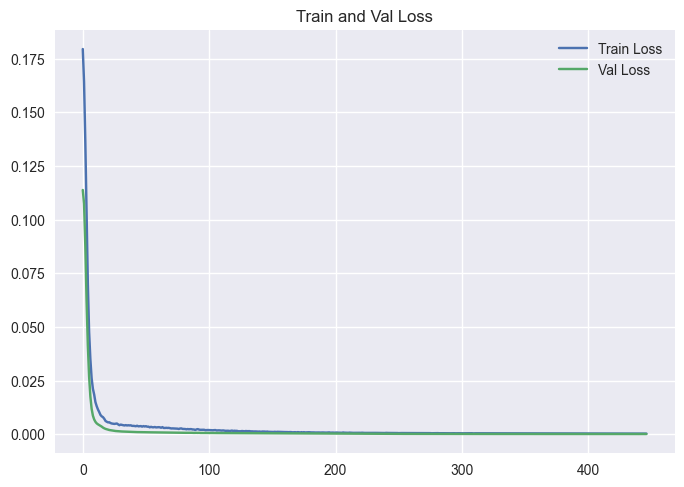

Training iteration: 25/50
Epoch 1/1000
8/8 [==============================] - 2s 69ms/step - loss: 0.2044 - accuracy: 7.0339e-04 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1910 - accuracy: 0.0032 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1871 - accuracy: 0.0018 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 4/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.1875 - accuracy: 0.0013 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1954 - accuracy: 0.0050 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1936 - accuracy: 7.0339e-04 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 7/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.2037 - accuracy: 9.9274e-04

8/8 [==============================] - 0s 8ms/step - loss: 0.0042 - accuracy: 9.9274e-04 - val_loss: 0.0010 - val_accuracy: 0.0000e+00
Epoch 58/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0046 - accuracy: 0.0024 - val_loss: 0.0010 - val_accuracy: 0.0000e+00
Epoch 59/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0040 - accuracy: 7.0339e-04 - val_loss: 0.0010 - val_accuracy: 0.0000e+00
Epoch 60/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0042 - accuracy: 0.0013 - val_loss: 9.7923e-04 - val_accuracy: 0.0000e+00
Epoch 61/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0043 - accuracy: 0.0050 - val_loss: 9.8107e-04 - val_accuracy: 0.0000e+00
Epoch 62/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0039 - accuracy: 0.0024 - val_loss: 9.9419e-04 - val_accuracy: 0.0000e+00
Epoch 63/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0040 - accuracy: 0.0032 - val_loss: 9.3501e-04 - 

8/8 [==============================] - 0s 8ms/step - loss: 0.0010 - accuracy: 0.0024 - val_loss: 2.4188e-04 - val_accuracy: 0.0000e+00
Epoch 166/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.0010 - accuracy: 0.0018 - val_loss: 2.3793e-04 - val_accuracy: 0.0000e+00
Epoch 167/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0011 - accuracy: 0.0018 - val_loss: 2.3946e-04 - val_accuracy: 0.0000e+00
Epoch 168/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0010 - accuracy: 0.0032 - val_loss: 2.3365e-04 - val_accuracy: 0.0000e+00
Epoch 169/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0010 - accuracy: 0.0032 - val_loss: 2.3213e-04 - val_accuracy: 0.0000e+00
Epoch 170/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0011 - accuracy: 0.0032 - val_loss: 2.4036e-04 - val_accuracy: 0.0000e+00
Epoch 171/1000
8/8 [==============================] - 0s 8ms/step - loss: 9.5580e-04 - accuracy: 0.0018 - val_loss

Epoch 271/1000
8/8 [==============================] - 0s 8ms/step - loss: 5.1901e-04 - accuracy: 0.0032 - val_loss: 1.4103e-04 - val_accuracy: 0.0000e+00
Epoch 272/1000
8/8 [==============================] - 0s 8ms/step - loss: 5.6567e-04 - accuracy: 0.0024 - val_loss: 1.3931e-04 - val_accuracy: 0.0000e+00
Epoch 273/1000
8/8 [==============================] - 0s 9ms/step - loss: 5.6852e-04 - accuracy: 0.0032 - val_loss: 1.4023e-04 - val_accuracy: 0.0000e+00
Epoch 274/1000
8/8 [==============================] - 0s 8ms/step - loss: 5.7614e-04 - accuracy: 0.0013 - val_loss: 1.3880e-04 - val_accuracy: 0.0000e+00
Epoch 275/1000
8/8 [==============================] - 0s 8ms/step - loss: 5.6478e-04 - accuracy: 0.0013 - val_loss: 1.3809e-04 - val_accuracy: 0.0000e+00
Epoch 276/1000
8/8 [==============================] - 0s 8ms/step - loss: 5.8839e-04 - accuracy: 0.0024 - val_loss: 1.3717e-04 - val_accuracy: 0.0000e+00
Epoch 277/1000
8/8 [==============================] - 0s 8ms/step - loss: 5.

Epoch 324/1000
8/8 [==============================] - 0s 10ms/step - loss: 4.9483e-04 - accuracy: 0.0024 - val_loss: 1.2284e-04 - val_accuracy: 0.0000e+00
Epoch 325/1000
8/8 [==============================] - 0s 8ms/step - loss: 4.9168e-04 - accuracy: 0.0013 - val_loss: 1.2290e-04 - val_accuracy: 0.0000e+00
Epoch 326/1000
8/8 [==============================] - 0s 9ms/step - loss: 4.2884e-04 - accuracy: 0.0018 - val_loss: 1.2147e-04 - val_accuracy: 0.0000e+00
Epoch 327/1000
8/8 [==============================] - 0s 8ms/step - loss: 5.3162e-04 - accuracy: 0.0013 - val_loss: 1.2076e-04 - val_accuracy: 0.0000e+00
Epoch 328/1000
8/8 [==============================] - 0s 8ms/step - loss: 4.7974e-04 - accuracy: 0.0018 - val_loss: 1.2012e-04 - val_accuracy: 0.0000e+00
Epoch 329/1000
8/8 [==============================] - 0s 8ms/step - loss: 4.4477e-04 - accuracy: 9.9274e-04 - val_loss: 1.2071e-04 - val_accuracy: 0.0000e+00
Epoch 330/1000
8/8 [==============================] - 0s 8ms/step - los

Epoch 377/1000
8/8 [==============================] - 0s 8ms/step - loss: 4.5704e-04 - accuracy: 0.0032 - val_loss: 1.1135e-04 - val_accuracy: 0.0000e+00
Epoch 378/1000
8/8 [==============================] - 0s 9ms/step - loss: 4.2062e-04 - accuracy: 0.0050 - val_loss: 1.1046e-04 - val_accuracy: 0.0000e+00
Epoch 379/1000
8/8 [==============================] - 0s 8ms/step - loss: 4.4518e-04 - accuracy: 0.0050 - val_loss: 1.1052e-04 - val_accuracy: 0.0000e+00
Epoch 380/1000
8/8 [==============================] - 0s 8ms/step - loss: 4.3157e-04 - accuracy: 0.0024 - val_loss: 1.1309e-04 - val_accuracy: 0.0000e+00
Epoch 381/1000
8/8 [==============================] - 0s 9ms/step - loss: 4.1695e-04 - accuracy: 0.0032 - val_loss: 1.1063e-04 - val_accuracy: 0.0000e+00
Epoch 382/1000
8/8 [==============================] - 0s 8ms/step - loss: 4.0787e-04 - accuracy: 0.0050 - val_loss: 1.1288e-04 - val_accuracy: 0.0000e+00
Epoch 383/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.

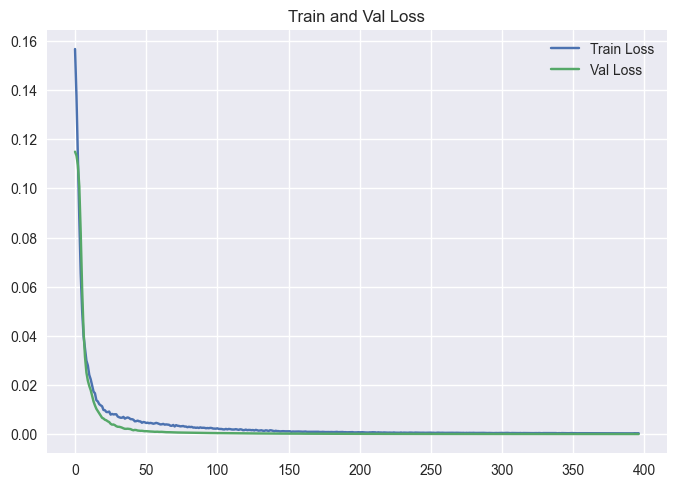

Training iteration: 29/50
Epoch 1/1000
8/8 [==============================] - 2s 81ms/step - loss: 0.1887 - accuracy: 0.0024 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.1948 - accuracy: 4.5537e-04 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.1959 - accuracy: 0.0050 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 4/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.1950 - accuracy: 0.0024 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.1962 - accuracy: 0.0050 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.1966 - accuracy: 0.0024 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 7/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.1838 - accuracy: 4.5537e-04 -

8/8 [==============================] - 0s 8ms/step - loss: 0.0024 - accuracy: 4.5537e-04 - val_loss: 5.3257e-04 - val_accuracy: 0.0000e+00
Epoch 52/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0021 - accuracy: 4.5537e-04 - val_loss: 5.2676e-04 - val_accuracy: 0.0000e+00
Epoch 53/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0022 - accuracy: 0.0050 - val_loss: 5.0449e-04 - val_accuracy: 0.0000e+00
Epoch 54/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0020 - accuracy: 0.0024 - val_loss: 5.0209e-04 - val_accuracy: 0.0000e+00
Epoch 55/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0021 - accuracy: 7.0339e-04 - val_loss: 4.8279e-04 - val_accuracy: 0.0000e+00
Epoch 56/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0021 - accuracy: 0.0032 - val_loss: 4.7242e-04 - val_accuracy: 0.0000e+00
Epoch 57/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0021 - accuracy: 0.0024 - val_los

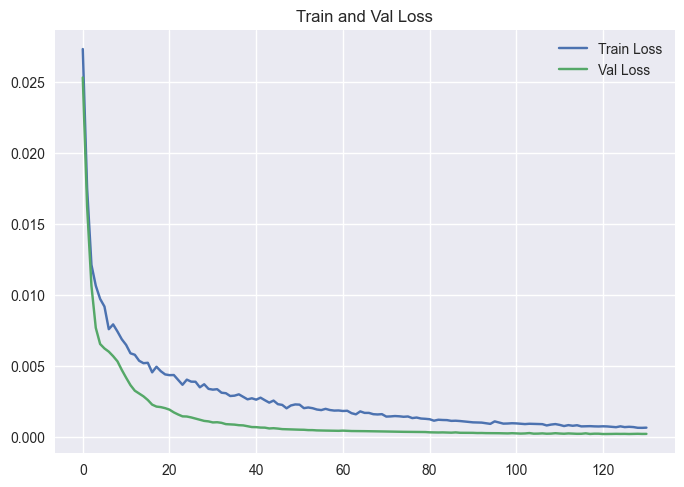

Training iteration: 33/50
Epoch 1/1000
8/8 [==============================] - 2s 66ms/step - loss: 0.1940 - accuracy: 0.0013 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1899 - accuracy: 9.9274e-04 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1940 - accuracy: 4.5537e-04 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 4/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.2034 - accuracy: 0.0050 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1915 - accuracy: 7.0339e-04 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1872 - accuracy: 0.0018 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 7/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.1989 - accuracy: 0.0018

Epoch 46/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0040 - accuracy: 0.0024 - val_loss: 0.0017 - val_accuracy: 0.0000e+00
Epoch 47/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0038 - accuracy: 0.0032 - val_loss: 0.0017 - val_accuracy: 0.0000e+00
Epoch 48/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0039 - accuracy: 0.0024 - val_loss: 0.0016 - val_accuracy: 0.0000e+00
Epoch 49/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0041 - accuracy: 9.9274e-04 - val_loss: 0.0016 - val_accuracy: 0.0000e+00
Epoch 50/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0039 - accuracy: 9.9274e-04 - val_loss: 0.0016 - val_accuracy: 0.0000e+00
Epoch 51/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0039 - accuracy: 0.0024 - val_loss: 0.0016 - val_accuracy: 0.0000e+00
Epoch 52/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0036 - accuracy: 0.0018 - val_loss: 0.0016 - va

Epoch 102/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0022 - accuracy: 9.9274e-04 - val_loss: 0.0010 - val_accuracy: 0.0000e+00
Epoch 103/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0022 - accuracy: 0.0013 - val_loss: 0.0010 - val_accuracy: 0.0000e+00
Epoch 104/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0022 - accuracy: 0.0024 - val_loss: 9.5871e-04 - val_accuracy: 0.0000e+00
Epoch 105/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0021 - accuracy: 4.5537e-04 - val_loss: 9.5186e-04 - val_accuracy: 0.0000e+00
Epoch 106/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0022 - accuracy: 0.0024 - val_loss: 9.8622e-04 - val_accuracy: 0.0000e+00
Epoch 107/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0024 - accuracy: 0.0018 - val_loss: 9.9063e-04 - val_accuracy: 0.0000e+00
Epoch 108/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0020 - accuracy: 0.0018 

Epoch 210/1000
8/8 [==============================] - 0s 9ms/step - loss: 8.0775e-04 - accuracy: 0.0018 - val_loss: 4.0945e-04 - val_accuracy: 0.0000e+00
Epoch 211/1000
8/8 [==============================] - 0s 7ms/step - loss: 7.8253e-04 - accuracy: 0.0018 - val_loss: 3.9885e-04 - val_accuracy: 0.0000e+00
Epoch 212/1000
8/8 [==============================] - 0s 8ms/step - loss: 9.4866e-04 - accuracy: 9.9274e-04 - val_loss: 3.9616e-04 - val_accuracy: 0.0000e+00
Epoch 213/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0011 - accuracy: 7.0339e-04 - val_loss: 3.8918e-04 - val_accuracy: 0.0000e+00
Epoch 214/1000
8/8 [==============================] - 0s 8ms/step - loss: 8.1551e-04 - accuracy: 0.0018 - val_loss: 3.8859e-04 - val_accuracy: 0.0000e+00
Epoch 215/1000
8/8 [==============================] - 0s 8ms/step - loss: 8.8545e-04 - accuracy: 7.0339e-04 - val_loss: 3.8200e-04 - val_accuracy: 0.0000e+00
Epoch 216/1000
8/8 [==============================] - 0s 8ms/step - 

Epoch 263/1000
8/8 [==============================] - 0s 9ms/step - loss: 6.4723e-04 - accuracy: 7.0339e-04 - val_loss: 2.6156e-04 - val_accuracy: 0.0000e+00
Epoch 264/1000
8/8 [==============================] - 0s 8ms/step - loss: 6.5614e-04 - accuracy: 9.9274e-04 - val_loss: 2.5505e-04 - val_accuracy: 0.0000e+00
Epoch 265/1000
8/8 [==============================] - 0s 8ms/step - loss: 6.5561e-04 - accuracy: 7.0339e-04 - val_loss: 2.5697e-04 - val_accuracy: 0.0000e+00
Epoch 266/1000
8/8 [==============================] - 0s 9ms/step - loss: 6.2854e-04 - accuracy: 0.0032 - val_loss: 2.5609e-04 - val_accuracy: 0.0000e+00
Epoch 267/1000
8/8 [==============================] - 0s 8ms/step - loss: 6.2437e-04 - accuracy: 7.0339e-04 - val_loss: 2.6058e-04 - val_accuracy: 0.0000e+00
Epoch 268/1000
8/8 [==============================] - 0s 8ms/step - loss: 5.4669e-04 - accuracy: 4.5537e-04 - val_loss: 2.6798e-04 - val_accuracy: 0.0000e+00
Epoch 269/1000
8/8 [==============================] - 0s

Epoch 368/1000
8/8 [==============================] - 0s 8ms/step - loss: 4.7946e-04 - accuracy: 7.0339e-04 - val_loss: 1.9017e-04 - val_accuracy: 0.0000e+00
Epoch 369/1000
8/8 [==============================] - 0s 11ms/step - loss: 3.8327e-04 - accuracy: 9.9274e-04 - val_loss: 1.7800e-04 - val_accuracy: 0.0000e+00
Epoch 370/1000
8/8 [==============================] - 0s 8ms/step - loss: 4.6960e-04 - accuracy: 0.0032 - val_loss: 1.8034e-04 - val_accuracy: 0.0000e+00
Epoch 371/1000
8/8 [==============================] - 0s 8ms/step - loss: 4.1494e-04 - accuracy: 0.0032 - val_loss: 1.7641e-04 - val_accuracy: 0.0000e+00
Epoch 372/1000
8/8 [==============================] - 0s 8ms/step - loss: 4.8295e-04 - accuracy: 0.0050 - val_loss: 1.8150e-04 - val_accuracy: 0.0000e+00
Epoch 373/1000
8/8 [==============================] - 0s 8ms/step - loss: 4.8371e-04 - accuracy: 0.0032 - val_loss: 1.8075e-04 - val_accuracy: 0.0000e+00
Epoch 374/1000
8/8 [==============================] - 0s 8ms/step -

Epoch 421/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.7465e-04 - accuracy: 0.0018 - val_loss: 1.5634e-04 - val_accuracy: 0.0000e+00
Epoch 422/1000
8/8 [==============================] - 0s 8ms/step - loss: 4.1822e-04 - accuracy: 0.0013 - val_loss: 1.5548e-04 - val_accuracy: 0.0000e+00
Epoch 423/1000
8/8 [==============================] - 0s 10ms/step - loss: 3.2352e-04 - accuracy: 9.9274e-04 - val_loss: 1.5095e-04 - val_accuracy: 0.0000e+00
Epoch 424/1000
8/8 [==============================] - 0s 8ms/step - loss: 4.7786e-04 - accuracy: 4.5537e-04 - val_loss: 1.5130e-04 - val_accuracy: 0.0000e+00
Epoch 425/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.8598e-04 - accuracy: 0.0032 - val_loss: 1.5352e-04 - val_accuracy: 0.0000e+00
Epoch 426/1000
8/8 [==============================] - 0s 9ms/step - loss: 3.8757e-04 - accuracy: 7.0339e-04 - val_loss: 1.5064e-04 - val_accuracy: 0.0000e+00
Epoch 427/1000
8/8 [==============================] - 0s 8ms/st

Epoch 526/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.2298e-04 - accuracy: 9.9274e-04 - val_loss: 1.1896e-04 - val_accuracy: 0.0000e+00
Epoch 527/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.1076e-04 - accuracy: 0.0018 - val_loss: 1.2221e-04 - val_accuracy: 0.0000e+00
Epoch 528/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.3089e-04 - accuracy: 7.0339e-04 - val_loss: 1.1776e-04 - val_accuracy: 0.0000e+00
Epoch 529/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.2491e-04 - accuracy: 7.0339e-04 - val_loss: 1.2068e-04 - val_accuracy: 0.0000e+00
Epoch 530/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.2600e-04 - accuracy: 7.0339e-04 - val_loss: 1.1850e-04 - val_accuracy: 0.0000e+00
Epoch 531/1000
8/8 [==============================] - 0s 7ms/step - loss: 3.2024e-04 - accuracy: 0.0024 - val_loss: 1.2018e-04 - val_accuracy: 0.0000e+00
Epoch 532/1000
8/8 [==============================] - 0s 8ms

Epoch 579/1000
8/8 [==============================] - 0s 9ms/step - loss: 3.0162e-04 - accuracy: 0.0024 - val_loss: 1.0854e-04 - val_accuracy: 0.0000e+00
Epoch 580/1000
8/8 [==============================] - 0s 10ms/step - loss: 3.4367e-04 - accuracy: 0.0032 - val_loss: 1.0820e-04 - val_accuracy: 0.0000e+00
Epoch 581/1000
8/8 [==============================] - 0s 8ms/step - loss: 2.9395e-04 - accuracy: 9.9274e-04 - val_loss: 1.3514e-04 - val_accuracy: 0.0000e+00
Epoch 582/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.3124e-04 - accuracy: 7.0339e-04 - val_loss: 1.0773e-04 - val_accuracy: 0.0000e+00
Epoch 583/1000
8/8 [==============================] - 0s 7ms/step - loss: 3.2295e-04 - accuracy: 0.0018 - val_loss: 1.0707e-04 - val_accuracy: 0.0000e+00
Epoch 584/1000
8/8 [==============================] - 0s 8ms/step - loss: 2.5075e-04 - accuracy: 4.5537e-04 - val_loss: 1.3515e-04 - val_accuracy: 0.0000e+00
Epoch 585/1000
8/8 [==============================] - 0s 8ms/st

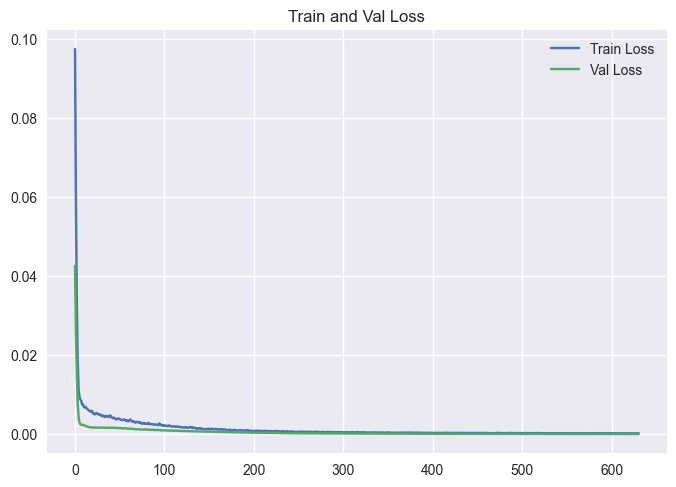

Training iteration: 38/50
Epoch 1/1000
8/8 [==============================] - 2s 65ms/step - loss: 0.1706 - accuracy: 7.0339e-04 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1448 - accuracy: 0.0018 - val_loss: 0.1135 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1098 - accuracy: 0.0050 - val_loss: 0.1060 - val_accuracy: 0.0000e+00
Epoch 4/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0776 - accuracy: 0.0000e+00 - val_loss: 0.0810 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0505 - accuracy: 0.0000e+00 - val_loss: 0.0557 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0383 - accuracy: 0.0000e+00 - val_loss: 0.0384 - val_accuracy: 0.0000e+00
Epoch 7/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0281 - accuracy: 0.

8/8 [==============================] - 0s 8ms/step - loss: 0.0019 - accuracy: 9.9274e-04 - val_loss: 4.6916e-04 - val_accuracy: 0.0000e+00
Epoch 57/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0018 - accuracy: 0.0032 - val_loss: 4.7873e-04 - val_accuracy: 0.0000e+00
Epoch 58/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0019 - accuracy: 0.0013 - val_loss: 4.5901e-04 - val_accuracy: 0.0000e+00
Epoch 59/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0018 - accuracy: 9.9274e-04 - val_loss: 4.3949e-04 - val_accuracy: 0.0000e+00
Epoch 60/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0020 - accuracy: 0.0050 - val_loss: 4.3970e-04 - val_accuracy: 0.0000e+00
Epoch 61/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0018 - accuracy: 0.0032 - val_loss: 4.2931e-04 - val_accuracy: 0.0000e+00
Epoch 62/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.0018 - accuracy: 0.0024 - val_loss: 

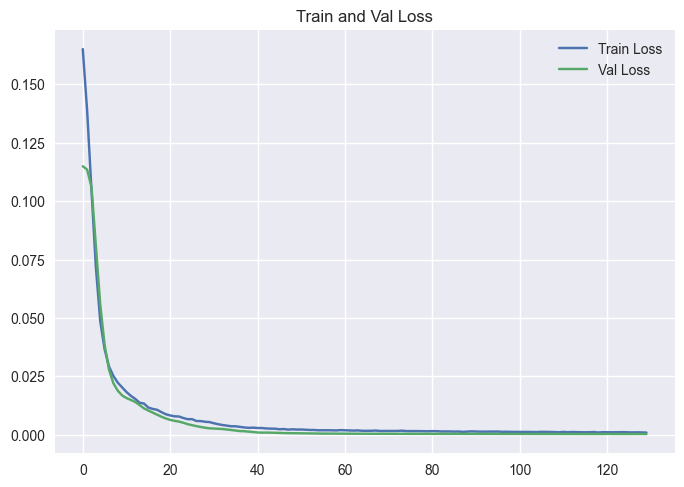

Training iteration: 39/50
Epoch 1/1000
8/8 [==============================] - 2s 70ms/step - loss: 0.0430 - accuracy: 0.0050 - val_loss: 0.0065 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0278 - accuracy: 0.0032 - val_loss: 0.0020 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0158 - accuracy: 7.0339e-04 - val_loss: 6.0631e-04 - val_accuracy: 0.0000e+00
Epoch 4/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0109 - accuracy: 0.0018 - val_loss: 0.0011 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0085 - accuracy: 0.0018 - val_loss: 0.0021 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.0085 - accuracy: 4.5537e-04 - val_loss: 0.0028 - val_accuracy: 0.0000e+00
Epoch 7/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0080 - accuracy: 0.001

8/8 [==============================] - 0s 8ms/step - loss: 6.6668e-04 - accuracy: 4.5537e-04 - val_loss: 3.3496e-04 - val_accuracy: 0.0000e+00
Epoch 87/1000
8/8 [==============================] - 0s 8ms/step - loss: 7.2600e-04 - accuracy: 0.0032 - val_loss: 3.2612e-04 - val_accuracy: 0.0000e+00
Epoch 88/1000
8/8 [==============================] - 0s 8ms/step - loss: 7.2162e-04 - accuracy: 0.0050 - val_loss: 3.2477e-04 - val_accuracy: 0.0000e+00
Epoch 89/1000
8/8 [==============================] - 0s 9ms/step - loss: 7.1304e-04 - accuracy: 9.9274e-04 - val_loss: 3.2038e-04 - val_accuracy: 0.0000e+00
Epoch 90/1000
8/8 [==============================] - 0s 8ms/step - loss: 7.3299e-04 - accuracy: 0.0032 - val_loss: 3.1427e-04 - val_accuracy: 0.0000e+00
Epoch 91/1000
8/8 [==============================] - 0s 8ms/step - loss: 6.2334e-04 - accuracy: 4.5537e-04 - val_loss: 3.3216e-04 - val_accuracy: 0.0000e+00
Epoch 92/1000
8/8 [==============================] - 0s 8ms/step - loss: 7.4518e-04 

8/8 [==============================] - 0s 8ms/step - loss: 5.3573e-04 - accuracy: 0.0032 - val_loss: 2.5000e-04 - val_accuracy: 0.0000e+00
Epoch 140/1000
8/8 [==============================] - 0s 8ms/step - loss: 4.6399e-04 - accuracy: 9.9274e-04 - val_loss: 2.4508e-04 - val_accuracy: 0.0000e+00
Epoch 141/1000
8/8 [==============================] - 0s 8ms/step - loss: 4.5570e-04 - accuracy: 0.0024 - val_loss: 2.5714e-04 - val_accuracy: 0.0000e+00
Epoch 142/1000
8/8 [==============================] - 0s 8ms/step - loss: 4.6524e-04 - accuracy: 0.0018 - val_loss: 2.3540e-04 - val_accuracy: 0.0000e+00
Epoch 143/1000
8/8 [==============================] - 0s 8ms/step - loss: 5.0159e-04 - accuracy: 9.9274e-04 - val_loss: 2.3162e-04 - val_accuracy: 0.0000e+00
Epoch 144/1000
8/8 [==============================] - 0s 8ms/step - loss: 4.1799e-04 - accuracy: 0.0013 - val_loss: 2.5445e-04 - val_accuracy: 0.0000e+00
Epoch 145/1000
8/8 [==============================] - 0s 10ms/step - loss: 4.8075e-

Epoch 192/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.7571e-04 - accuracy: 9.9274e-04 - val_loss: 1.9740e-04 - val_accuracy: 0.0000e+00
Epoch 193/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.9027e-04 - accuracy: 9.9274e-04 - val_loss: 2.1288e-04 - val_accuracy: 0.0000e+00
Epoch 194/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.9825e-04 - accuracy: 0.0032 - val_loss: 1.9401e-04 - val_accuracy: 0.0000e+00
Epoch 195/1000
8/8 [==============================] - 0s 8ms/step - loss: 4.1778e-04 - accuracy: 0.0050 - val_loss: 1.9886e-04 - val_accuracy: 0.0000e+00
Epoch 196/1000
8/8 [==============================] - 0s 7ms/step - loss: 3.8058e-04 - accuracy: 4.5537e-04 - val_loss: 1.9779e-04 - val_accuracy: 0.0000e+00
Epoch 197/1000
8/8 [==============================] - 0s 9ms/step - loss: 3.8212e-04 - accuracy: 4.5537e-04 - val_loss: 1.9719e-04 - val_accuracy: 0.0000e+00
Epoch 198/1000
8/8 [==============================] - 0s 8ms

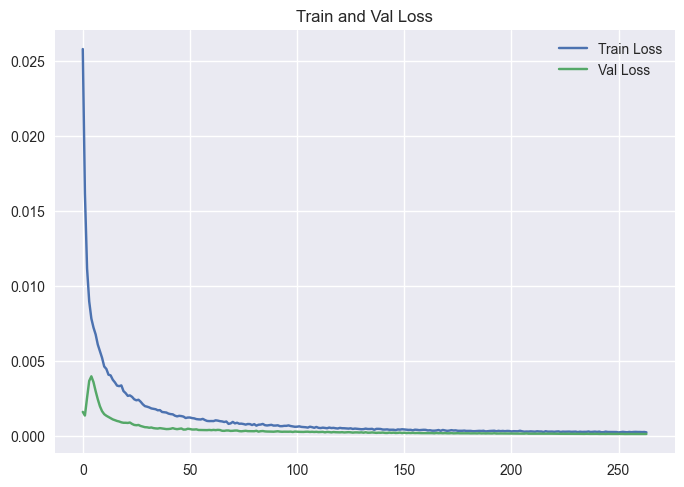

Training iteration: 42/50
Epoch 1/1000
8/8 [==============================] - 2s 70ms/step - loss: 0.1275 - accuracy: 0.0013 - val_loss: 0.0769 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0955 - accuracy: 9.9274e-04 - val_loss: 0.0573 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.0713 - accuracy: 0.0013 - val_loss: 0.0416 - val_accuracy: 0.0000e+00
Epoch 4/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0561 - accuracy: 0.0024 - val_loss: 0.0299 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0384 - accuracy: 7.0339e-04 - val_loss: 0.0212 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0307 - accuracy: 7.0339e-04 - val_loss: 0.0152 - val_accuracy: 0.0000e+00
Epoch 7/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0257 - accuracy: 4.553

8/8 [==============================] - 0s 8ms/step - loss: 0.0017 - accuracy: 7.0339e-04 - val_loss: 5.3038e-04 - val_accuracy: 0.0000e+00
Epoch 57/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0017 - accuracy: 0.0032 - val_loss: 5.3067e-04 - val_accuracy: 0.0000e+00
Epoch 58/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0015 - accuracy: 7.0339e-04 - val_loss: 5.1804e-04 - val_accuracy: 0.0000e+00
Epoch 59/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0015 - accuracy: 0.0050 - val_loss: 5.1012e-04 - val_accuracy: 0.0000e+00
Epoch 60/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0016 - accuracy: 0.0018 - val_loss: 5.0290e-04 - val_accuracy: 0.0000e+00
Epoch 61/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0015 - accuracy: 7.0339e-04 - val_loss: 5.0717e-04 - val_accuracy: 0.0000e+00
Epoch 62/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0015 - accuracy: 0.0050 - val_los

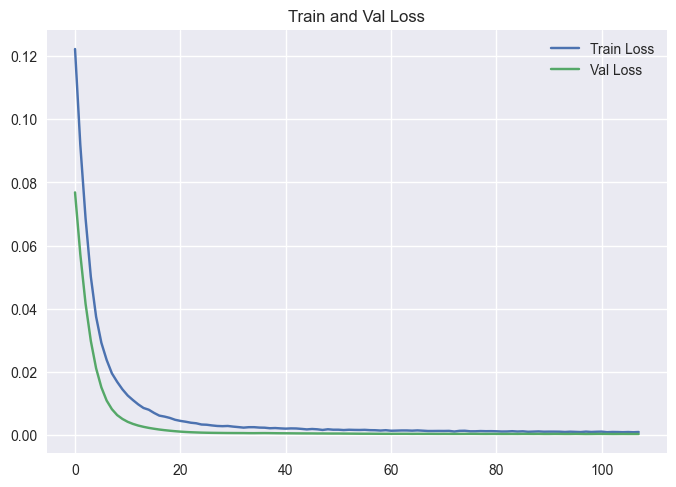

Training iteration: 43/50
Epoch 1/1000
8/8 [==============================] - 3s 67ms/step - loss: 0.1909 - accuracy: 0.0024 - val_loss: 0.0993 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1852 - accuracy: 0.0013 - val_loss: 0.0815 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1704 - accuracy: 7.0339e-04 - val_loss: 0.0635 - val_accuracy: 0.0000e+00
Epoch 4/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1557 - accuracy: 0.0024 - val_loss: 0.0468 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1251 - accuracy: 0.0013 - val_loss: 0.0327 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0965 - accuracy: 0.0050 - val_loss: 0.0218 - val_accuracy: 0.0000e+00
Epoch 7/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0744 - accuracy: 0.0032 - val_l

8/8 [==============================] - 0s 8ms/step - loss: 0.0012 - accuracy: 0.0050 - val_loss: 8.7101e-04 - val_accuracy: 0.0000e+00
Epoch 89/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0013 - accuracy: 0.0024 - val_loss: 8.4376e-04 - val_accuracy: 0.0000e+00
Epoch 90/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0011 - accuracy: 0.0013 - val_loss: 8.6576e-04 - val_accuracy: 0.0000e+00
Epoch 91/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0012 - accuracy: 0.0024 - val_loss: 8.8814e-04 - val_accuracy: 0.0000e+00
Epoch 92/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0013 - accuracy: 0.0024 - val_loss: 8.9159e-04 - val_accuracy: 0.0000e+00
Epoch 93/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0012 - accuracy: 0.0013 - val_loss: 8.4841e-04 - val_accuracy: 0.0000e+00
Epoch 94/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0012 - accuracy: 7.0339e-04 - val_loss: 8.485

Epoch 142/1000
8/8 [==============================] - 0s 8ms/step - loss: 7.7519e-04 - accuracy: 7.0339e-04 - val_loss: 6.7185e-04 - val_accuracy: 0.0000e+00
Epoch 143/1000
8/8 [==============================] - 0s 8ms/step - loss: 7.7237e-04 - accuracy: 4.5537e-04 - val_loss: 6.5140e-04 - val_accuracy: 0.0000e+00
Epoch 144/1000
8/8 [==============================] - 0s 8ms/step - loss: 8.0931e-04 - accuracy: 0.0024 - val_loss: 6.6448e-04 - val_accuracy: 0.0000e+00
Epoch 145/1000
8/8 [==============================] - 0s 8ms/step - loss: 8.1120e-04 - accuracy: 9.9274e-04 - val_loss: 6.7965e-04 - val_accuracy: 0.0000e+00
Epoch 146/1000
8/8 [==============================] - 0s 7ms/step - loss: 7.6853e-04 - accuracy: 9.9274e-04 - val_loss: 6.8102e-04 - val_accuracy: 0.0000e+00
Epoch 147/1000
8/8 [==============================] - 0s 8ms/step - loss: 7.1824e-04 - accuracy: 9.9274e-04 - val_loss: 6.1576e-04 - val_accuracy: 0.0000e+00
Epoch 148/1000
8/8 [==============================] - 0s

Epoch 195/1000
8/8 [==============================] - 0s 8ms/step - loss: 5.6717e-04 - accuracy: 9.9274e-04 - val_loss: 5.1056e-04 - val_accuracy: 0.0000e+00
Epoch 196/1000
8/8 [==============================] - 0s 8ms/step - loss: 6.1048e-04 - accuracy: 0.0032 - val_loss: 4.9110e-04 - val_accuracy: 0.0000e+00
Epoch 197/1000
8/8 [==============================] - 0s 10ms/step - loss: 5.9249e-04 - accuracy: 0.0024 - val_loss: 4.8307e-04 - val_accuracy: 0.0000e+00
Epoch 198/1000
8/8 [==============================] - 0s 8ms/step - loss: 5.4966e-04 - accuracy: 7.0339e-04 - val_loss: 5.1413e-04 - val_accuracy: 0.0000e+00
Epoch 199/1000
8/8 [==============================] - 0s 8ms/step - loss: 5.3605e-04 - accuracy: 0.0013 - val_loss: 4.9132e-04 - val_accuracy: 0.0000e+00
Epoch 200/1000
8/8 [==============================] - 0s 8ms/step - loss: 5.3613e-04 - accuracy: 0.0024 - val_loss: 4.5939e-04 - val_accuracy: 0.0000e+00
Epoch 201/1000
8/8 [==============================] - 0s 8ms/step -

Epoch 248/1000
8/8 [==============================] - 0s 10ms/step - loss: 4.5226e-04 - accuracy: 9.9274e-04 - val_loss: 3.8534e-04 - val_accuracy: 0.0000e+00
Epoch 249/1000
8/8 [==============================] - 0s 9ms/step - loss: 3.9879e-04 - accuracy: 0.0032 - val_loss: 3.6513e-04 - val_accuracy: 0.0000e+00
Epoch 250/1000
8/8 [==============================] - 0s 8ms/step - loss: 4.2298e-04 - accuracy: 0.0018 - val_loss: 3.5715e-04 - val_accuracy: 0.0000e+00
Epoch 251/1000
8/8 [==============================] - 0s 8ms/step - loss: 4.4056e-04 - accuracy: 9.9274e-04 - val_loss: 3.8180e-04 - val_accuracy: 0.0000e+00
Epoch 252/1000
8/8 [==============================] - 0s 9ms/step - loss: 4.0343e-04 - accuracy: 4.5537e-04 - val_loss: 3.5239e-04 - val_accuracy: 0.0000e+00
Epoch 253/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.5589e-04 - accuracy: 0.0024 - val_loss: 3.9236e-04 - val_accuracy: 0.0000e+00
Epoch 254/1000
8/8 [==============================] - 0s 8ms/st

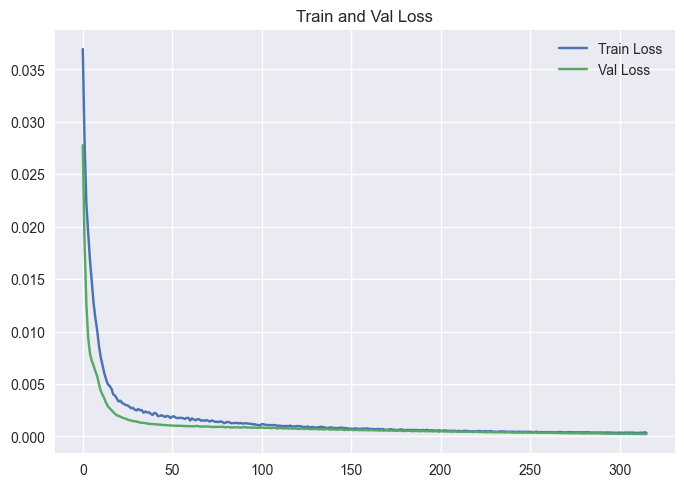

Training iteration: 45/50
Epoch 1/1000
8/8 [==============================] - 2s 67ms/step - loss: 0.1912 - accuracy: 0.0018 - val_loss: 0.1149 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1902 - accuracy: 0.0018 - val_loss: 0.1144 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1835 - accuracy: 9.9274e-04 - val_loss: 0.1129 - val_accuracy: 0.0000e+00
Epoch 4/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1591 - accuracy: 0.0032 - val_loss: 0.1004 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1240 - accuracy: 9.9274e-04 - val_loss: 0.0686 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0792 - accuracy: 0.0050 - val_loss: 0.0366 - val_accuracy: 0.0000e+00
Epoch 7/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0418 - accuracy: 0.0024 - v

Epoch 57/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0037 - accuracy: 7.0339e-04 - val_loss: 0.0014 - val_accuracy: 0.0000e+00
Epoch 58/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0035 - accuracy: 0.0013 - val_loss: 0.0014 - val_accuracy: 0.0000e+00
Epoch 59/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0031 - accuracy: 0.0018 - val_loss: 0.0013 - val_accuracy: 0.0000e+00
Epoch 60/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0032 - accuracy: 4.5537e-04 - val_loss: 0.0013 - val_accuracy: 0.0000e+00
Epoch 61/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0036 - accuracy: 0.0024 - val_loss: 0.0013 - val_accuracy: 0.0000e+00
Epoch 62/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0034 - accuracy: 0.0032 - val_loss: 0.0013 - val_accuracy: 0.0000e+00
Epoch 63/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0032 - accuracy: 9.9274e-04 - val_loss: 0.0013 

8/8 [==============================] - 0s 10ms/step - loss: 0.0012 - accuracy: 9.9274e-04 - val_loss: 4.6989e-04 - val_accuracy: 0.0000e+00
Epoch 167/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0011 - accuracy: 0.0024 - val_loss: 4.6943e-04 - val_accuracy: 0.0000e+00
Epoch 168/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0011 - accuracy: 0.0032 - val_loss: 4.6524e-04 - val_accuracy: 0.0000e+00
Epoch 169/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0012 - accuracy: 0.0013 - val_loss: 4.6393e-04 - val_accuracy: 0.0000e+00
Epoch 170/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0012 - accuracy: 0.0032 - val_loss: 4.6206e-04 - val_accuracy: 0.0000e+00
Epoch 171/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0012 - accuracy: 0.0032 - val_loss: 4.7002e-04 - val_accuracy: 0.0000e+00
Epoch 172/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0012 - accuracy: 7.0339e-04 - val_

Epoch 272/1000
8/8 [==============================] - 0s 8ms/step - loss: 5.7304e-04 - accuracy: 0.0032 - val_loss: 2.5384e-04 - val_accuracy: 0.0000e+00
Epoch 273/1000
8/8 [==============================] - 0s 8ms/step - loss: 5.1309e-04 - accuracy: 7.0339e-04 - val_loss: 2.5259e-04 - val_accuracy: 0.0000e+00
Epoch 274/1000
8/8 [==============================] - 0s 8ms/step - loss: 6.2027e-04 - accuracy: 7.0339e-04 - val_loss: 2.4981e-04 - val_accuracy: 0.0000e+00
Epoch 275/1000
8/8 [==============================] - 0s 9ms/step - loss: 6.5589e-04 - accuracy: 0.0024 - val_loss: 2.5025e-04 - val_accuracy: 0.0000e+00
Epoch 276/1000
8/8 [==============================] - 0s 8ms/step - loss: 6.2567e-04 - accuracy: 0.0013 - val_loss: 2.5471e-04 - val_accuracy: 0.0000e+00
Epoch 277/1000
8/8 [==============================] - 0s 7ms/step - loss: 6.2278e-04 - accuracy: 7.0339e-04 - val_loss: 2.4566e-04 - val_accuracy: 0.0000e+00
Epoch 278/1000
8/8 [==============================] - 0s 9ms/ste

Epoch 325/1000
8/8 [==============================] - 0s 8ms/step - loss: 5.5372e-04 - accuracy: 9.9274e-04 - val_loss: 2.1314e-04 - val_accuracy: 0.0000e+00
Epoch 326/1000
8/8 [==============================] - 0s 8ms/step - loss: 4.2729e-04 - accuracy: 0.0013 - val_loss: 2.0950e-04 - val_accuracy: 0.0000e+00
Epoch 327/1000
8/8 [==============================] - 0s 8ms/step - loss: 4.7301e-04 - accuracy: 4.5537e-04 - val_loss: 2.1212e-04 - val_accuracy: 0.0000e+00
Epoch 328/1000
8/8 [==============================] - 0s 8ms/step - loss: 4.6473e-04 - accuracy: 9.9274e-04 - val_loss: 2.0878e-04 - val_accuracy: 0.0000e+00
Epoch 329/1000
8/8 [==============================] - 0s 8ms/step - loss: 5.1215e-04 - accuracy: 7.0339e-04 - val_loss: 2.0769e-04 - val_accuracy: 0.0000e+00
Epoch 330/1000
8/8 [==============================] - 0s 8ms/step - loss: 4.9611e-04 - accuracy: 0.0018 - val_loss: 2.0855e-04 - val_accuracy: 0.0000e+00
Epoch 331/1000
8/8 [==============================] - 0s 8ms

Epoch 430/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.8607e-04 - accuracy: 9.9274e-04 - val_loss: 1.5873e-04 - val_accuracy: 0.0000e+00
Epoch 431/1000
8/8 [==============================] - 0s 8ms/step - loss: 4.4126e-04 - accuracy: 7.0339e-04 - val_loss: 1.5784e-04 - val_accuracy: 0.0000e+00
Epoch 432/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.7743e-04 - accuracy: 0.0032 - val_loss: 1.5889e-04 - val_accuracy: 0.0000e+00
Epoch 433/1000
8/8 [==============================] - 0s 9ms/step - loss: 3.9374e-04 - accuracy: 0.0050 - val_loss: 1.5726e-04 - val_accuracy: 0.0000e+00
Epoch 434/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.3133e-04 - accuracy: 7.0339e-04 - val_loss: 1.5616e-04 - val_accuracy: 0.0000e+00
Epoch 435/1000
8/8 [==============================] - 0s 8ms/step - loss: 4.7538e-04 - accuracy: 0.0013 - val_loss: 1.5527e-04 - val_accuracy: 0.0000e+00
Epoch 436/1000
8/8 [==============================] - 0s 8ms/ste

Epoch 483/1000
8/8 [==============================] - 0s 10ms/step - loss: 3.8505e-04 - accuracy: 0.0013 - val_loss: 1.3777e-04 - val_accuracy: 0.0000e+00
Epoch 484/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.7924e-04 - accuracy: 4.5537e-04 - val_loss: 1.3864e-04 - val_accuracy: 0.0000e+00
Epoch 485/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.1105e-04 - accuracy: 0.0013 - val_loss: 1.3777e-04 - val_accuracy: 0.0000e+00
Epoch 486/1000
8/8 [==============================] - 0s 9ms/step - loss: 3.3585e-04 - accuracy: 0.0018 - val_loss: 1.4140e-04 - val_accuracy: 0.0000e+00
Epoch 487/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.7766e-04 - accuracy: 7.0339e-04 - val_loss: 1.3682e-04 - val_accuracy: 0.0000e+00
Epoch 488/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.3879e-04 - accuracy: 4.5537e-04 - val_loss: 1.4013e-04 - val_accuracy: 0.0000e+00
Epoch 489/1000
8/8 [==============================] - 0s 8ms/st

Epoch 536/1000
8/8 [==============================] - 0s 9ms/step - loss: 3.5383e-04 - accuracy: 7.0339e-04 - val_loss: 1.2122e-04 - val_accuracy: 0.0000e+00
Epoch 537/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.3558e-04 - accuracy: 9.9274e-04 - val_loss: 1.2260e-04 - val_accuracy: 0.0000e+00
Epoch 538/1000
8/8 [==============================] - 0s 8ms/step - loss: 3.1861e-04 - accuracy: 0.0013 - val_loss: 1.2093e-04 - val_accuracy: 0.0000e+00
Epoch 539/1000
8/8 [==============================] - 0s 9ms/step - loss: 3.0155e-04 - accuracy: 0.0024 - val_loss: 1.2549e-04 - val_accuracy: 0.0000e+00
Epoch 540/1000
8/8 [==============================] - 0s 9ms/step - loss: 3.2029e-04 - accuracy: 9.9274e-04 - val_loss: 1.2112e-04 - val_accuracy: 0.0000e+00
Epoch 541/1000
8/8 [==============================] - 0s 7ms/step - loss: 3.2066e-04 - accuracy: 0.0050 - val_loss: 1.2067e-04 - val_accuracy: 0.0000e+00
Epoch 542/1000
8/8 [==============================] - 0s 8ms/ste

Epoch 589/1000
8/8 [==============================] - 0s 8ms/step - loss: 2.7743e-04 - accuracy: 9.9274e-04 - val_loss: 1.0953e-04 - val_accuracy: 0.0000e+00
Epoch 590/1000
8/8 [==============================] - 0s 8ms/step - loss: 2.5447e-04 - accuracy: 0.0050 - val_loss: 1.1516e-04 - val_accuracy: 0.0000e+00
Epoch 591/1000
8/8 [==============================] - 0s 7ms/step - loss: 2.8345e-04 - accuracy: 4.5537e-04 - val_loss: 1.1108e-04 - val_accuracy: 0.0000e+00
Epoch 592/1000
8/8 [==============================] - 0s 10ms/step - loss: 2.9069e-04 - accuracy: 4.5537e-04 - val_loss: 1.1208e-04 - val_accuracy: 0.0000e+00
Epoch 593/1000
8/8 [==============================] - 0s 8ms/step - loss: 2.6650e-04 - accuracy: 0.0024 - val_loss: 1.1284e-04 - val_accuracy: 0.0000e+00
Epoch 594/1000
8/8 [==============================] - 0s 8ms/step - loss: 2.5257e-04 - accuracy: 0.0013 - val_loss: 1.1037e-04 - val_accuracy: 0.0000e+00
Epoch 595/1000
8/8 [==============================] - 0s 8ms/st

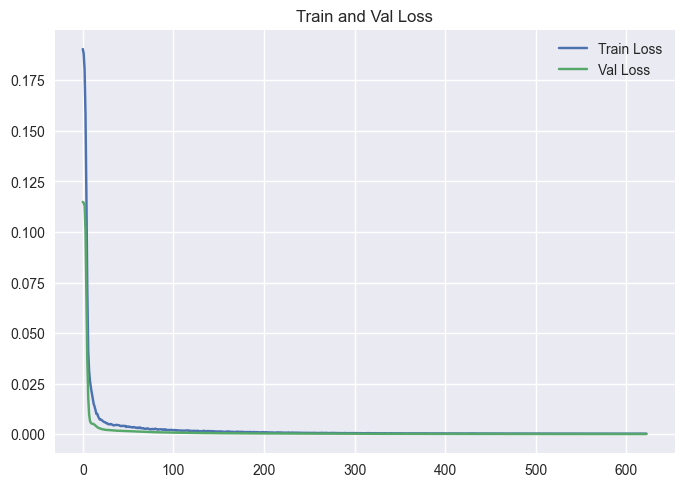

Training iteration: 46/50
Epoch 1/1000
8/8 [==============================] - 2s 67ms/step - loss: 0.1649 - accuracy: 4.5537e-04 - val_loss: 0.1060 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.1248 - accuracy: 0.0024 - val_loss: 0.0750 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0799 - accuracy: 0.0050 - val_loss: 0.0473 - val_accuracy: 0.0000e+00
Epoch 4/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0554 - accuracy: 0.0018 - val_loss: 0.0282 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0371 - accuracy: 0.0000e+00 - val_loss: 0.0166 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0278 - accuracy: 0.0000e+00 - val_loss: 0.0101 - val_accuracy: 0.0000e+00
Epoch 7/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0261 - accuracy: 0.0000

8/8 [==============================] - 0s 9ms/step - loss: 0.0218 - accuracy: 0.0024 - val_loss: 6.9478e-04 - val_accuracy: 0.0000e+00
Epoch 15/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0086 - accuracy: 0.0050 - val_loss: 0.0032 - val_accuracy: 0.0000e+00
Epoch 16/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0067 - accuracy: 0.0024 - val_loss: 0.0056 - val_accuracy: 0.0000e+00
Epoch 17/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0060 - accuracy: 0.0050 - val_loss: 0.0067 - val_accuracy: 0.0000e+00
Epoch 18/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0057 - accuracy: 0.0018 - val_loss: 0.0066 - val_accuracy: 0.0000e+00
Epoch 19/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0059 - accuracy: 0.0013 - val_loss: 0.0062 - val_accuracy: 0.0000e+00
Epoch 20/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0054 - accuracy: 0.0050 - val_loss: 0.0058 - val_accuracy: 0.0000

Epoch 46/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0040 - accuracy: 0.0032 - val_loss: 0.0010 - val_accuracy: 0.0000e+00
Epoch 47/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0046 - accuracy: 9.9274e-04 - val_loss: 9.8945e-04 - val_accuracy: 0.0000e+00
Epoch 48/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.0038 - accuracy: 9.9274e-04 - val_loss: 9.7494e-04 - val_accuracy: 0.0000e+00
Epoch 49/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0046 - accuracy: 0.0050 - val_loss: 9.8782e-04 - val_accuracy: 0.0000e+00
Epoch 50/1000
8/8 [==============================] - 0s 8ms/step - loss: 0.0043 - accuracy: 0.0050 - val_loss: 9.6958e-04 - val_accuracy: 0.0000e+00
Epoch 51/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0041 - accuracy: 4.5537e-04 - val_loss: 9.7555e-04 - val_accuracy: 0.0000e+00
Epoch 52/1000
8/8 [==============================] - 0s 9ms/step - loss: 0.0036 - accuracy: 9.9274

In [35]:
#多次

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, LSTM, Dropout, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam



def lstm_model():
    inputs = Input(shape=x_train.shape[1:])
    channel1 = Flatten()(inputs)
    channel2 = LSTM(units=16, return_sequences=False)(inputs)
    channel2 = Dropout(dropout)(channel2)
    channel = layers.Concatenate()([channel1, channel2])
    dense = Dense(32, activation="relu", use_bias=True)(channel)
    outputs = Dense(1, activation="relu", use_bias=True)(dense)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=Adam(learning_rate=1e-4), loss='mse', metrics=['accuracy'])
    return model

# 设定全局最佳验证损失为一个大的数值
global_best_val_loss = 6e-04

best_TF_history = None


num_iterations = 500

# 运行100次训练循环
for i in range(num_iterations):
    print(f"Training iteration: {i + 1}/{num_iterations}")
    
    # 定义和编译模型
    myModel = lstm_model()

    # 仅使用早停止回调，不直接使用ModelCheckpoint
    callbacks = [keras.callbacks.EarlyStopping(patience=patience, restore_best_weights=True)]
    
    if training_state==True:
        history = myModel.fit(
            x_train,
            y_train,
            validation_split=0.1,
            epochs=1000,
            batch_size=batch_size,
            callbacks=callbacks,
        )
    
    # 检查当前模型的最佳验证损失
        current_best_val_loss = min(history.history['val_loss'])
    
    # 如果当前模型的验证损失比全局最佳还要低，那么保存这个模型并更新全局最佳验证损失
    if current_best_val_loss < global_best_val_loss:
        print(f"New best model found at iteration {i + 1} with validation loss {current_best_val_loss}.")
        model_filename = f"best_model_LSTM_iteration_{i + 1}.h5"
        myModel.save(model_filename)
        print(f"Model saved as {model_filename}")
        best_TF_history = history
    
        history2plot(history)  


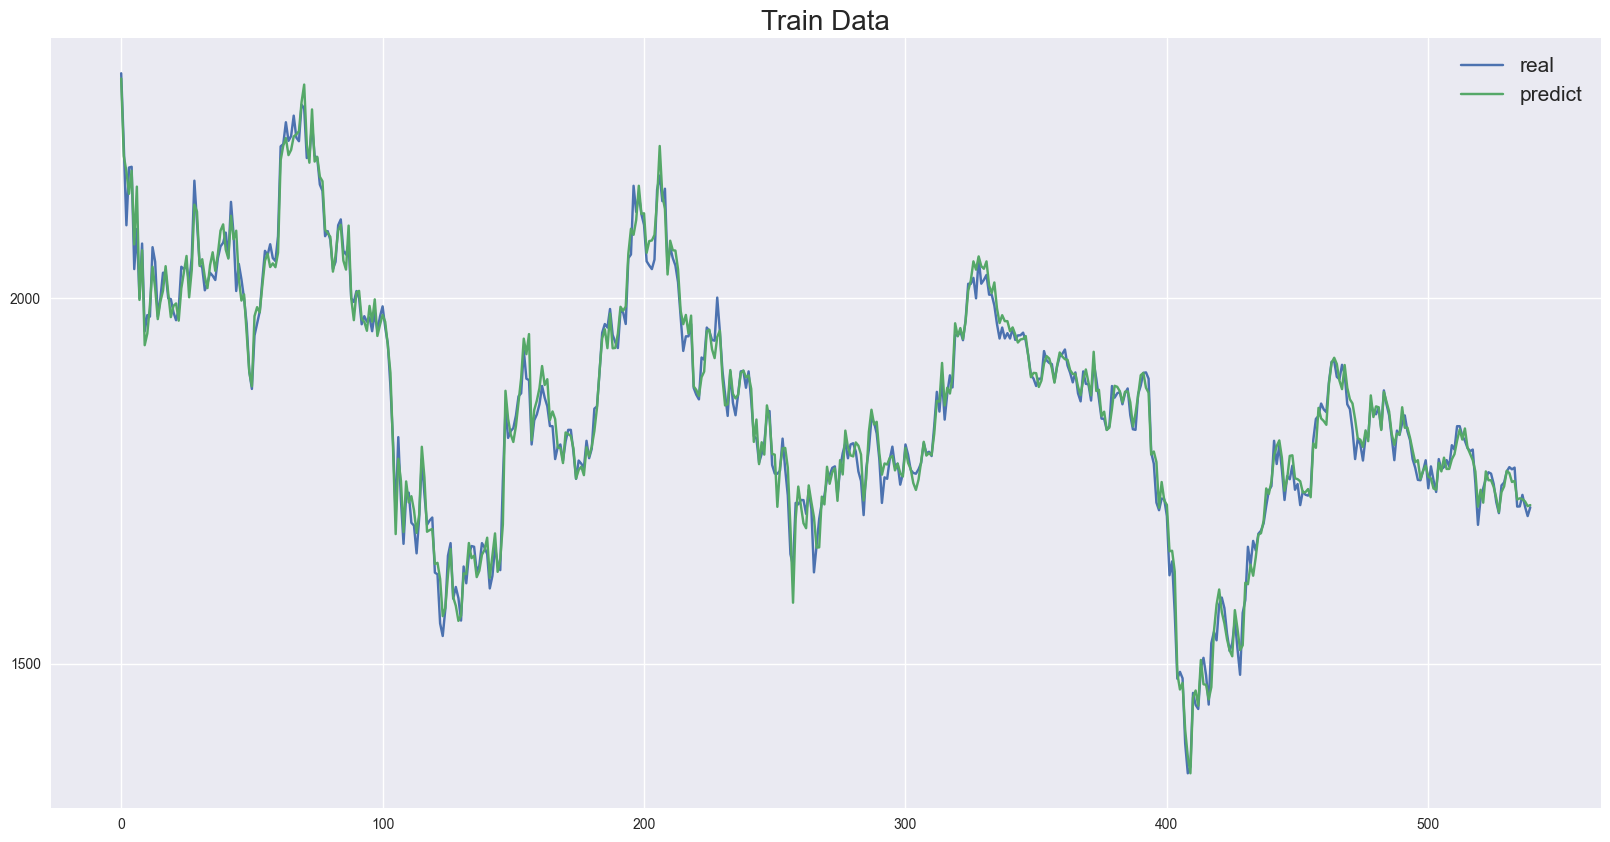

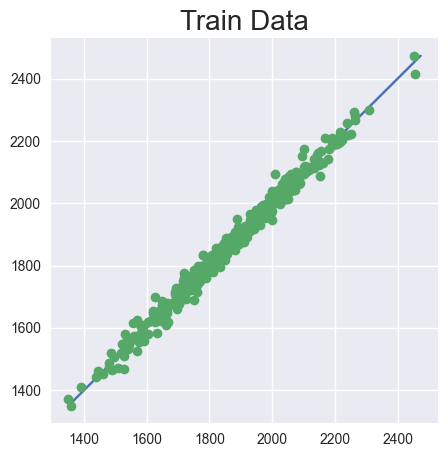

Train上的MAE/RMSE/MAPE/R^2
14.780921349850372
19.586567585830274
0.008064198240581152
0.9866302137740615


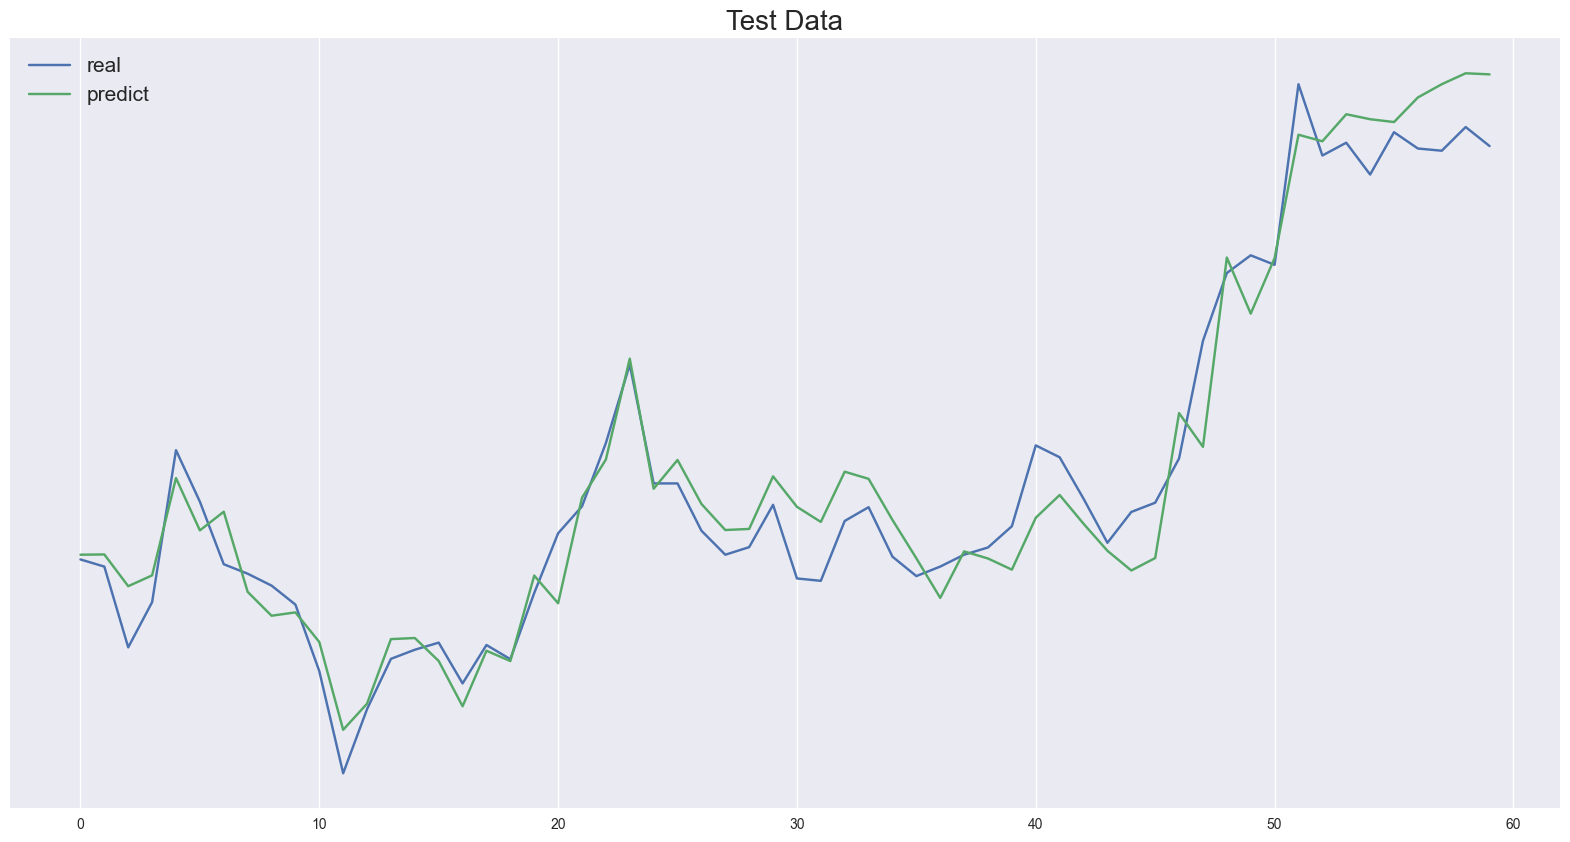

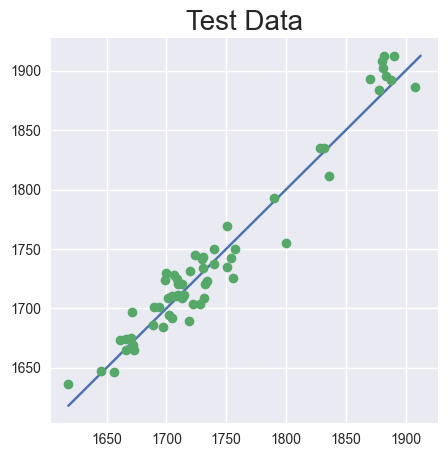

Test上的MAE/RMSE/MAPE/R^2
13.440422119140612
16.49857798258773
0.007660662701908886
0.9480836991186712


In [133]:
myModel.load_weights("best_model_LSTM_iteration_24.h5")

y_train_predict=myModel.predict(x_train)#预测结果
easy_result(y_train,y_train_predict,'Train','LSTM',train_show_num)#输出评价指标 
y_test_predict=myModel.predict(x_test)#预测结果
easy_result(y_test,y_test_predict,'Test','LSTM',test_show_num)#输出评价指标

# TLSM

In [1]:

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Input,LSTM,Dropout,Dense,GRU, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = inputs
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res
#     return x

def model_3(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    channel2 = layers.Flatten()(x)
    channel3 = x
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)
    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    channel3 = layers.LSTM(units=16, return_sequences=False)(channel3)
    channel3 = layers.Dropout(dropout)(channel3)
    channel3 = layers.Dense(32, activation="relu", use_bias=True)(channel3)
    x = layers.Concatenate()([x, channel2, channel3])
    #     Lambda(lambda x:K.sum(x , axis=1 , keepdims=False))(att)
    x = layers.Dense(64, activation="relu", use_bias=True)(x)
    outputs = layers.Dense(1, activation="relu")(x)
    model = keras.Model(inputs, outputs)
    model.compile(optimizer=Adam(learning_rate=1e-4), loss='mse', metrics=['accuracy'])
    return model
myModel = model_3(
    input_shape = x_train.shape[1:],
    head_size=head_size,
    num_heads=num_heads,
    ff_dim=ff_dim,
    num_transformer_blocks=num_transformer_blocks,
    mlp_dropout=0.1,
    dropout=dropout,
)
callbacks = [keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
            keras.callbacks.ModelCheckpoint(filepath = best_model_TLSM , monitor='val_loss', save_best_only=True)]

if training_state==True:
    history = myModel.fit(
        x_train,
        y_train,
        validation_split=0.1,
        epochs=1000,
        batch_size=batch_size,
        callbacks=callbacks,
    )
    history2plot(history)
    
myModel.load_weights("best_model_TLSM_97.8%.h5")

KeyboardInterrupt: 

Training iteration: 1/1
Epoch 1/1000
8/8 [==============================] - 4s 108ms/step - loss: 0.1906 - accuracy: 4.5537e-04 - val_loss: 0.1149 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.1855 - accuracy: 7.0339e-04 - val_loss: 0.0961 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 12ms/step - loss: 0.1479 - accuracy: 0.0024 - val_loss: 0.0565 - val_accuracy: 0.0000e+00
Epoch 4/1000
8/8 [==============================] - 0s 11ms/step - loss: 0.0917 - accuracy: 7.0339e-04 - val_loss: 0.0264 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 11ms/step - loss: 0.0431 - accuracy: 9.9274e-04 - val_loss: 0.0095 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 11ms/step - loss: 0.0249 - accuracy: 0.0013 - val_loss: 0.0026 - val_accuracy: 0.0000e+00
Epoch 7/1000
8/8 [==============================] - 0s 12ms/step - loss: 0.0159 - accurac

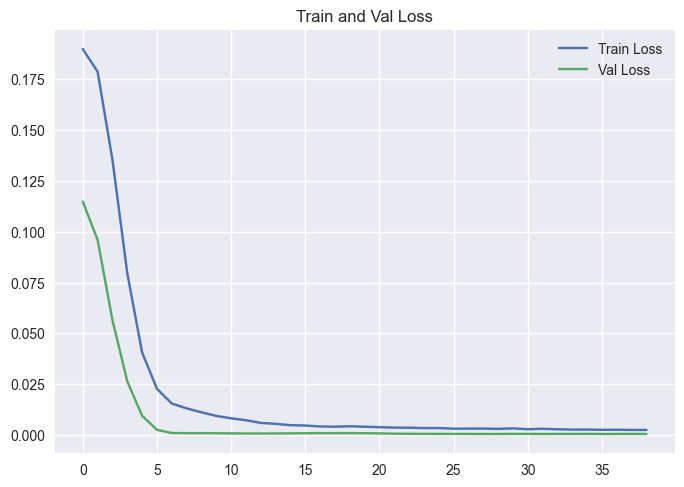

In [28]:
#多次
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

Assuming transformer_encoder is defined as before
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = inputs
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res
#     return x
# def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
#     # Normalization and Attention
#     x = inputs
#     #x = layers.LayerNormalization(epsilon=1e-6)(inputs)
#     x = layers.MultiHeadAttention(
#         key_dim=head_size, num_heads=num_heads, dropout=dropout
#     )(x, x)
#     #x = layers.Dropout(dropout)(x)
#     #res = x + inputs

#     # Feed Forward Part
#     #x = layers.LayerNormalization(epsilon=1e-6)(res)
#     #x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
#     #x = layers.Dropout(dropout)(x)
#     #x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
#     #return x + res
#     return x




def model_3(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    channel2 = layers.Flatten()(x)
    channel3 = x
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)
    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    channel3 = layers.LSTM(units=16, return_sequences=False)(channel3)
    channel3 = layers.Dropout(dropout)(channel3)
    channel3 = layers.Dense(32, activation="relu", use_bias=True)(channel3)
    x = layers.Concatenate()([x, channel2, channel3])
    #     Lambda(lambda x:K.sum(x , axis=1 , keepdims=False))(att)
    x = layers.Dense(64, activation="relu", use_bias=True)(x)
    outputs = layers.Dense(1, activation="relu")(x)
    model = keras.Model(inputs, outputs)
    model.compile(optimizer=Adam(learning_rate=1e-4), loss='mse', metrics=['accuracy'])
    return model

# 设定全局最佳验证损失为一个大的数值
global_best_val_loss = 8e-05


best_TLSM_history = None  # To store the training history of the best model



num_iterations = 1


# 运行100次训练循环
for i in range(num_iterations):
    print(f"Training iteration: {i + 1}/{num_iterations}")

    # 定义和编译模型
    myModel = model_3(
        input_shape=x_train.shape[1:],
        head_size=head_size,
        num_heads=num_heads,
        ff_dim=ff_dim,
        num_transformer_blocks=num_transformer_blocks,
        mlp_dropout=0.1,
        dropout=dropout,
    )

    # 仅使用早停止回调，不直接使用ModelCheckpoint
    callbacks = [keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]
    
    history = myModel.fit(
        x_train,
        y_train,
        validation_split=0.1,
        epochs=1000,
        batch_size=batch_size,
        callbacks=callbacks,
    )
    
    # 检查当前模型的最佳验证损失
    current_best_val_loss = min(history.history['val_loss'])
    
    # 如果当前模型的验证损失比全局最佳还要低，那么保存这个模型并更新全局最佳验证损失
#     if current_best_val_loss < global_best_val_loss:
#         print(f"New best model found at iteration {i + 1} with validation loss {current_best_val_loss}.")
#         global_best_val_loss = current_best_val_loss
#         myModel.save("best_model_TLSM.h5")
#         best_TLSM_history = history
    
    
    if current_best_val_loss < global_best_val_loss:
        print(f"New best model found at iteration {i + 1} with validation loss {current_best_val_loss}.")
        model_filename = f"best_model_TLSM_iteration_{i + 1}.h5"
        myModel.save(model_filename)
        print(f"Model saved as {model_filename}")
        best_TLSM_history = history

    
    
    history2plot(history)  

    


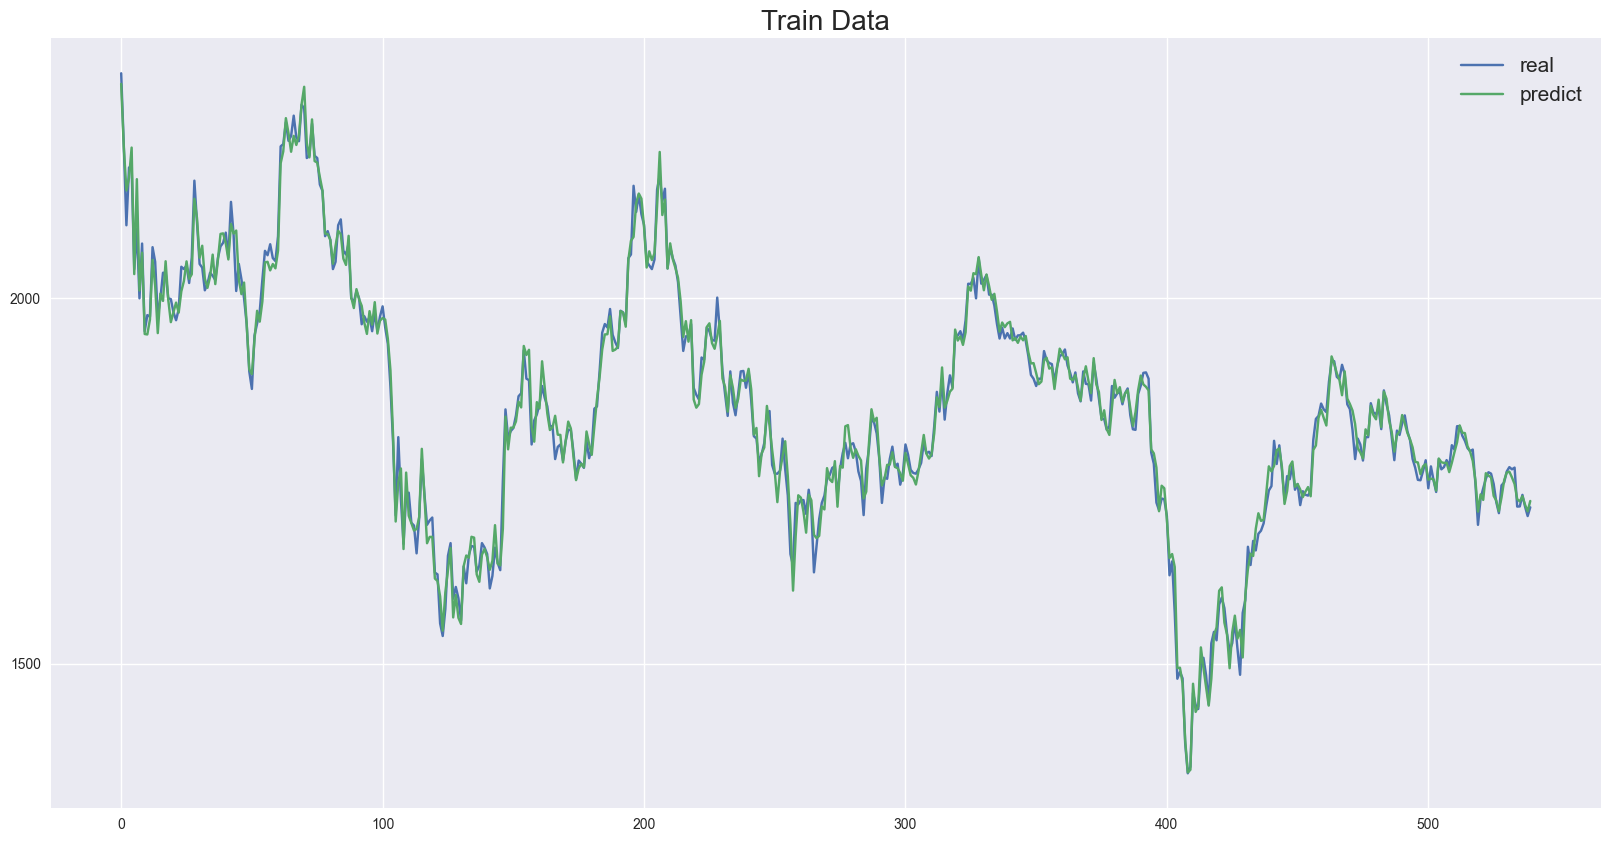

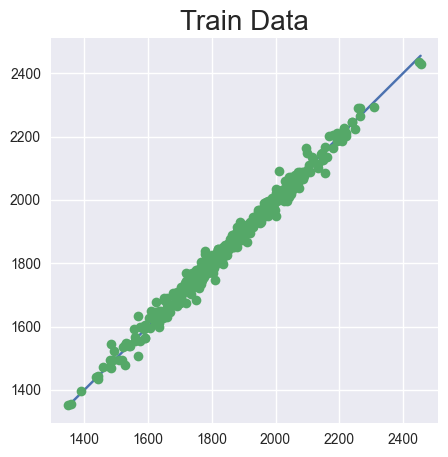

Train上的MAE/RMSE/MAPE/R^2
13.357696994057896
18.088334273468593
0.007290066998946841
0.9885973723525274


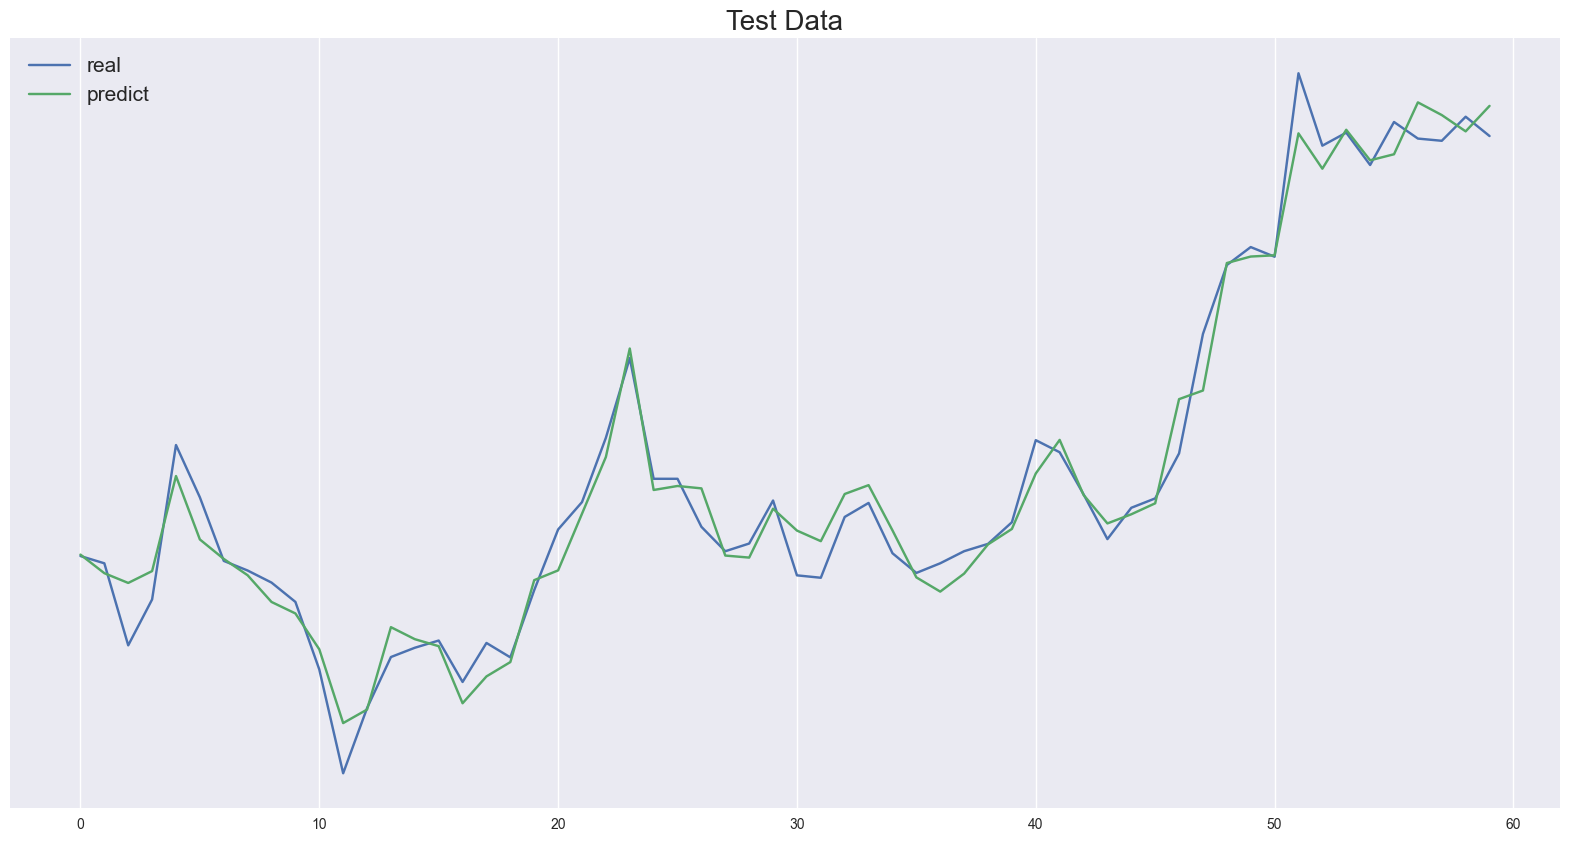

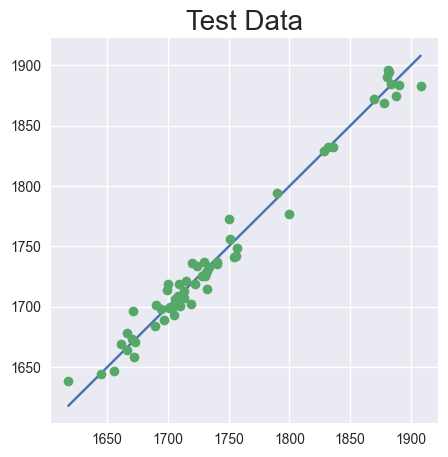

Test上的MAE/RMSE/MAPE/R^2
8.264925455729145
10.709636824806639
0.004741487884851484
0.9781243885763028


In [29]:
import matplotlib.pyplot as plt

myModel.load_weights("best_model_TLSM_97.8%.h5")


y_train_predict=myModel.predict(x_train)#预测结果
easy_result(y_train,y_train_predict,'Train','TLSM',train_show_num)#输出评价指标 

y_test_predict=myModel.predict(x_test)#预测结果
easy_result(y_test,y_test_predict,'Test','TLSM',test_show_num)#输出评价指标

# GRU

Model: "model_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_29 (InputLayer)        [(None, 3, 14)]           0         
_________________________________________________________________
gru_28 (GRU)                 (None, 16)                1536      
_________________________________________________________________
dropout_28 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 17        
Total params: 1,553
Trainable params: 1,553
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1000
8/8 [==============================] - 2s 66ms/step - loss: 0.1412 - accuracy: 9.9274e-04 - val_loss: 0.1104 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 10ms/step - loss: 0.1186 - accuracy: 0.0000e+

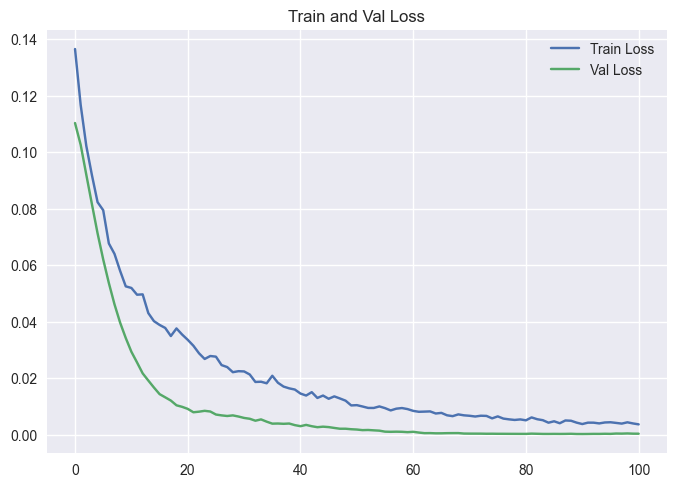

In [100]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Input,LSTM,Dropout,Dense,GRU
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

def gru_model():
    inputs=Input(shape=x_train.shape[1:])
    model = GRU(units=gru_dim, return_sequences=False)(inputs)
    model = Dropout(dropout)(model)
    dense = Dense(1, activation="relu", use_bias=True)(model)
    model = Model(inputs=inputs, outputs=dense)
    print(model.summary())
    model.compile(optimizer=RMSprop(learning_rate=1e-4), loss='mse',metrics=['accuracy'])
    return model

myModel = gru_model()
callbacks = [keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
            keras.callbacks.ModelCheckpoint(filepath = best_model_GRU , monitor='val_loss', save_best_only=True)]

if training_state==True:
    history = myModel.fit(
        x_train,
        y_train,
        validation_split=0.1,
        epochs=1000,
        batch_size=batch_size,
        callbacks=callbacks,
    )
    history2plot(history)

    
latest_model_weights = callbacks[1].filepath
myModel.load_weights(latest_model_weights)

#myModel.load_weights(best_model_GRU)

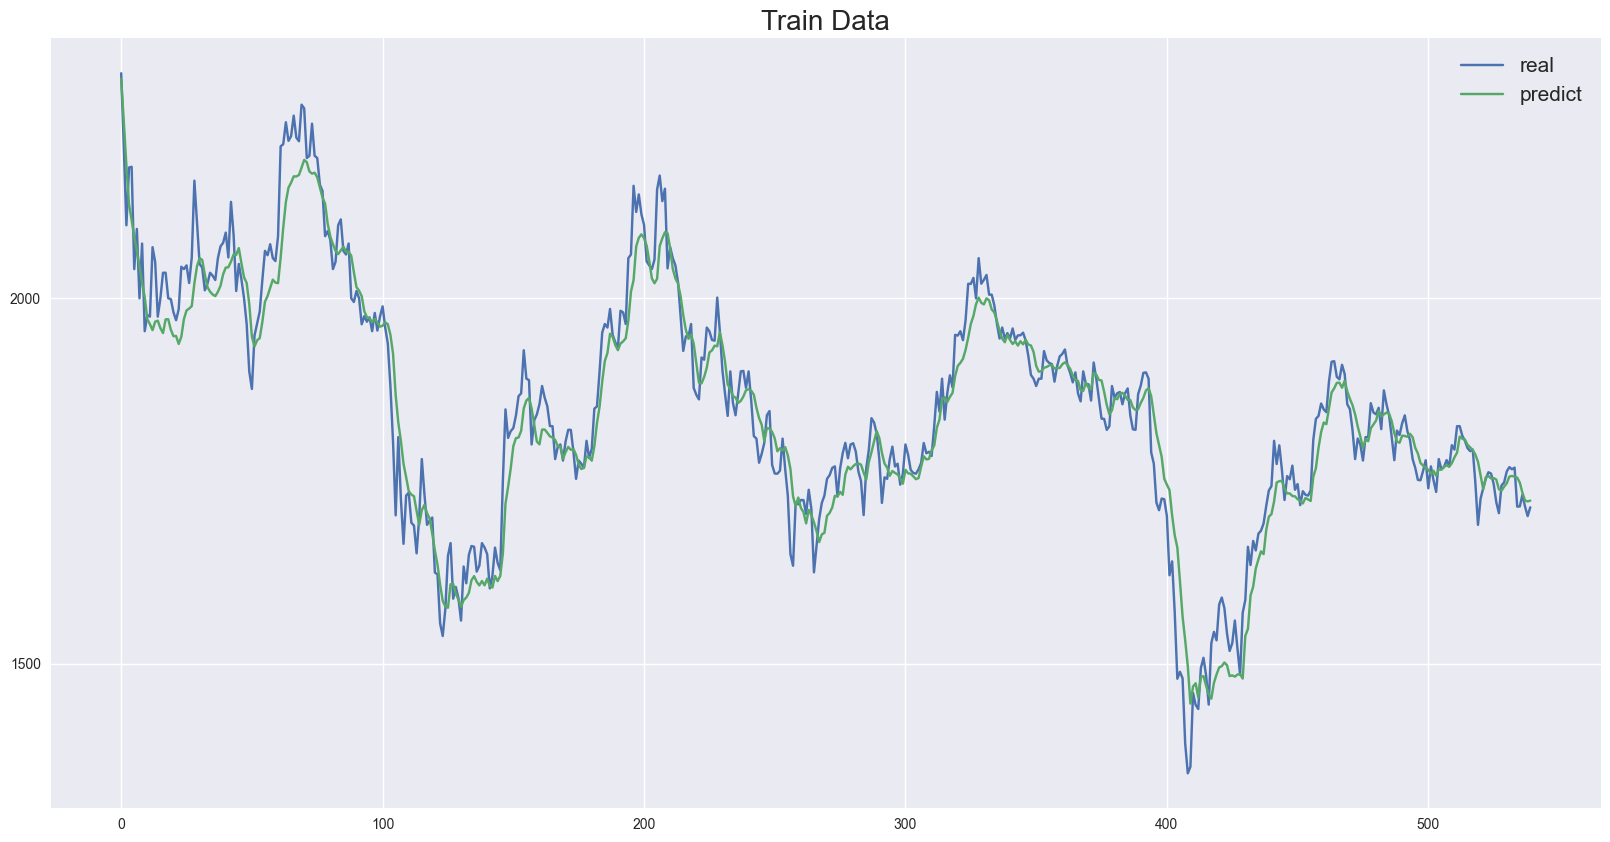

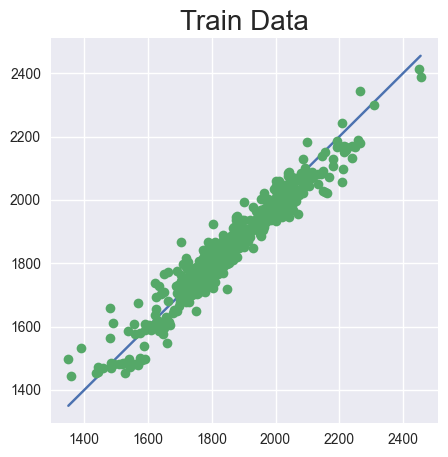

Train上的MAE/RMSE/MAPE/R^2
32.977051761409406
44.0289336578787
0.017983293990586558
0.9324408577524114


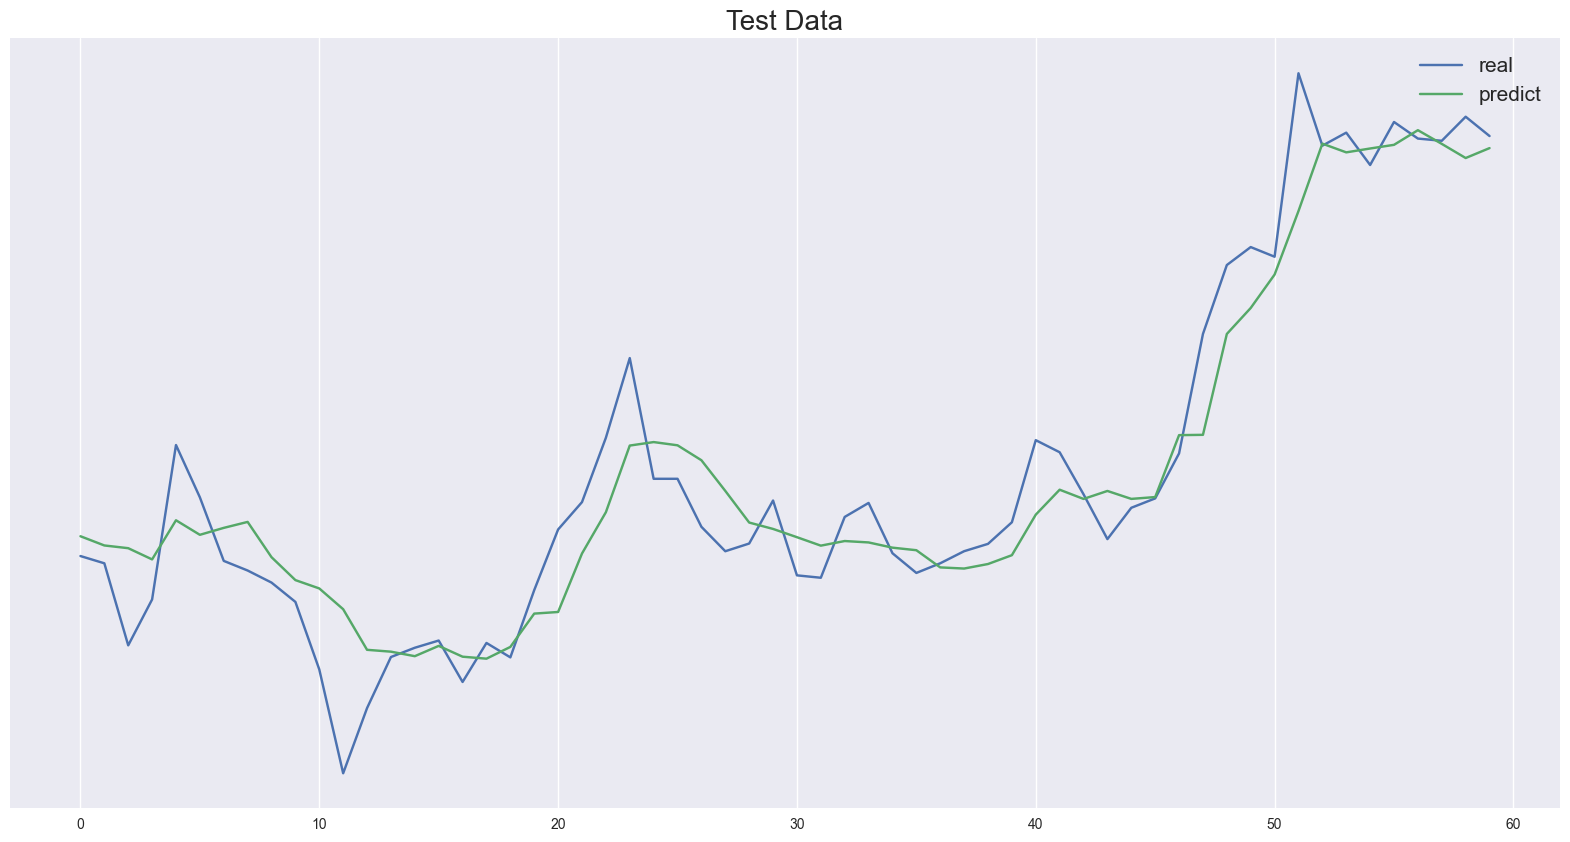

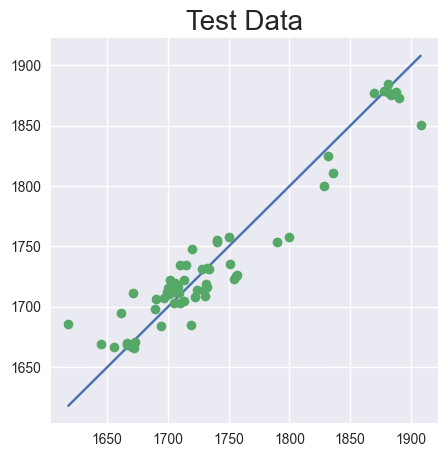

Test上的MAE/RMSE/MAPE/R^2
15.869052001953113
20.99640769743435
0.009133710089381408
0.9159184503685631


In [101]:
y_train_predict=myModel.predict(x_train)#预测结果
easy_result(y_train,y_train_predict,'Train','GRU',train_show_num)#输出评价指标 

y_test_predict=myModel.predict(x_test)#预测结果
easy_result(y_test,y_test_predict,'Test','GRU',test_show_num)#输出评价指标

# Machine Learning

In [103]:
x_train = np.reshape(x_train, (x_train.shape[0], -1))
x_test = np.reshape(x_test, (x_test.shape[0], -1))
print('x_train.shape',x_train.shape)
print('x_test.shape',x_test.shape)
print('y_train.shape',y_train.shape)
print('y_test.shape',y_test.shape)

x_train.shape (543, 42)
x_test.shape (60, 42)
y_train.shape (543,)
y_test.shape (60,)


# SVM

In [178]:
from sklearn.svm import SVR
myModel = SVR(kernel='poly', C=10.0)  # 或更高的 C

myModel.fit(x_train, y_train) 

SVR(C=10.0, kernel='poly')

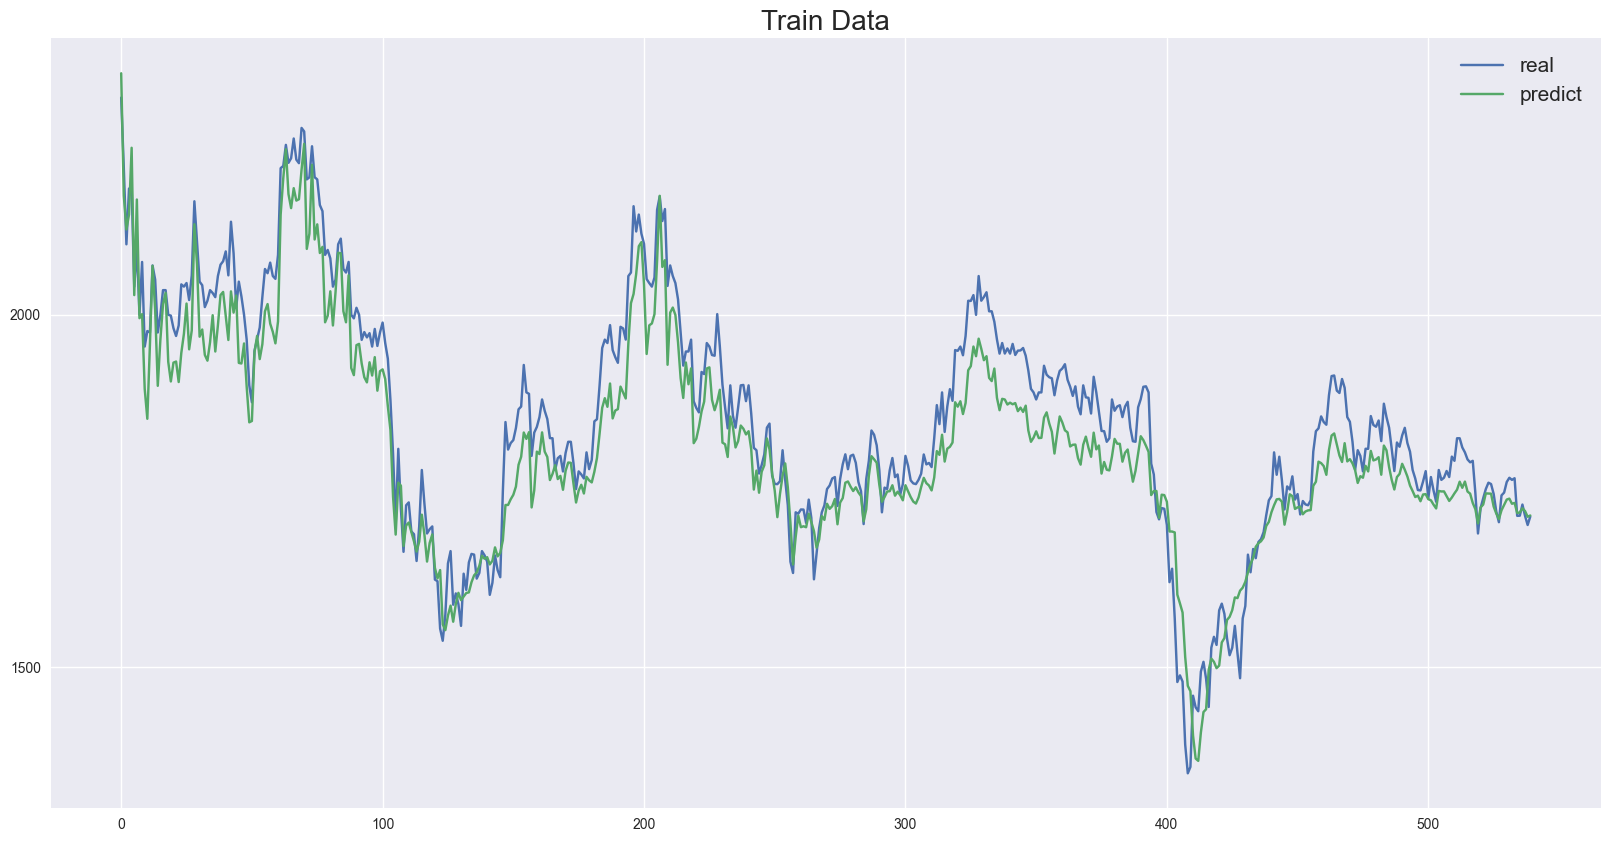

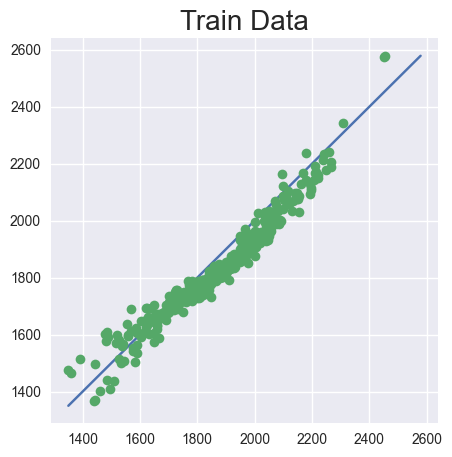

Train上的MAE/RMSE/MAPE/R^2
48.35621115462153
56.273849304448675
0.025852886412855543
0.8896376247846407


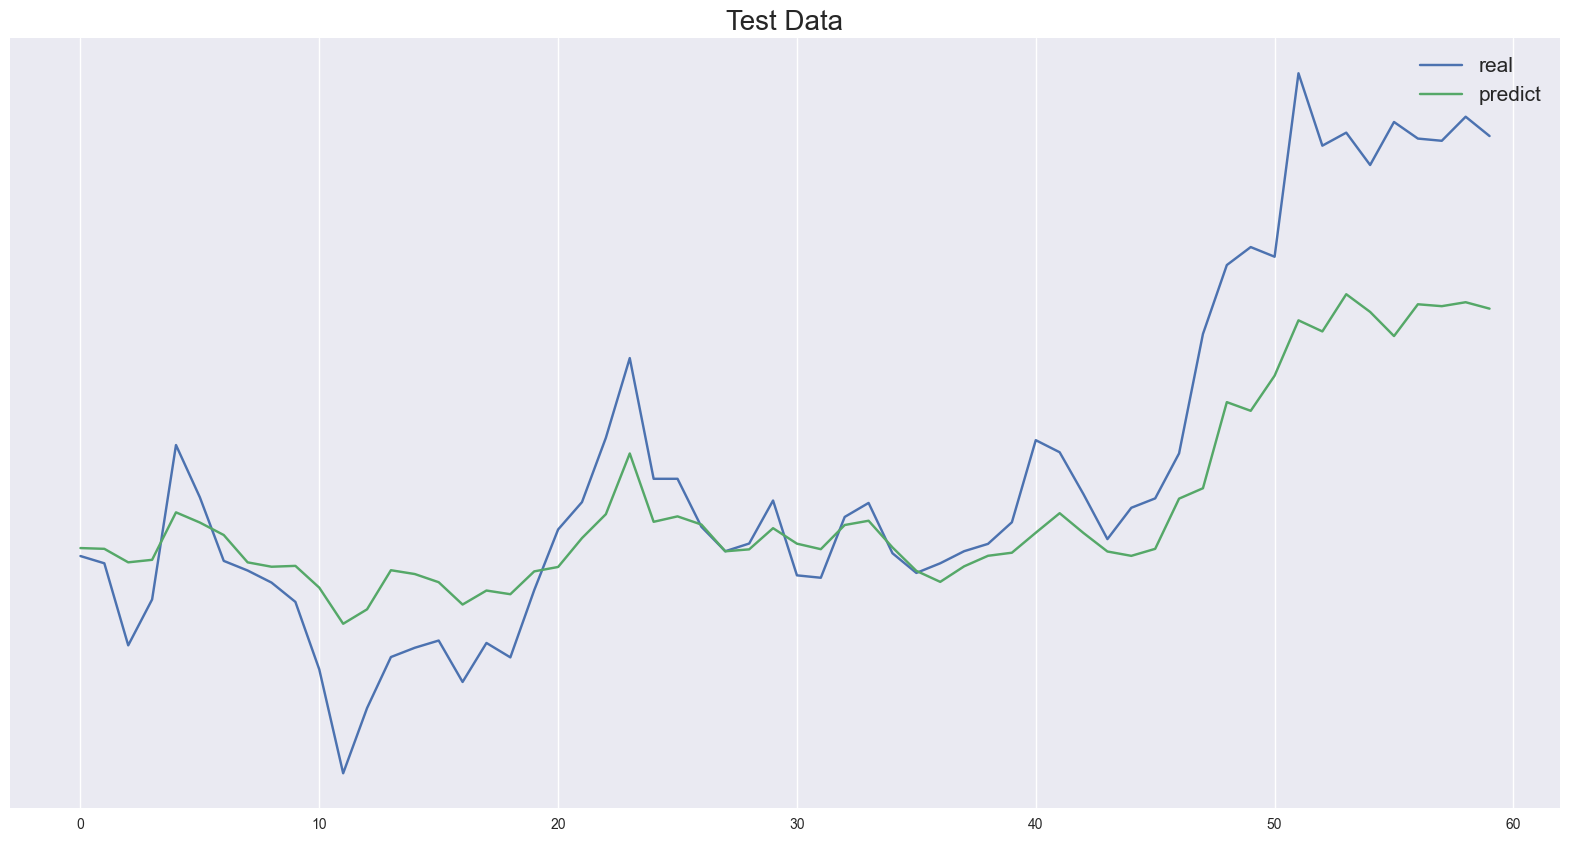

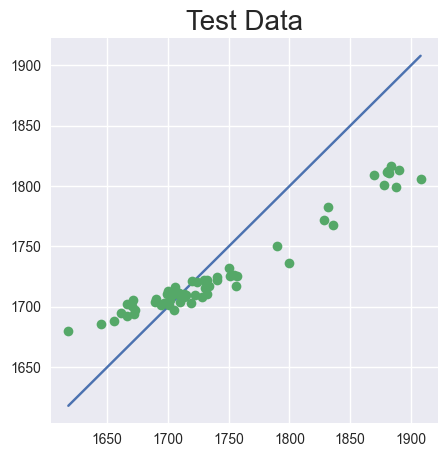

Test上的MAE/RMSE/MAPE/R^2
28.88286951922572
38.660570789369736
0.01617348505282148
0.7149328088983168


In [179]:
y_train_predict=myModel.predict(x_train)
easy_result(y_train,y_train_predict,'Train','SVR',train_show_num)

y_test_predict=myModel.predict(x_test)
easy_result(y_test,y_test_predict,'Test','SVR',test_show_num)


# Random Forest

In [159]:
from sklearn.ensemble import RandomForestRegressor
myModel=RandomForestRegressor(max_depth=10,
                             max_features=2,
                             n_estimators=100)
myModel.fit(x_train, y_train) 

RandomForestRegressor(max_depth=10, max_features=1)

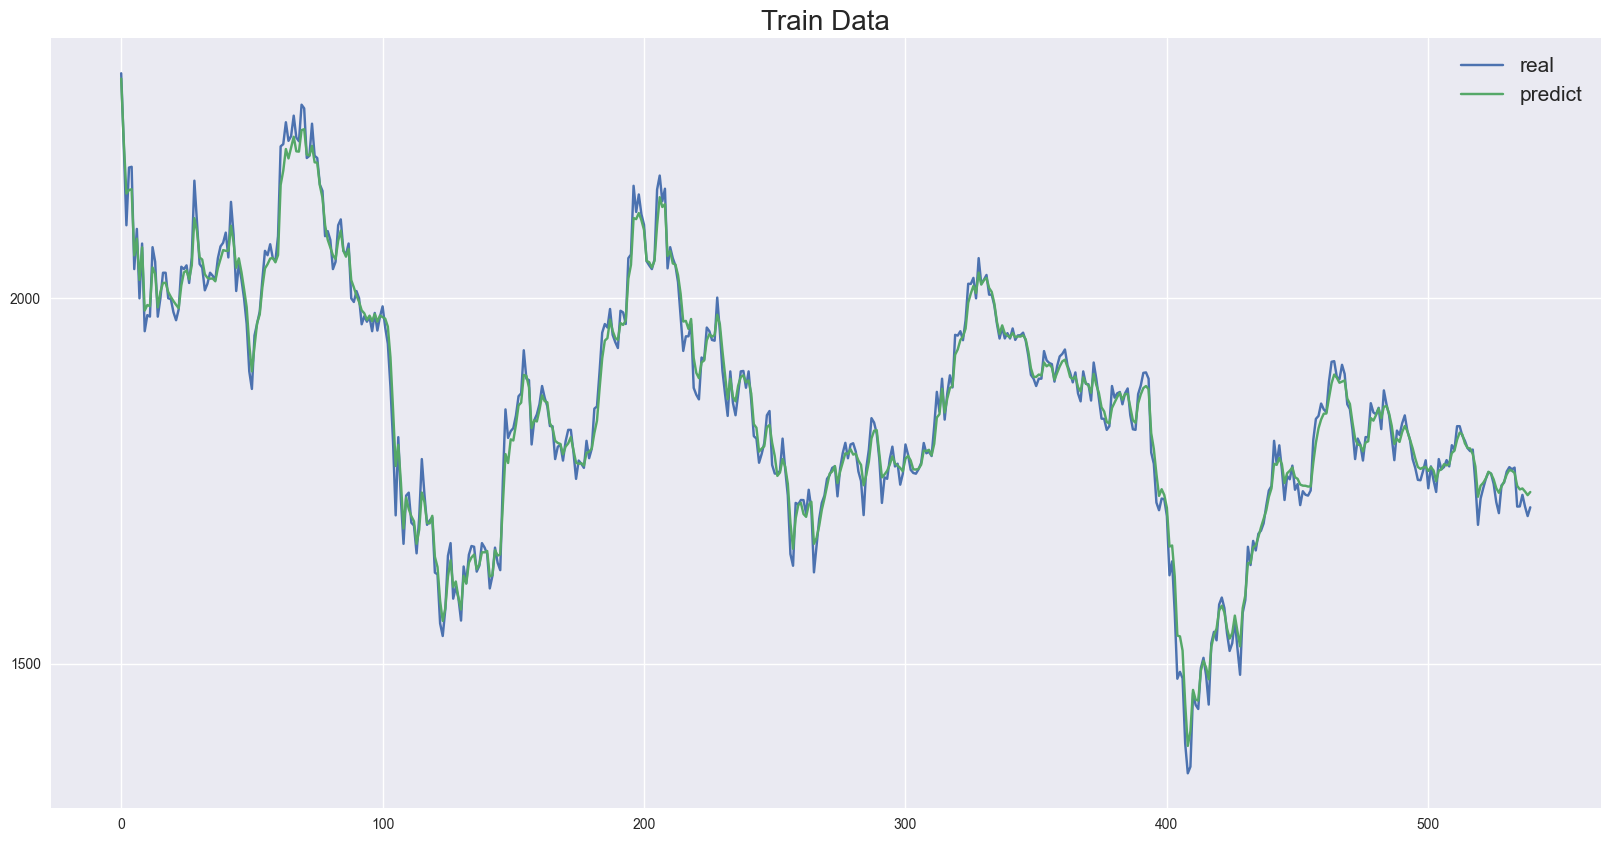

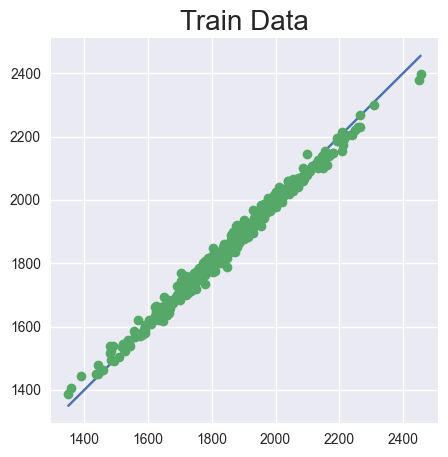

Train上的MAE/RMSE/MAPE/R^2
13.542046702771376
18.02128050537924
0.007373013423865043
0.9886817551337986


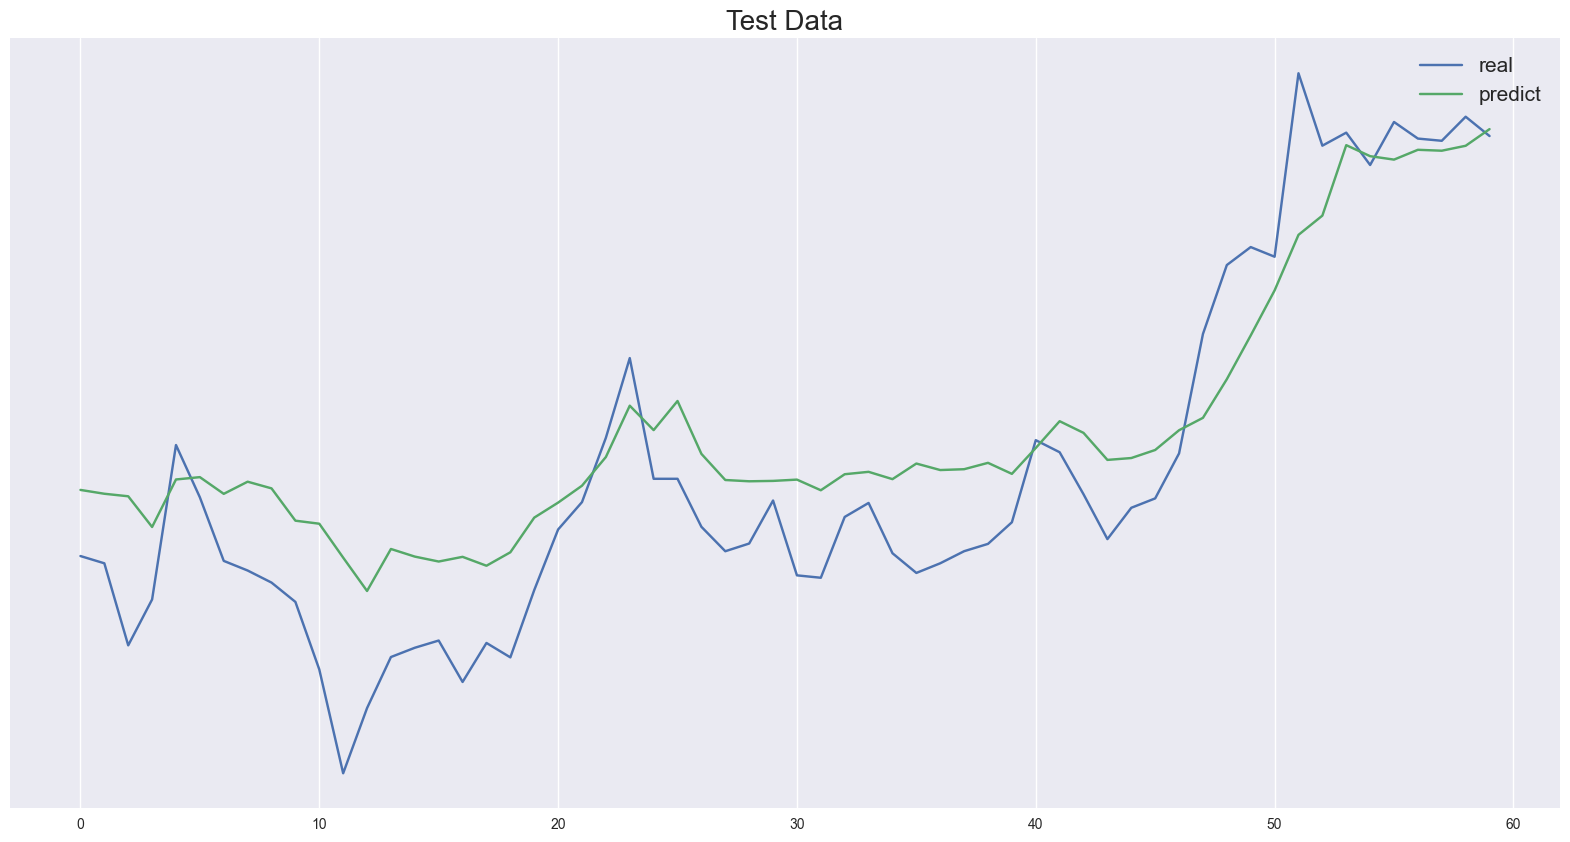

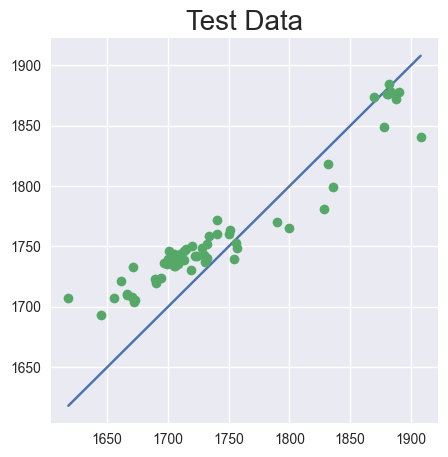

Test上的MAE/RMSE/MAPE/R^2
28.0061047484952
32.928264595025524
0.01629952973094767
0.7932010169483292


In [160]:
y_train_predict=myModel.predict(x_train)
easy_result(y_train,y_train_predict,'Train','RandomForest',train_show_num)

y_test_predict=myModel.predict(x_test)
easy_result(y_test,y_test_predict,'Test','RandomForest',test_show_num)

In [ ]:
# Random Forest

# Financial Computation

In [134]:
###### TLSM
y_test_predict_array = y_test_predict.values
y_test_predict_reshaped = y_test_predict_array.reshape(-1, 1)
y_test_predict_original = mm_y.inverse_transform(y_test_predict_reshaped)

y_test_array = y_test.values.reshape(-1, 1)
y_test_original = mm_y.inverse_transform(y_test_array)



plt.figure(figsize=(12, 6))
plt.plot(y_test_original, label="True Prices", color='blue')
plt.plot(y_test_predict_original, label="Predicted Prices", color='red', alpha=0.7)
plt.title("True vs Predicted Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'values'

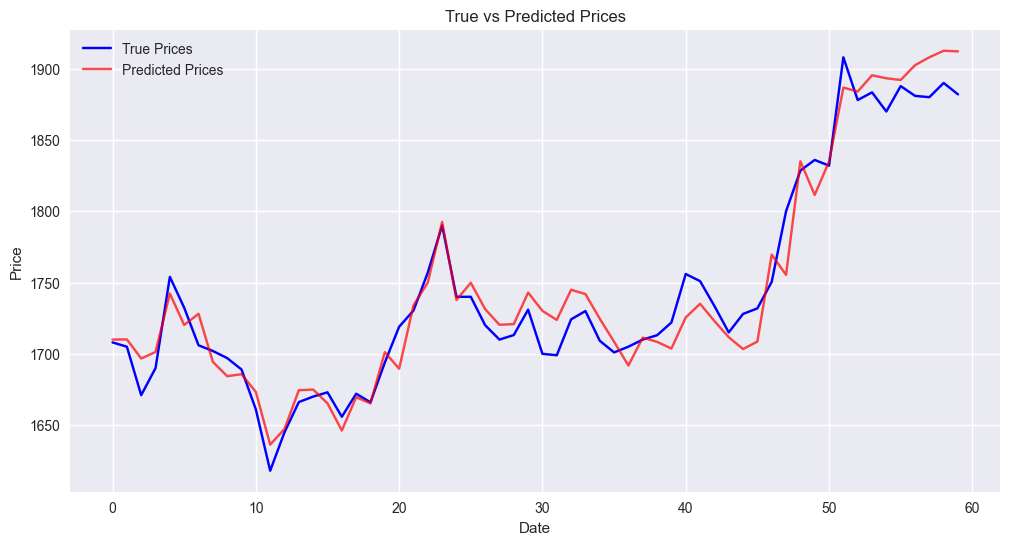

In [135]:
#transformer

y_test_predict_reshaped = y_test_predict.reshape(-1, 1)
y_test_predict_original = mm_y.inverse_transform(y_test_predict_reshaped)

y_test_reshaped = y_test.reshape(-1, 1)
y_test_original = mm_y.inverse_transform(y_test_reshaped)

plt.figure(figsize=(12, 6))
plt.plot(y_test_original, label="True Prices", color='blue')
plt.plot(y_test_predict_original, label="Predicted Prices", color='red', alpha=0.7)
plt.title("True vs Predicted Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


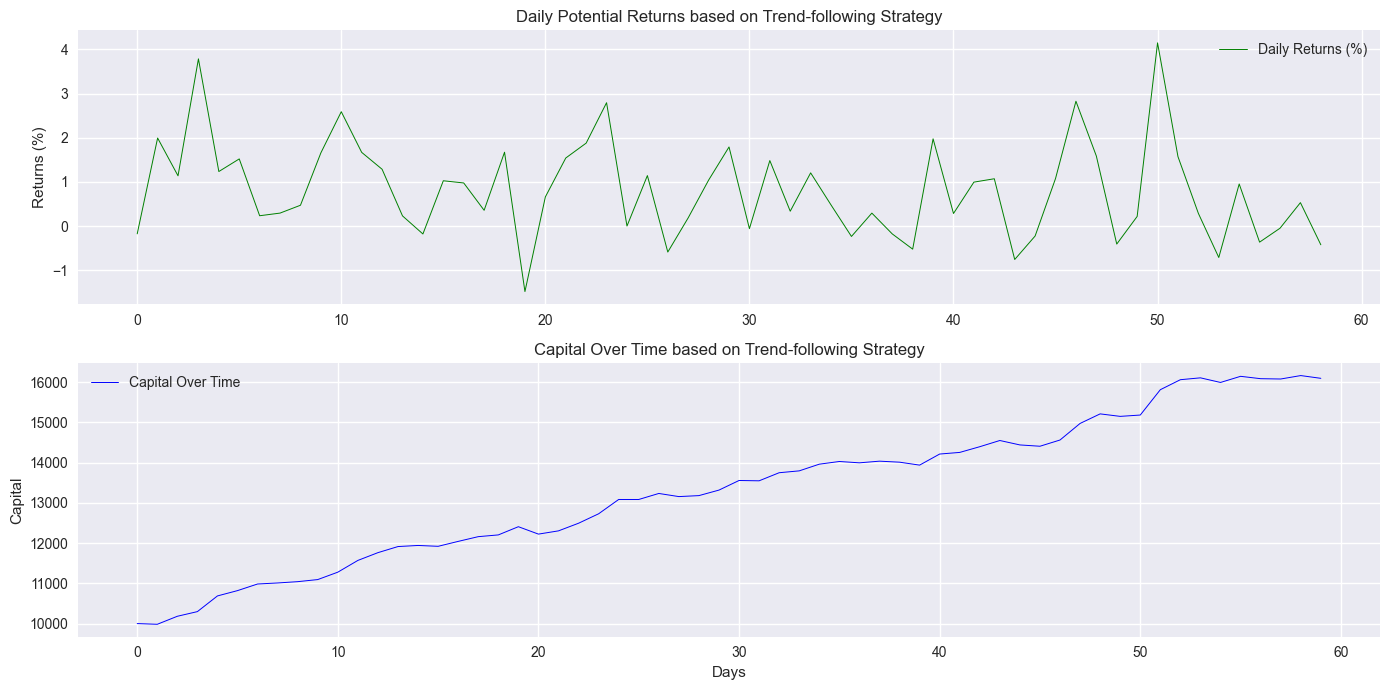

Final Capital: 16094.06
Total Return: 60.94%


In [138]:
initial_capital = 10000
capital = initial_capital
capital_history = [capital]  # To store the daily capital

returns = []
for i in range(1, len(y_test_original)):
    if y_test_predict_original[i] > y_test_original[i-1]:
        # Assuming buying the stock and holding for the day
        daily_return = (y_test_original[i] - y_test_original[i-1]) / y_test_original[i-1]
    else:
        # Assuming not buying or selling if we have
        daily_return = -1 * (y_test_original[i] - y_test_original[i-1]) / y_test_original[i-1]
    returns.append(daily_return)
    
    # Update capital
    capital = capital * (1 + daily_return)
    capital_history.append(capital)

returns_percentage = [r * 100 for r in returns]

# Plotting
plt.figure(figsize=(14, 7))

# Plotting returns
plt.subplot(2, 1, 1)
plt.plot(returns_percentage, color='green', label="Daily Returns (%)",linewidth=0.7)
plt.title("Daily Potential Returns based on Trend-following Strategy")
plt.ylabel("Returns (%)")
plt.legend()
plt.grid(True)

# Plotting capital over time
plt.subplot(2, 1, 2)
plt.plot(capital_history, color='blue', label="Capital Over Time",linewidth=0.7)
plt.title("Capital Over Time based on Trend-following Strategy")
plt.xlabel("Days")
plt.ylabel("Capital")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Printing final returns and capital
final_capital = capital_history[-1][0]
total_return = (final_capital - initial_capital) / initial_capital
print(f"Final Capital: {final_capital:.2f}")
print(f"Total Return: {total_return*100:.2f}%")


Final Capital: 11792.45
Total Return: 17.92%


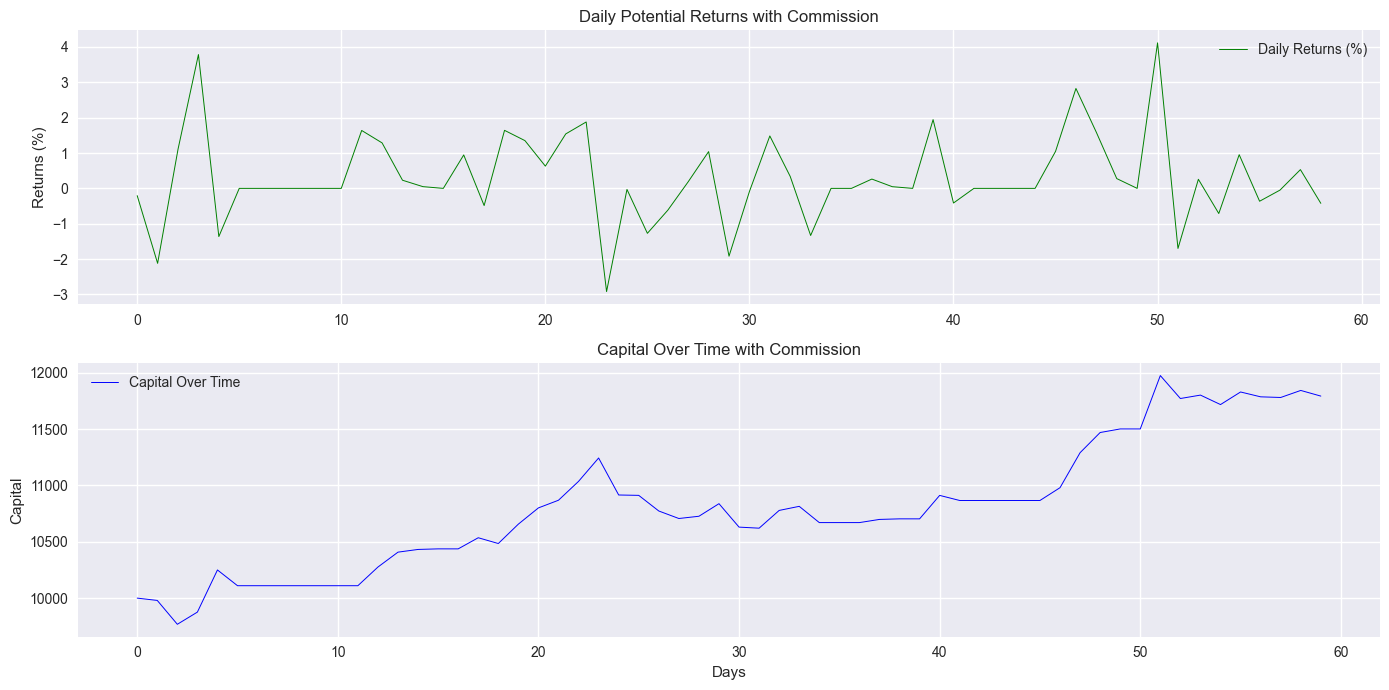

In [139]:
initial_capital = 10000
capital = initial_capital
capital_history = [capital]  # To store the daily capital

# Commission rates
buy_commission_rate = 0.0003
sell_commission_rate = 0.0003
stamp_duty_rate = 0.001

returns = []
stocks_held = 0
for i in range(1, len(y_test_original)):
    # The value of our assets before trading
    prev_value = capital + stocks_held * y_test_original[i-1]
    
    if y_test_predict_original[i] > y_test_original[i-1] and capital > 0:
        # Buying the stock and hold for the day
        # Calculate how many stocks we can buy excluding commission
        stocks_to_buy = (capital / y_test_original[i-1]) / (1 + buy_commission_rate)
        capital -= stocks_to_buy * y_test_original[i-1] * (1 + buy_commission_rate)
        
        stocks_held += stocks_to_buy
        
    elif y_test_predict_original[i] <= y_test_original[i-1] and stocks_held > 0:
        # Selling the stock we held
        capital += stocks_held * y_test_original[i] * (1 - sell_commission_rate - stamp_duty_rate)
        stocks_held = 0

    # The value of our assets after trading
    current_value = capital + stocks_held * y_test_original[i]
    daily_return = (current_value - prev_value) / prev_value
    returns.append(daily_return)
    
    capital_history.append(current_value)

returns_percentage = [r * 100 for r in returns]

# Plotting
plt.figure(figsize=(14, 7))

# Plotting returns
plt.subplot(2, 1, 1)
plt.plot(returns_percentage, color='green', label="Daily Returns (%)",linewidth=0.7)
plt.title("Daily Potential Returns with Commission")
plt.ylabel("Returns (%)")
plt.legend()
plt.grid(True)

# Plotting capital over time
plt.subplot(2, 1, 2)
plt.plot(capital_history, color='blue', label="Capital Over Time",linewidth=0.7)
plt.title("Capital Over Time with Commission")
plt.xlabel("Days")
plt.ylabel("Capital")
plt.legend()
plt.grid(True)

plt.tight_layout()


# Printing final returns and capital
final_capital = capital_history[-1][0]
total_return = (final_capital - initial_capital) / initial_capital
print(f"Final Capital: {final_capital:.2f}")
print(f"Total Return: {total_return*100:.2f}%")

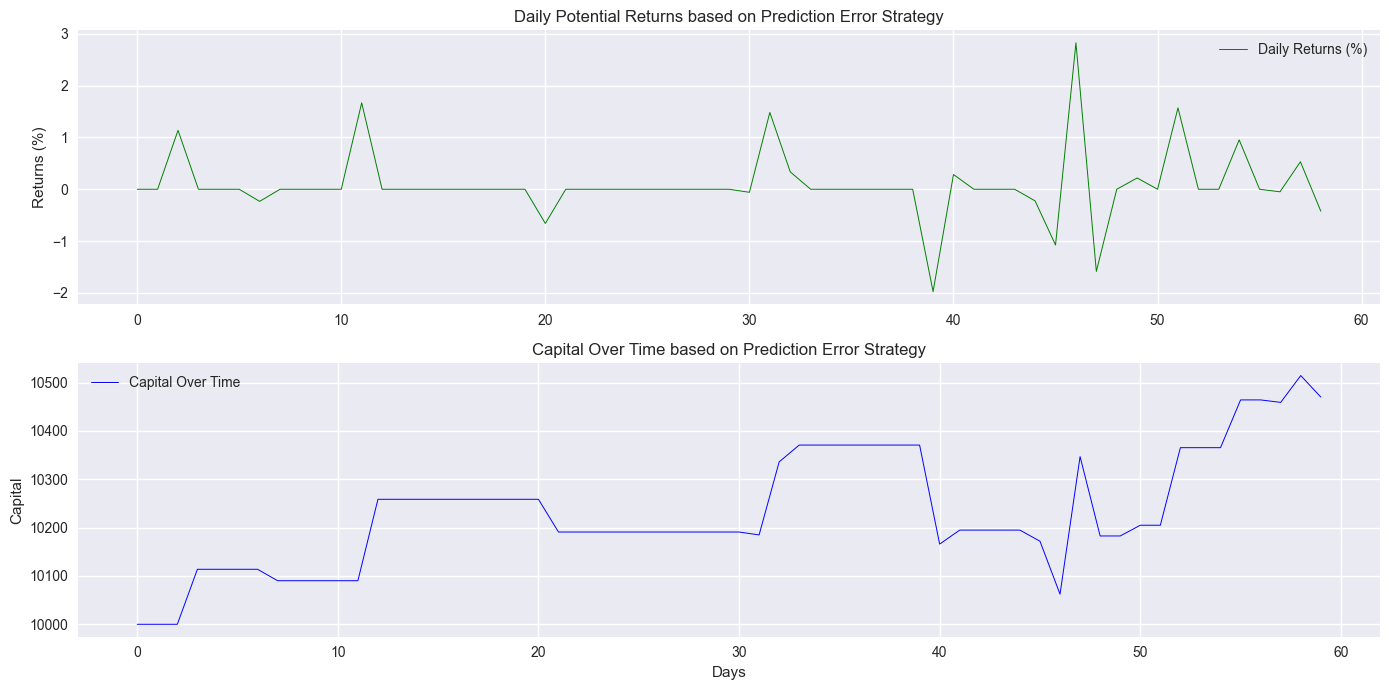

Final Capital: 10469.85
Total Return: 4.70%


In [143]:
# Calculate prediction errors
errors = y_test_predict_original.flatten() - y_test_original.flatten()

# Set an error threshold (for example, 1% of average stock price)
threshold = 0.01 * np.mean(y_test_original)

# Initialize capital and other variables
capital = initial_capital
capital_history = [capital]

returns = []

# Iterate over the errors and apply the strategy
for i in range(len(errors) - 1):  # Subtract 1 to avoid IndexError
    # If error is positive and greater than threshold, buy
    if errors[i] > threshold:
        daily_return = (y_test_original[i+1] - y_test_original[i]) / y_test_original[i]
    # If error is negative and less than negative threshold, sell
    elif errors[i] < -threshold:
        daily_return = -1 * (y_test_original[i+1] - y_test_original[i]) / y_test_original[i]
    else:
        daily_return = 0  # No action
    
    returns.append(daily_return)
    
    # Update capital
    capital = capital * (1 + daily_return)
    capital_history.append(capital)
    
returns_percentage = [r * 100 for r in returns]

# Plotting
plt.figure(figsize=(14, 7))

# Plotting returns
plt.subplot(2, 1, 1)
plt.plot(returns_percentage, color='green', label="Daily Returns (%)",linewidth=0.7)
plt.title("Daily Potential Returns based on Prediction Error Strategy")
plt.ylabel("Returns (%)")
plt.legend()
plt.grid(True)

# Plotting capital over time
plt.subplot(2, 1, 2)
plt.plot(capital_history, color='blue', label="Capital Over Time",linewidth=0.7)
plt.title("Capital Over Time based on Prediction Error Strategy")
plt.xlabel("Days")
plt.ylabel("Capital")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Printing final returns and capital
final_capital = float(capital_history[-1])
total_return = (final_capital - initial_capital) / initial_capital
print(f"Final Capital: {final_capital:.2f}")
print(f"Total Return: {total_return*100:.2f}%")



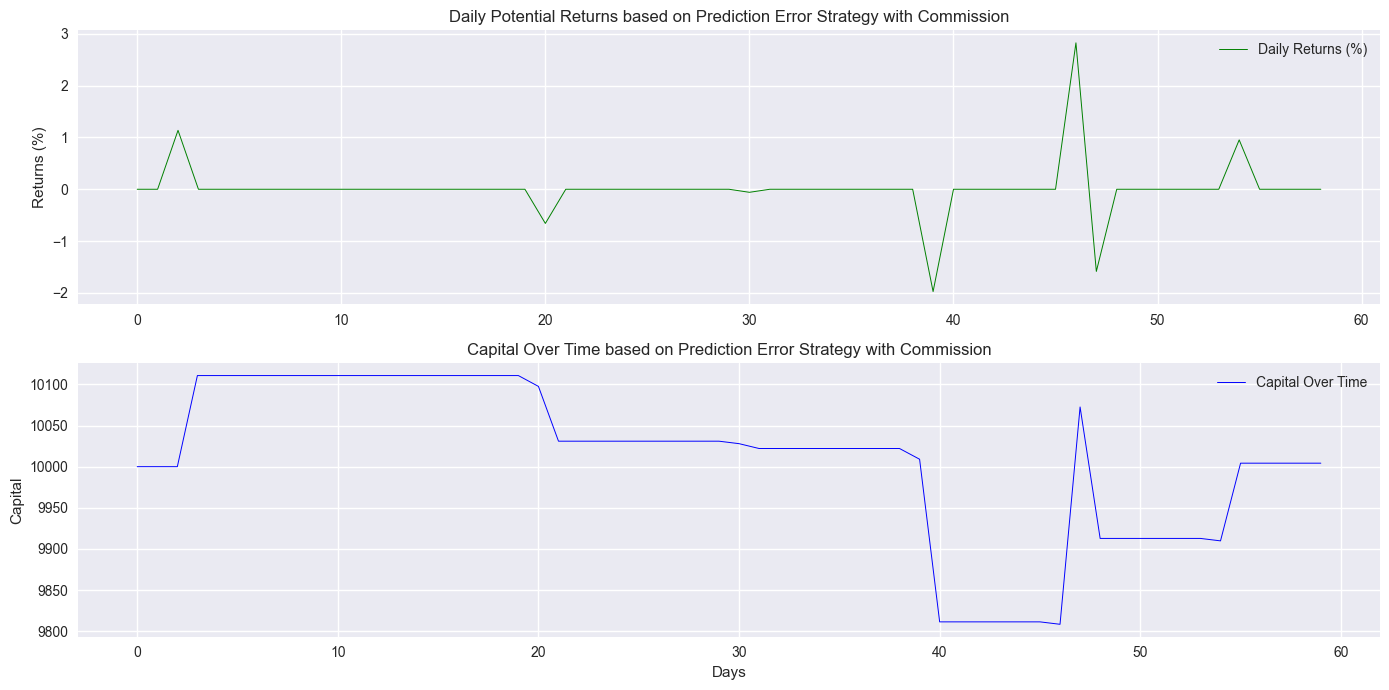

Final Capital: 10004.24
Total Return: 0.04%


In [142]:
# Calculate prediction errors
errors = y_test_predict_original.flatten() - y_test_original.flatten()

# Set an error threshold (for example, 1% of average stock price)
threshold = 0.01 * np.mean(y_test_original)


buy_fee_rate = 0.0003  # 0.03%
sell_fee_rate = 0.0003 + 0.001  # 0.03% + 0.1% for stamp tax

capital = initial_capital
capital_history = [capital]

returns = []

# Flags to indicate if stock is bought or sold
stock_bought = False

for i in range(len(errors) - 1):
    # If error is positive and greater than threshold, consider buying
    if errors[i] > threshold:
        if not stock_bought:
            daily_return = (y_test_original[i+1] - y_test_original[i]) / y_test_original[i]
            # Deduct buy fee
            capital -= capital * buy_fee_rate
            stock_bought = True
        else:
            daily_return = 0
    # If error is negative and less than negative threshold, consider selling
    elif errors[i] < -threshold:
        if stock_bought:
            daily_return = -1 * (y_test_original[i+1] - y_test_original[i]) / y_test_original[i]
            # Deduct sell fee
            capital -= capital * sell_fee_rate
            stock_bought = False
        else:
            daily_return = 0
    else:
        daily_return = 0  # No action
    
    returns.append(daily_return)
    
    # Update capital
    capital = capital * (1 + daily_return)
    capital_history.append(capital)

returns_percentage = [r * 100 for r in returns]

# Plotting
plt.figure(figsize=(14, 7))

# Plotting returns
plt.subplot(2, 1, 1)
plt.plot(returns_percentage, color='green', label="Daily Returns (%)",linewidth=0.7)
plt.title("Daily Potential Returns based on Prediction Error Strategy with Commission")
plt.ylabel("Returns (%)")
plt.legend()
plt.grid(True)

# Plotting capital over time
plt.subplot(2, 1, 2)
plt.plot(capital_history, color='blue', label="Capital Over Time",linewidth=0.7)
plt.title("Capital Over Time based on Prediction Error Strategy with Commission")
plt.xlabel("Days")
plt.ylabel("Capital")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Printing final returns and capital
final_capital = float(capital_history[-1])
total_return = (final_capital - initial_capital) / initial_capital
print(f"Final Capital: {final_capital:.2f}")
print(f"Total Return: {total_return*100:.2f}%")
